In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning

def get_median(a):
    a.sort()
    centerIndex = len(a) // 2 
    if len(a)% 2 == 1:
        return a[centerIndex ]
    return ((a[centerIndex - 1] + a[centerIndex]) / 2)

import sys
import os
import scipy
import gzip
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import math

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
day = '230731'

sim_type = 'decoy' # decoy lump
iteration_num = 5

simulations = ['1D','2D','3D']
variant_numbers = ['100', '500']
depth_of_coverages = ['100', '30']

FP_types = ['0','0.1']

input_dir = '/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData'

In [4]:
def MS_benchmarking(input_dir, tool, clones, _color, sim_type, simulation, FP_type, iteration_num, variant_number, depth_of_coverage):
    x_axis = []
    y_axis = []
    mean_dic = {}
    error = 0
    
    for clone in clones:
        mean_dic[str(clone)] = []
        for iteration in range(0,iteration_num):
            if os.path.isfile(input_dir + '/SimData_'+simulation+'/n' + variant_number + '_' + depth_of_coverage + 'x/' + sim_type+ '/' + FP_type +'/clone_'+str(clone)+'/'+str(iteration)+'/'+tool+'.results.txt'):
                f = open(input_dir + '/SimData_'+simulation+'/n' + variant_number + '_' + depth_of_coverage + 'x/' + sim_type+ '/' + FP_type +'/clone_'+str(clone)+'/'+str(iteration)+'/'+tool+'.results.txt','r')
                for fline in f:
                    if fline.startswith('score'):
                        score = float(fline.rstrip().split('\t')[1].rstrip().split('/')[0])
                        x_axis.append(str(clone))
                        y_axis.append(score)
                        mean_dic[str(clone)].append(score) #########
                f.close()
            else:
                error += 1
                print('ERROR ==>','\t',input_dir + '/SimData_'+simulation+'/n' + variant_number + '_' + depth_of_coverage + 'x/' + sim_type+ '/' + FP_type +'/clone_'+str(clone)+'/'+str(iteration)+'/'+tool+'.results.txt')  
    fig = plt.figure(figsize = (25,15))
    if simulation == '3D':
        ax = sns.lineplot(data = mean_dic, x = x_axis, y = y_axis, marker = 'o', markersize = 40, color = _color, linewidth = 10, linestyle = 'solid') # 3D
    elif simulation == '2D':
        ax = sns.lineplot(data = mean_dic, x = x_axis, y = y_axis, marker = 's', markersize = 40, color = _color, linewidth = 10 , linestyle ='dashdot') # 2D
    elif simulation == '1D':
        ax = sns.lineplot(data = mean_dic, x = x_axis, y = y_axis, marker = '^', markersize = 40, color = _color, linewidth = 10 , linestyle ='dotted') # 1D

    plt.tick_params(axis = 'x', labelsize = 15)
    plt.tick_params(axis = 'y', labelsize = 15)
    ax.set_xlabel('clone', fontsize = 20)
    ax.set_ylabel('membership score', fontsize = 20)
    ax.set_title(tool, fontsize=30)
    if variant_number == '100':
        sc = ax.set_ylim(0, 100)
    else:
        sc = ax.set_ylim(0, 500)
    ax.figure.savefig(output_dir +'/pdf/MS.'+ simulation+'.'+tool+'.pdf')
    
    fo.write(tool + ' membership score mean value' + '\n')
    for key in mean_dic:
        if len(mean_dic[key]) == 0:
            fo.write('clone ' + str(key) + '\t' + 'mean ' + 'ERROR' + '\n')
        else:     
            fo.write('clone ' + str(key) + '\t' + 'mean ' + str(sum(mean_dic[key])/len(mean_dic[key])) + '\n')
    print('total error', error)
    print('====================')

In [5]:
def EC_benchmarking(input_dir, tool, clones, _color, sim_type, simulation, FP_type, iteration_num, variant_number, depth_of_coverage):
    x_axis = []
    y_axis = []
    mean_dic = {}
    error = 0

    for clone in clones:
        mean_dic[str(clone)] = []
        for iteration in range(0,iteration_num):
            if os.path.isfile(input_dir + '/SimData_'+simulation+'/n' + variant_number + '_' + depth_of_coverage + 'x/' + sim_type+ '/' + FP_type +'/clone_'+str(clone)+'/'+str(iteration)+'/'+tool+'.results.txt'):
                f = open(input_dir + '/SimData_'+simulation+'/n' + variant_number + '_' + depth_of_coverage + 'x/' + sim_type+ '/' + FP_type +'/clone_'+str(clone)+'/'+str(iteration)+'/'+tool+'.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        score = int(fline.rstrip().split('\t')[1])
                        x_axis.append(clone)
                        y_axis.append(score)
                        mean_dic[str(clone)].append(score)
                f.close()
            else:
                error += 1
                print('ERROR ==>','\t',input_dir + '/SimData_'+simulation+'/n' + variant_number + '_' + depth_of_coverage + 'x/' + sim_type+ '/' + FP_type +'/clone_'+str(clone)+'/'+str(iteration)+'/'+tool+'.results.txt')  
#     print(error)
    fig = plt.figure(figsize = (15,15))
    if simulation == '3D':
        ax = sns.lineplot(data = mean_dic, x = x_axis, y = y_axis, marker = 'o', markersize = 40, color = _color, linewidth = 10, linestyle = 'solid') # 3D
    elif simulation == '2D':
        ax = sns.lineplot(data = mean_dic, x = x_axis, y = y_axis, marker = 's', markersize = 40, color = _color, linewidth = 10 , linestyle ='dashdot') # 2D
    elif simulation == '1D':
        ax = sns.lineplot(data = mean_dic, x = x_axis, y = y_axis, marker = '^', markersize = 40, color = _color, linewidth = 10 , linestyle ='dotted') # 1D

    plt.tick_params(axis = 'x', labelsize = 15)
    plt.tick_params(axis = 'y', labelsize = 15)
    ax.set_xlabel('clone', fontsize = 20)
    ax.set_ylabel('estimated clone number', fontsize = 20)
    ax.set_title(tool, fontsize=30)
    sc = ax.set_ylim(1, 8)
    sc = ax.set_xlim(1, 8)
    ax.figure.savefig(output_dir +'/pdf/EC.'+ simulation+'.'+tool+'.pdf')

    fo.write(tool + ' estimated clone number mean value' + '\n')
    for key in mean_dic:
        if len(mean_dic[key]) == 0:
            fo.write('clone ' + str(key) + '\t' + 'mean ' + 'ERROR' + '\n')
        else:       
            fo.write('clone ' + str(key) + '\t' + 'mean ' + str(sum(mean_dic[key])/len(mean_dic[key])) + '\n')
    fo.write('RMSE' + '\t' + str(mean_squared_error(x_axis , y_axis) ** 0.5) + '\n')
    print('total error', error)
    print('====================')

### MS

ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n100_100x/decoy/0/clone_6/1/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n100_100x/decoy/0/clone_7/0/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n100_100x/decoy/0/clone_7/1/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n100_100x/decoy/0/clone_7/2/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n100_100x/decoy/0/clone_7/3/CLEMENT_decision.results.txt
total error 5
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n100_100x/decoy/0.1/clone_6/1/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutpu

<ipython-input-4-577ddbc3dd8e>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (25,15))


total error 0
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n100_30x/decoy/0.1/clone_6/2/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n100_30x/decoy/0.1/clone_6/3/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n100_30x/decoy/0.1/clone_7/0/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n100_30x/decoy/0.1/clone_7/1/CLEMENT_decision.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_1D/n100_30x/decoy/0.1/clone_7/2/CLEMENT_decision.results.txt
total error 5
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
total error 0
t

total error 30
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/0/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/1/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/2/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/3/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/4/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_3/0/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_3/1/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.

total error 30
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/0/SIMPLE_KMEANS_elbow.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/1/SIMPLE_KMEANS_elbow.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/2/SIMPLE_KMEANS_elbow.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/3/SIMPLE_KMEANS_elbow.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/4/SIMPLE_KMEANS_elbow.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_3/0/SIMPLE_KMEANS_elbow.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_3/1/SI

total error 30
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/0/SIMPLE_KMEANS_silhouette.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/1/SIMPLE_KMEANS_silhouette.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/2/SIMPLE_KMEANS_silhouette.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/3/SIMPLE_KMEANS_silhouette.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_2/4/SIMPLE_KMEANS_silhouette.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n500_100x/decoy/0.1/clone_3/0/SIMPLE_KMEANS_silhouette.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_2D/n5

total error 30
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/0/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/1/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/2/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/3/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/4/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_3/0/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_3/1/sciclone.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.

total error 30
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/0/SIMPLE_KMEANS_elbow.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/1/SIMPLE_KMEANS_elbow.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/2/SIMPLE_KMEANS_elbow.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/3/SIMPLE_KMEANS_elbow.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/4/SIMPLE_KMEANS_elbow.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_3/0/SIMPLE_KMEANS_elbow.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_3/1/SI

total error 30
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/0/SIMPLE_KMEANS_silhouette.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/1/SIMPLE_KMEANS_silhouette.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/2/SIMPLE_KMEANS_silhouette.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/3/SIMPLE_KMEANS_silhouette.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_2/4/SIMPLE_KMEANS_silhouette.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n500_100x/decoy/0.1/clone_3/0/SIMPLE_KMEANS_silhouette.results.txt
ERROR ==> 	 /data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_3D/n5

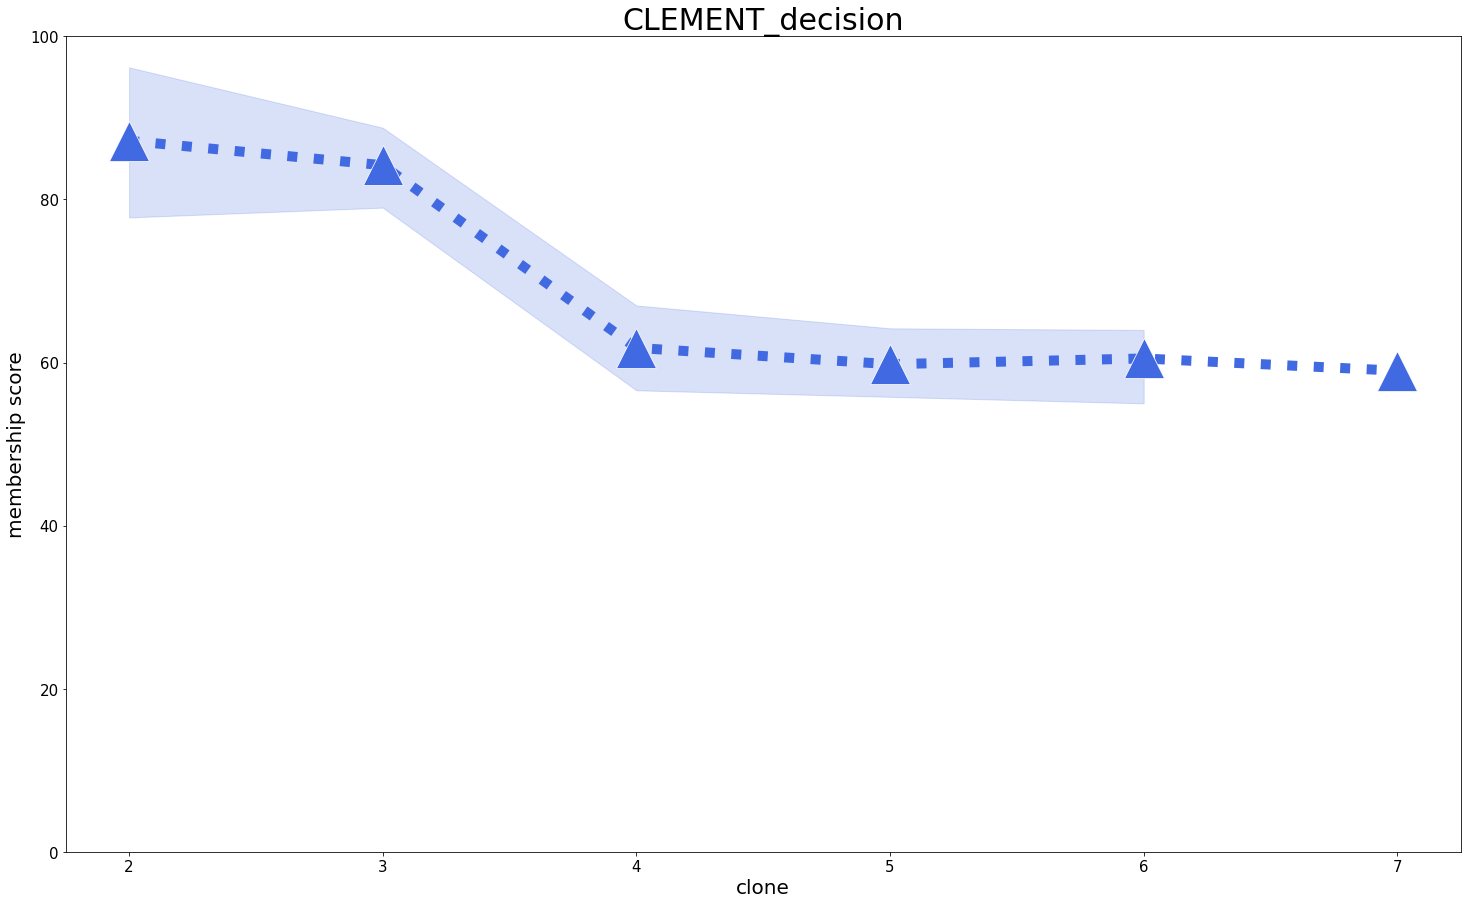

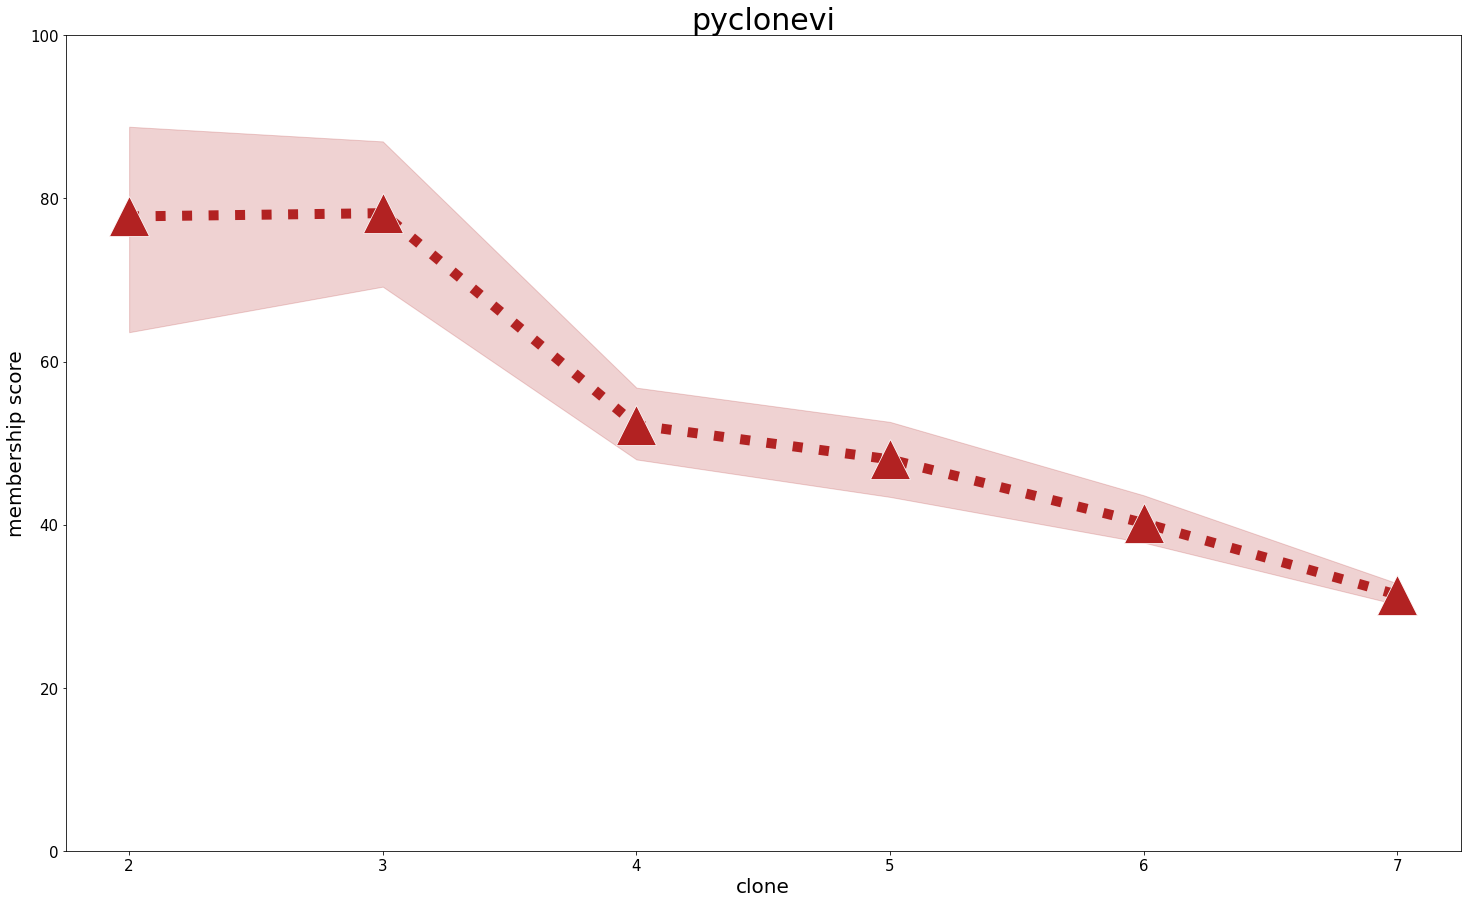

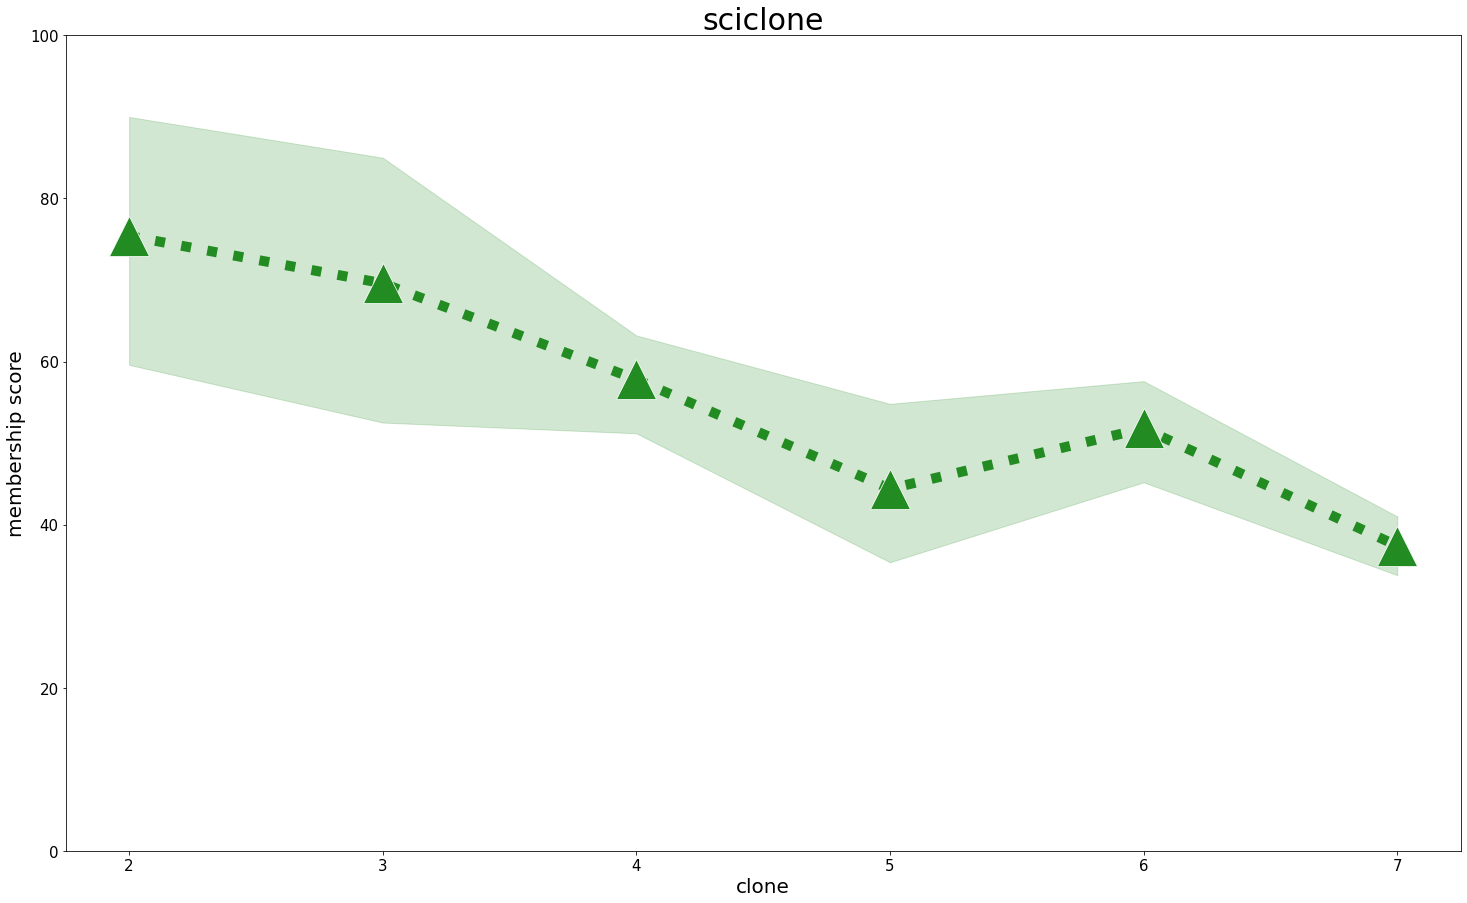

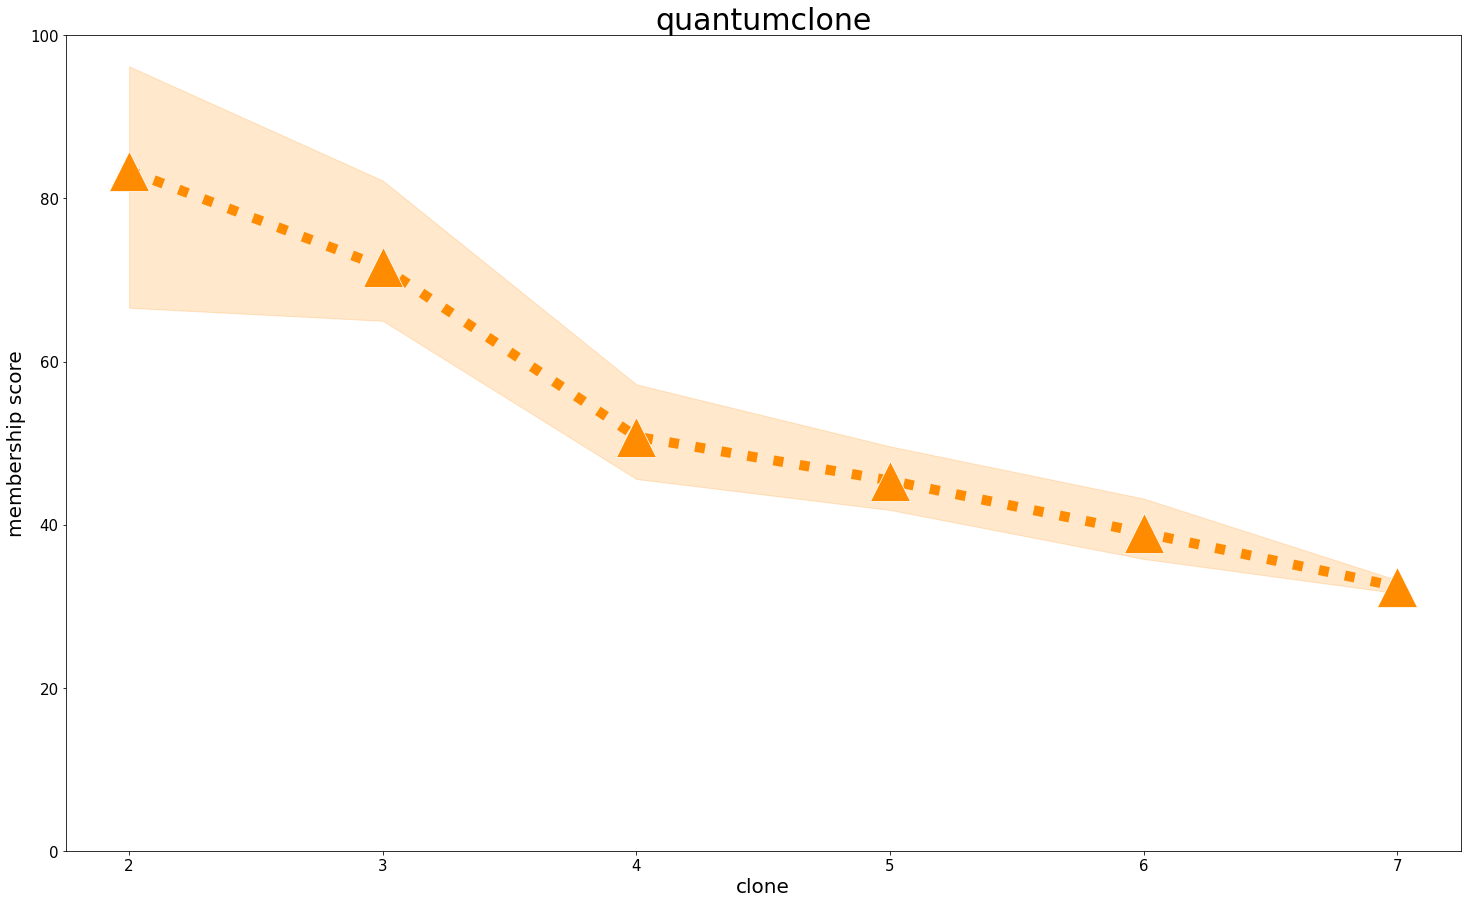

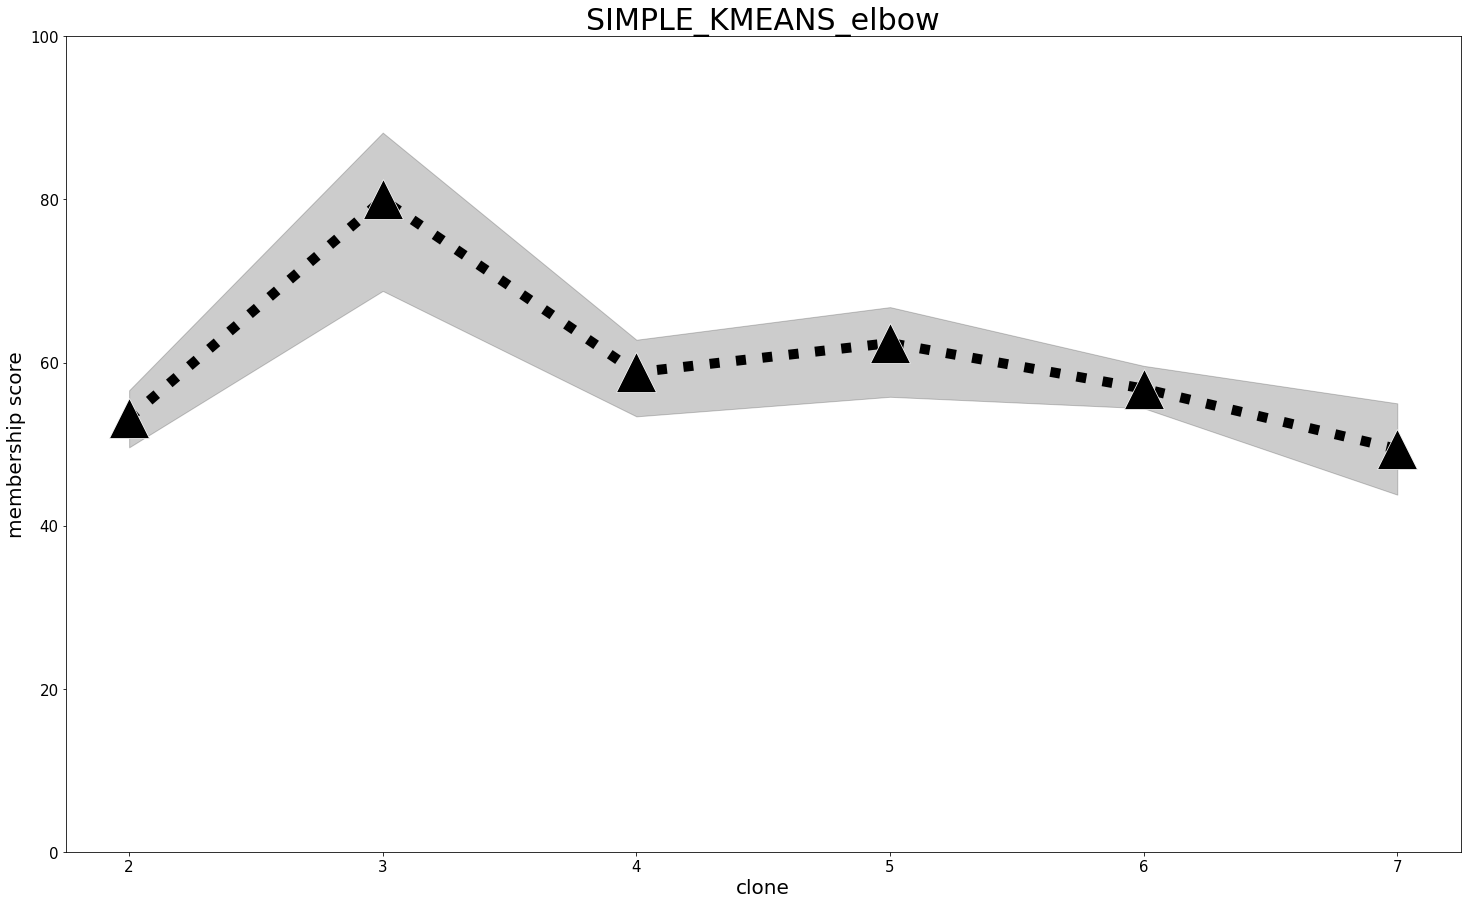

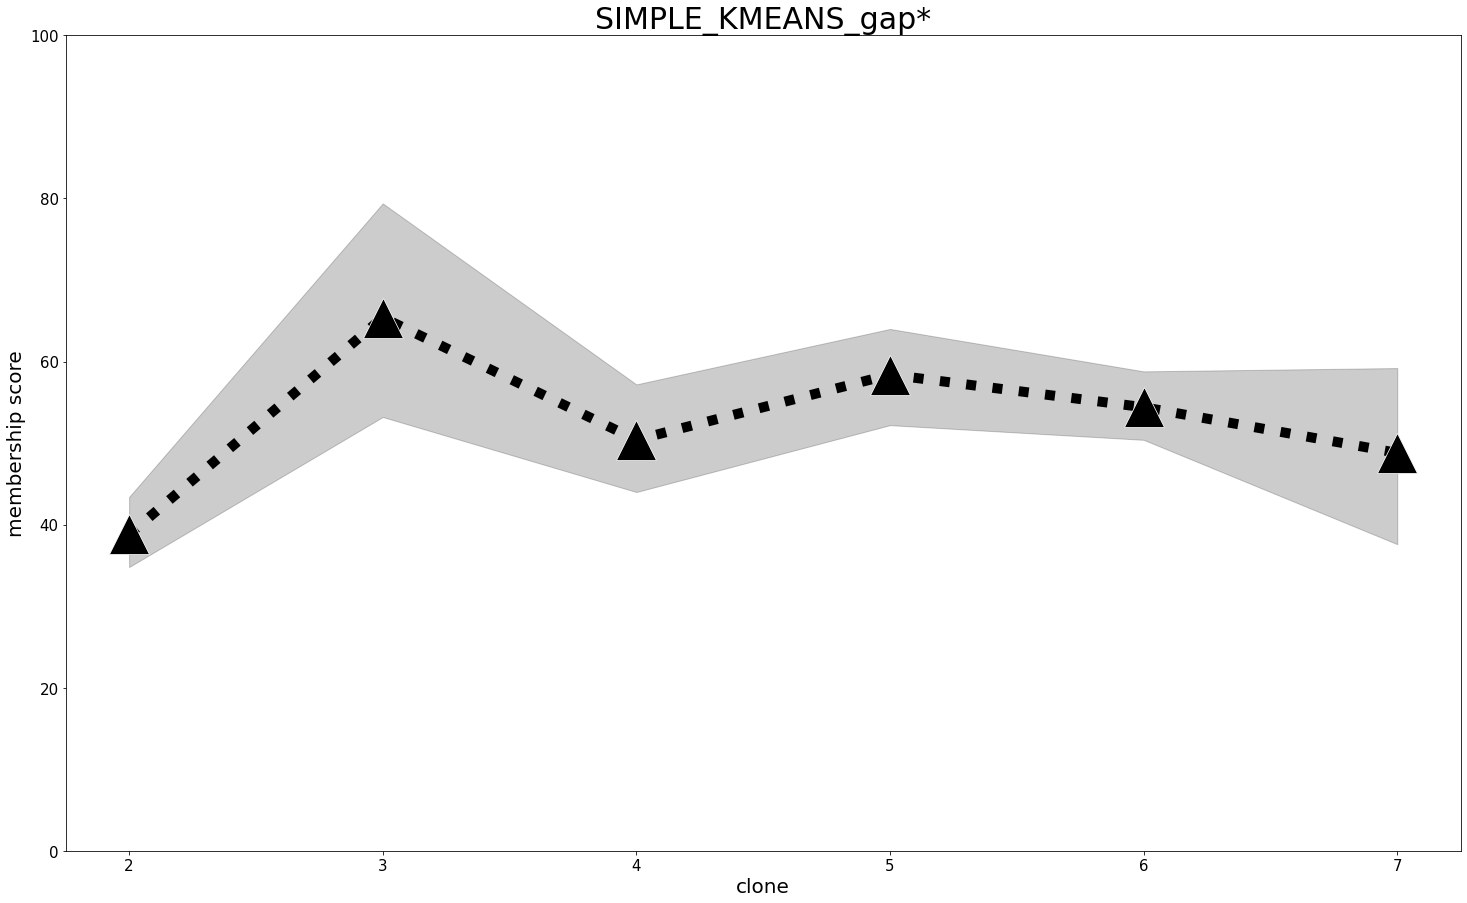

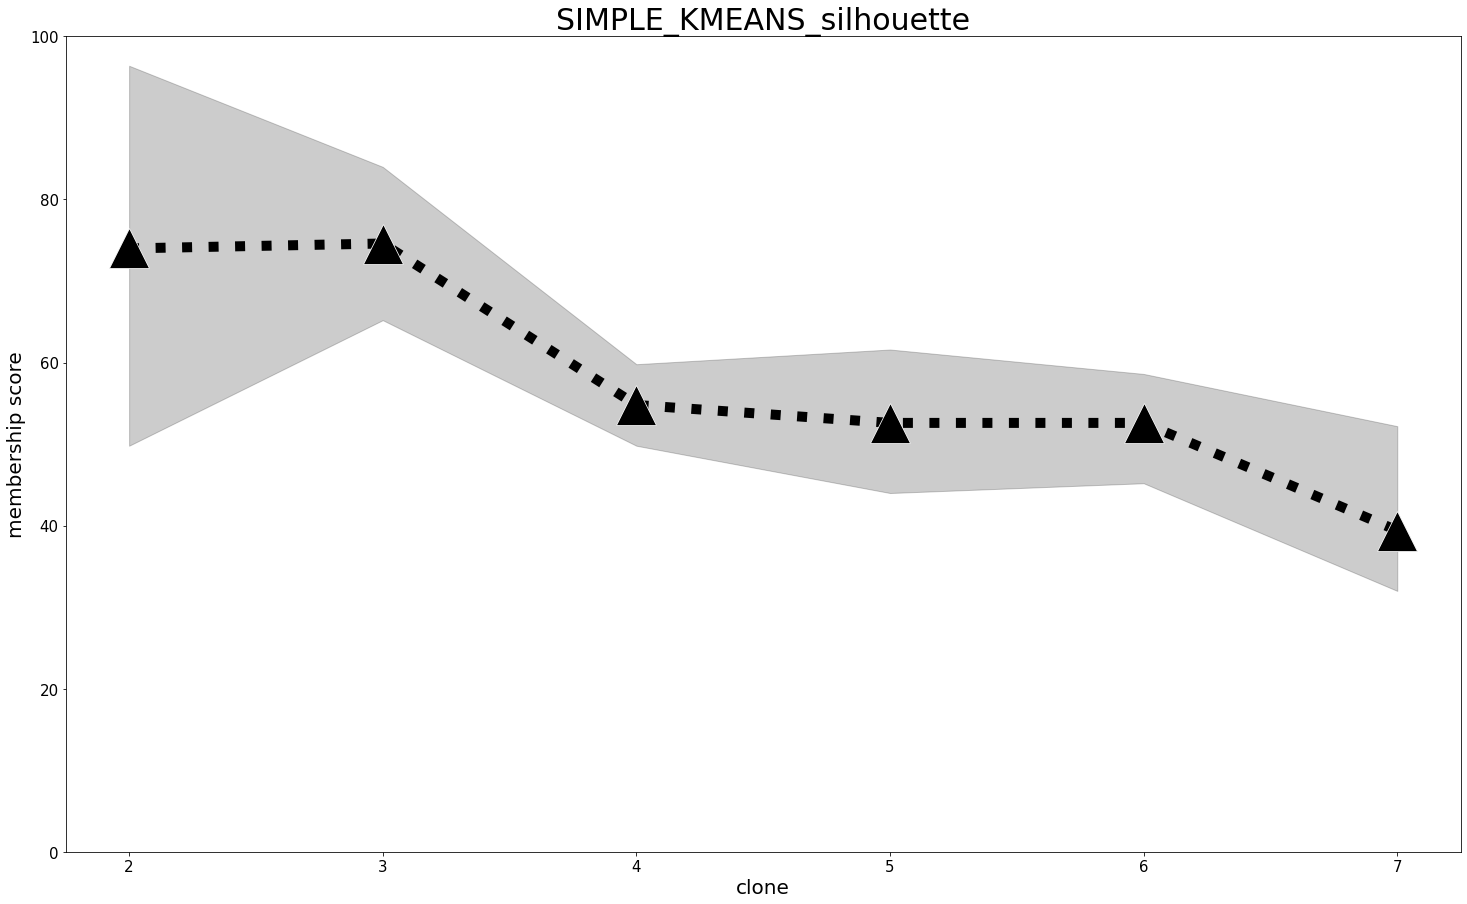

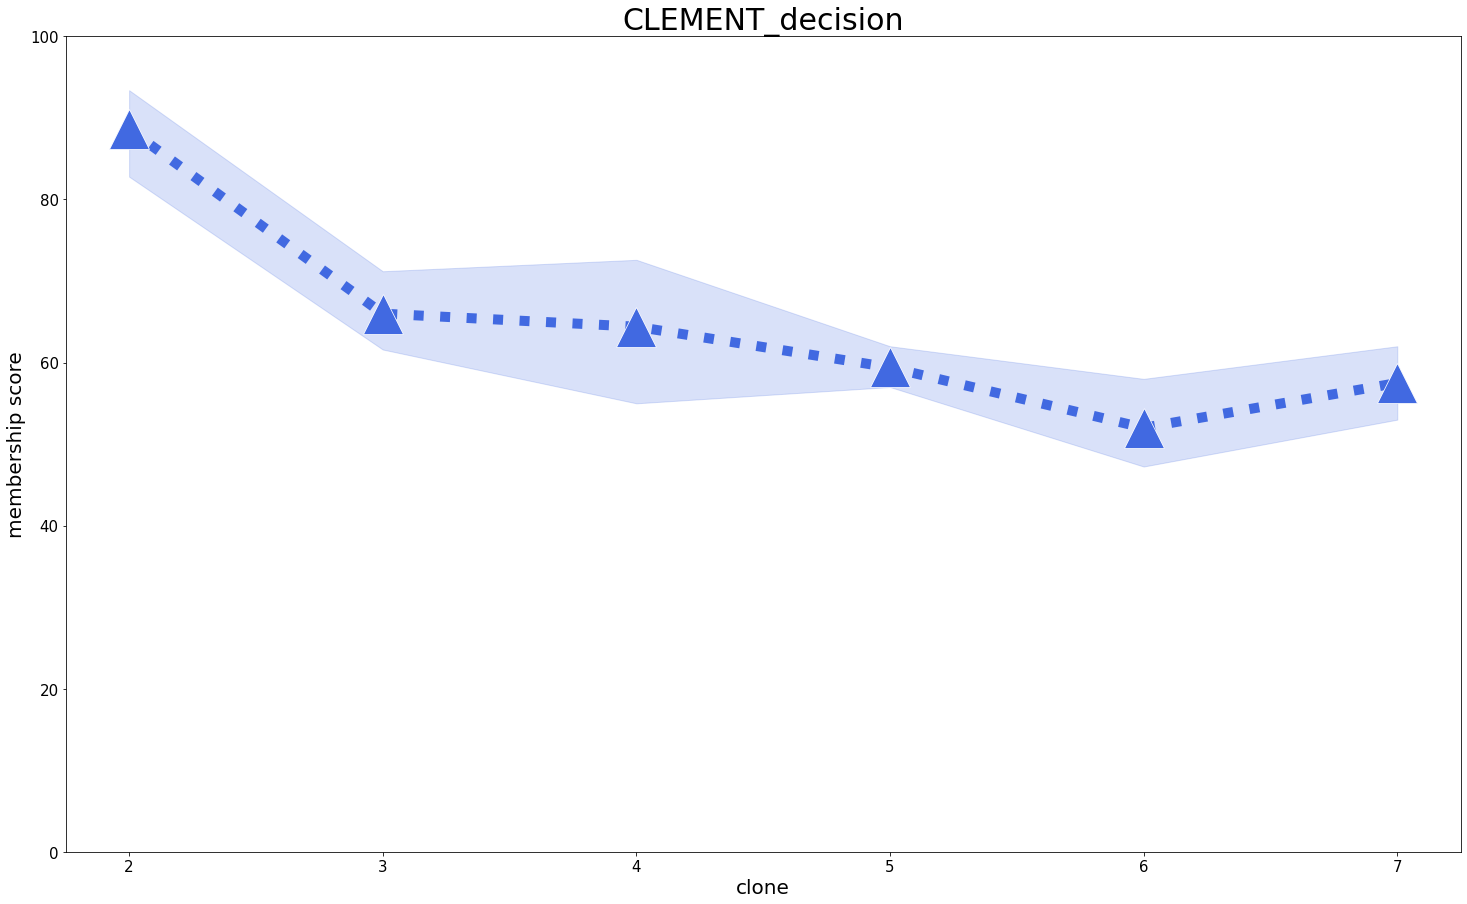

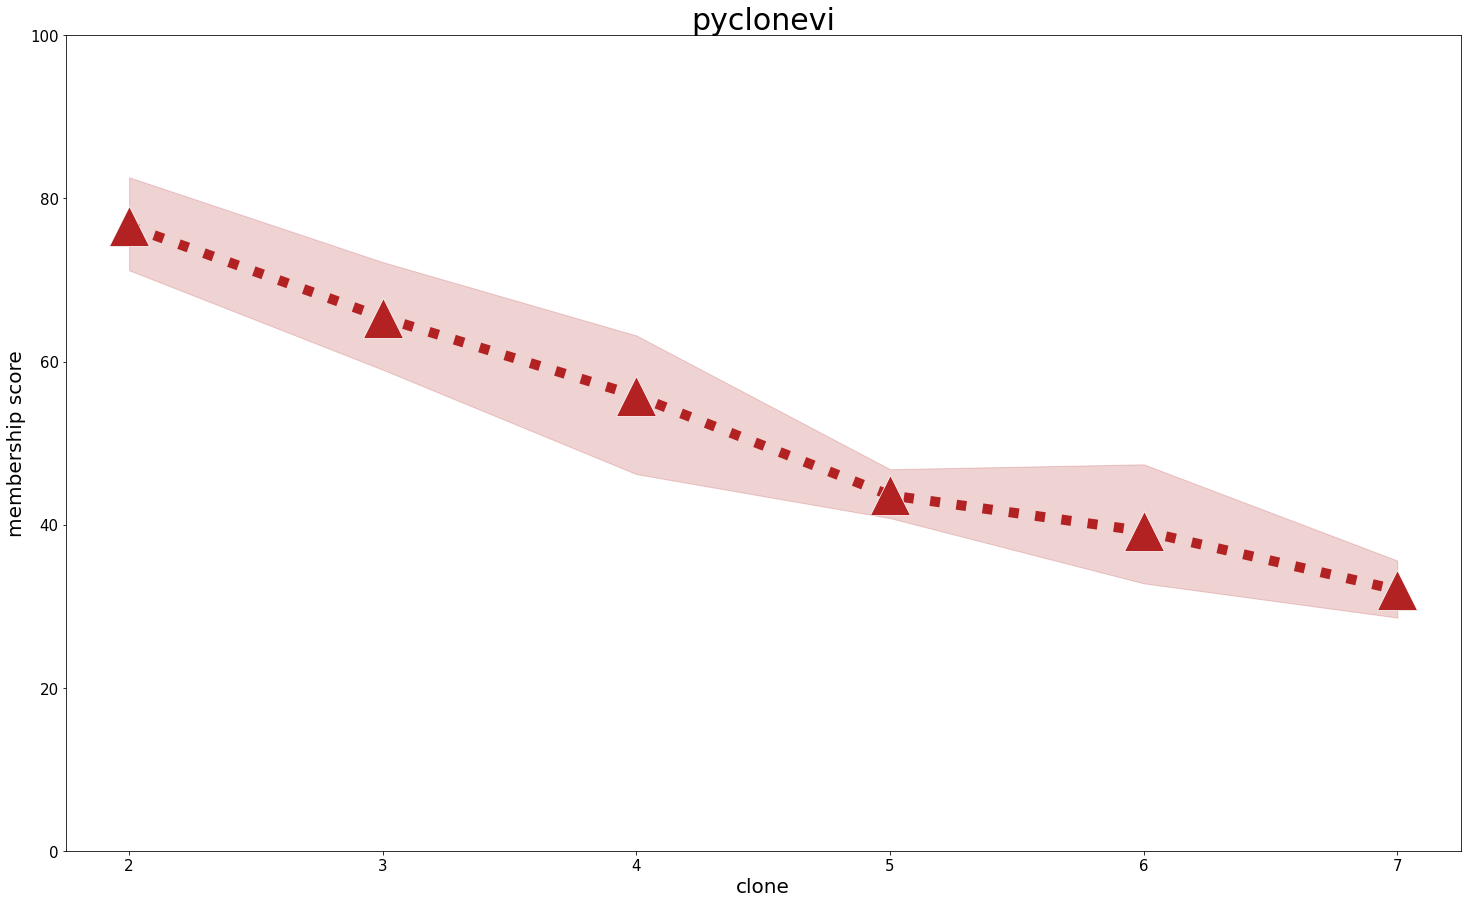

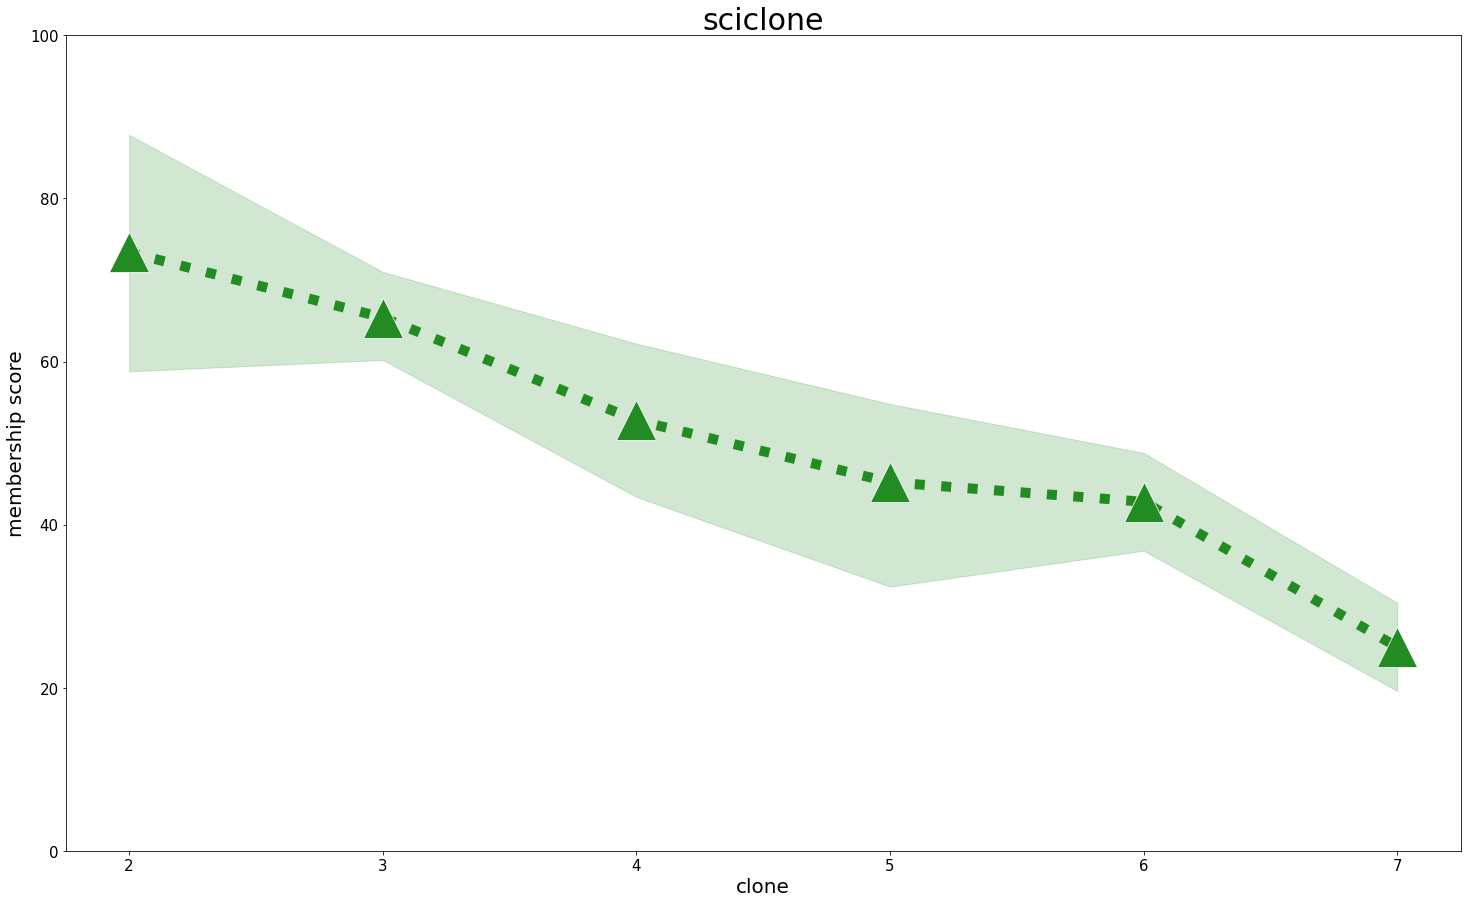

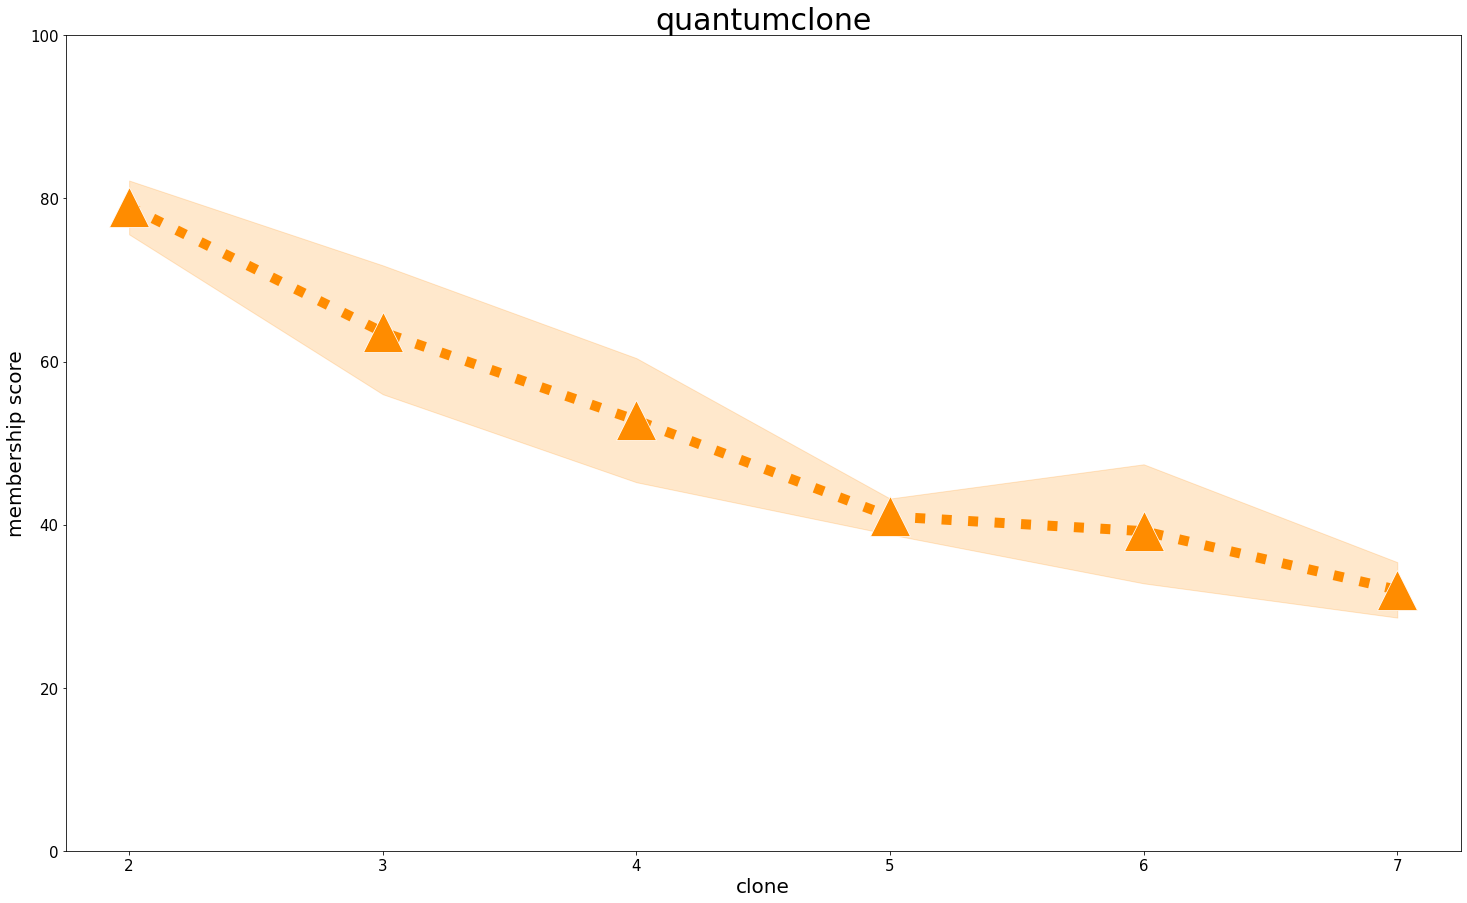

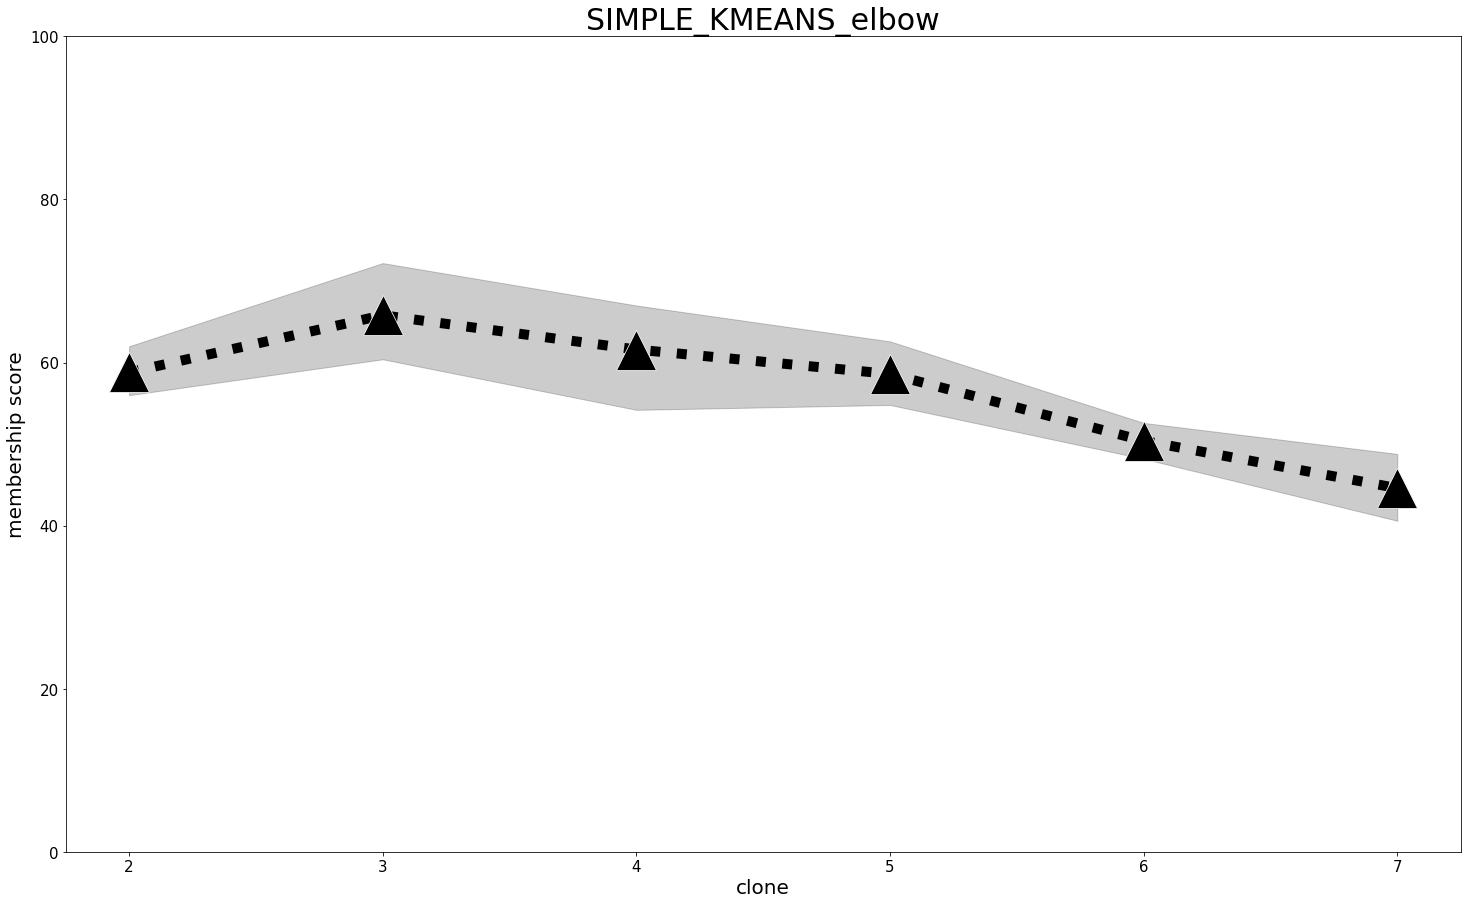

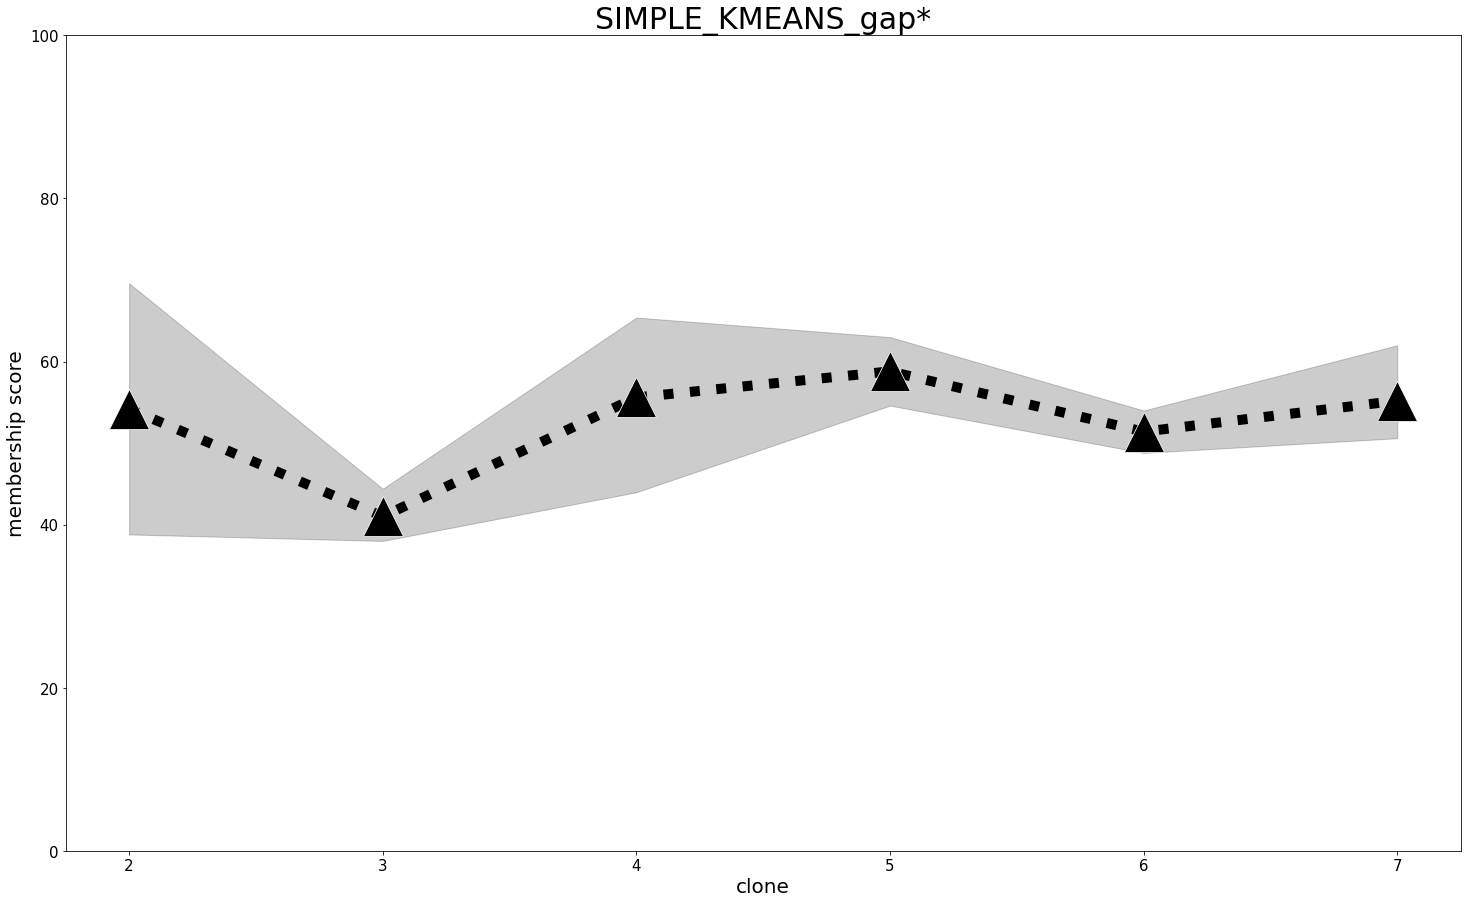

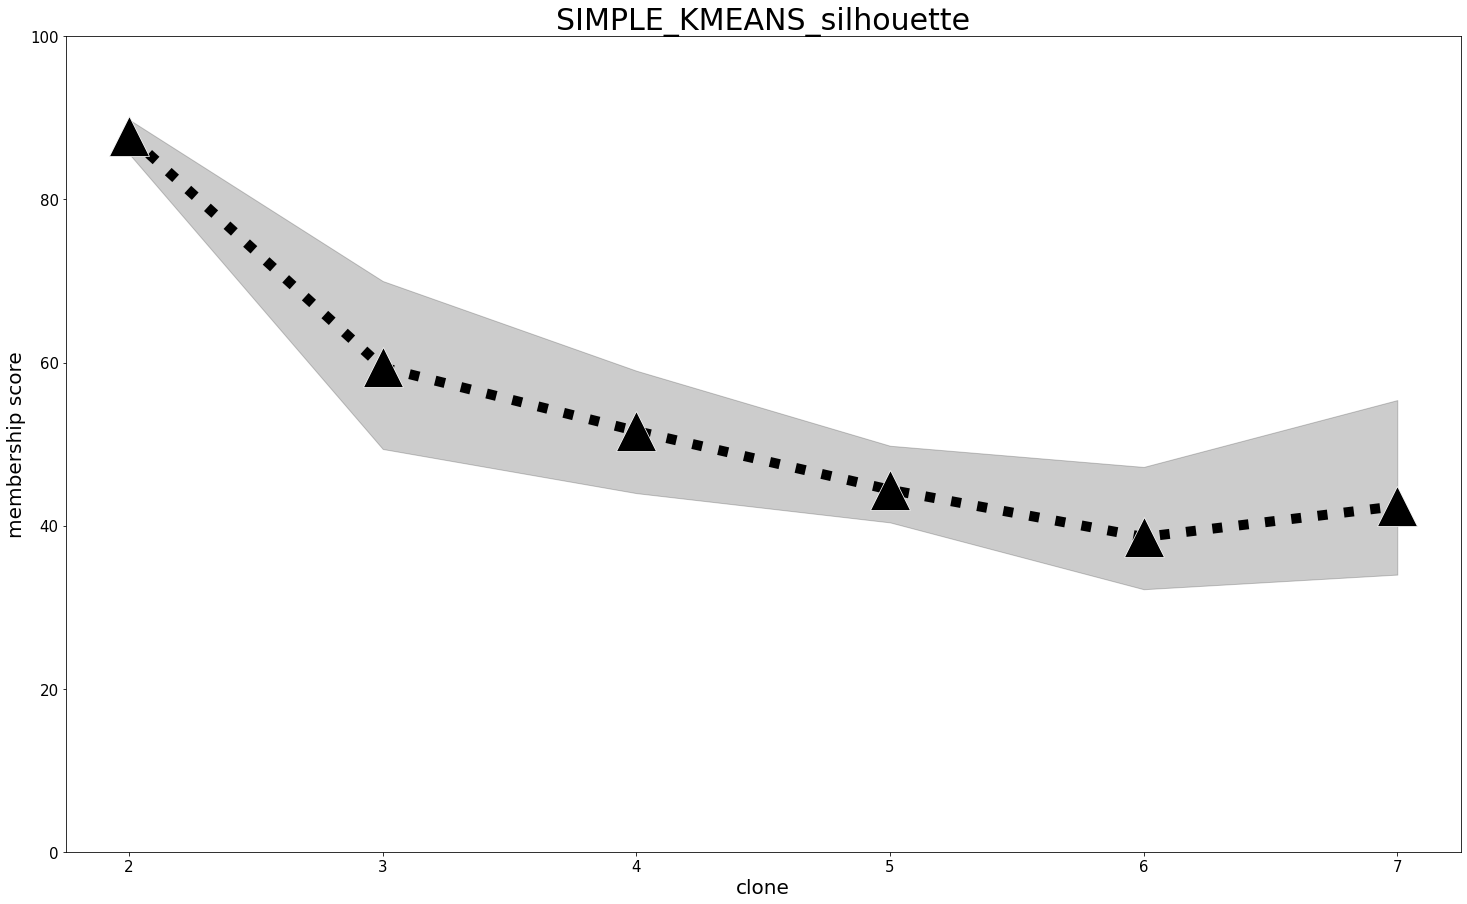

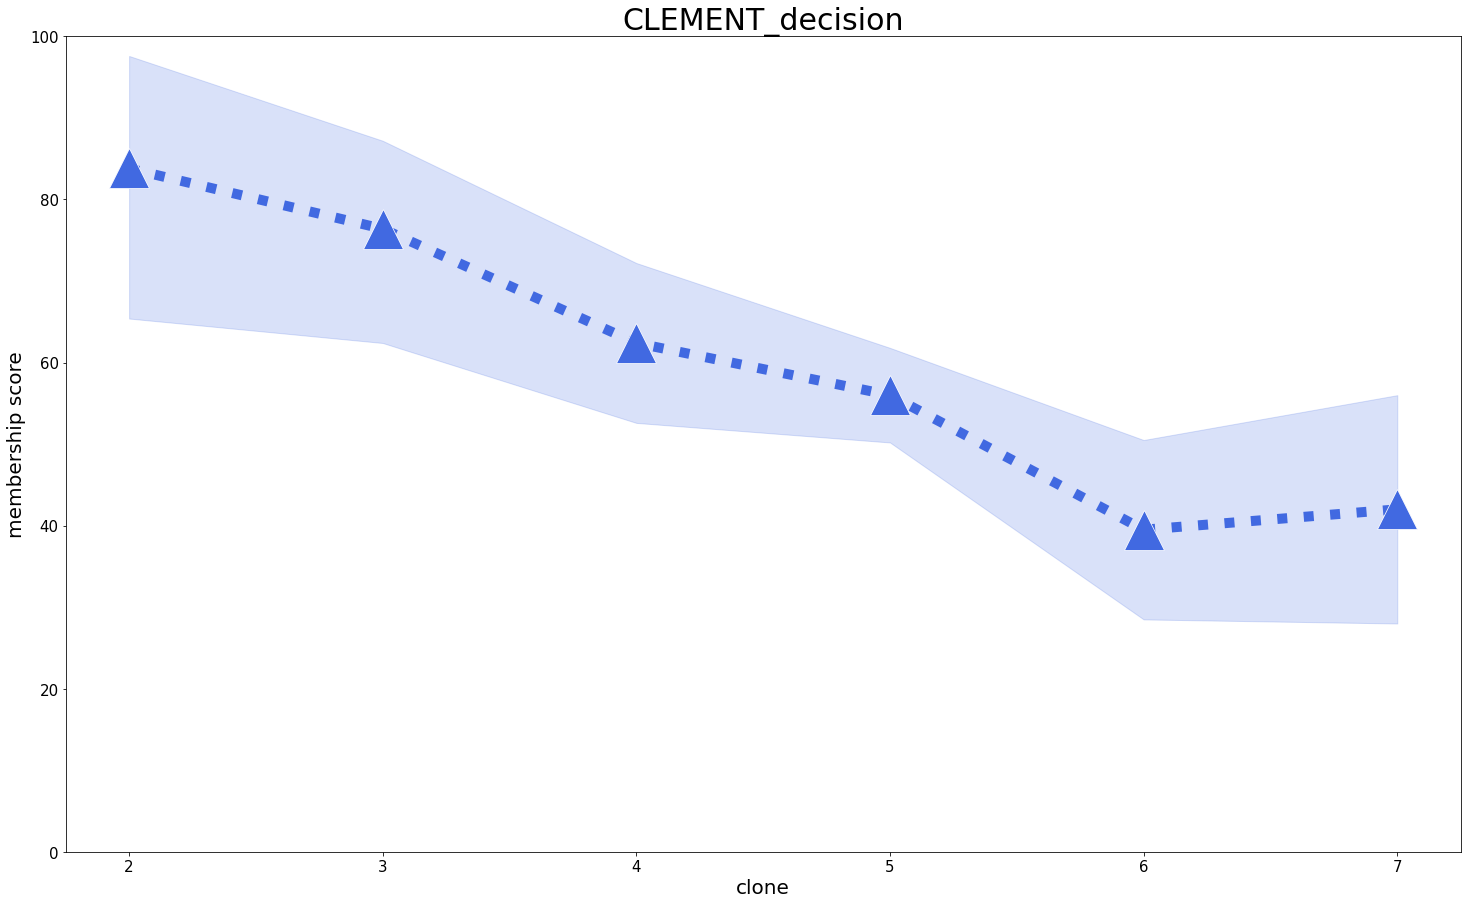

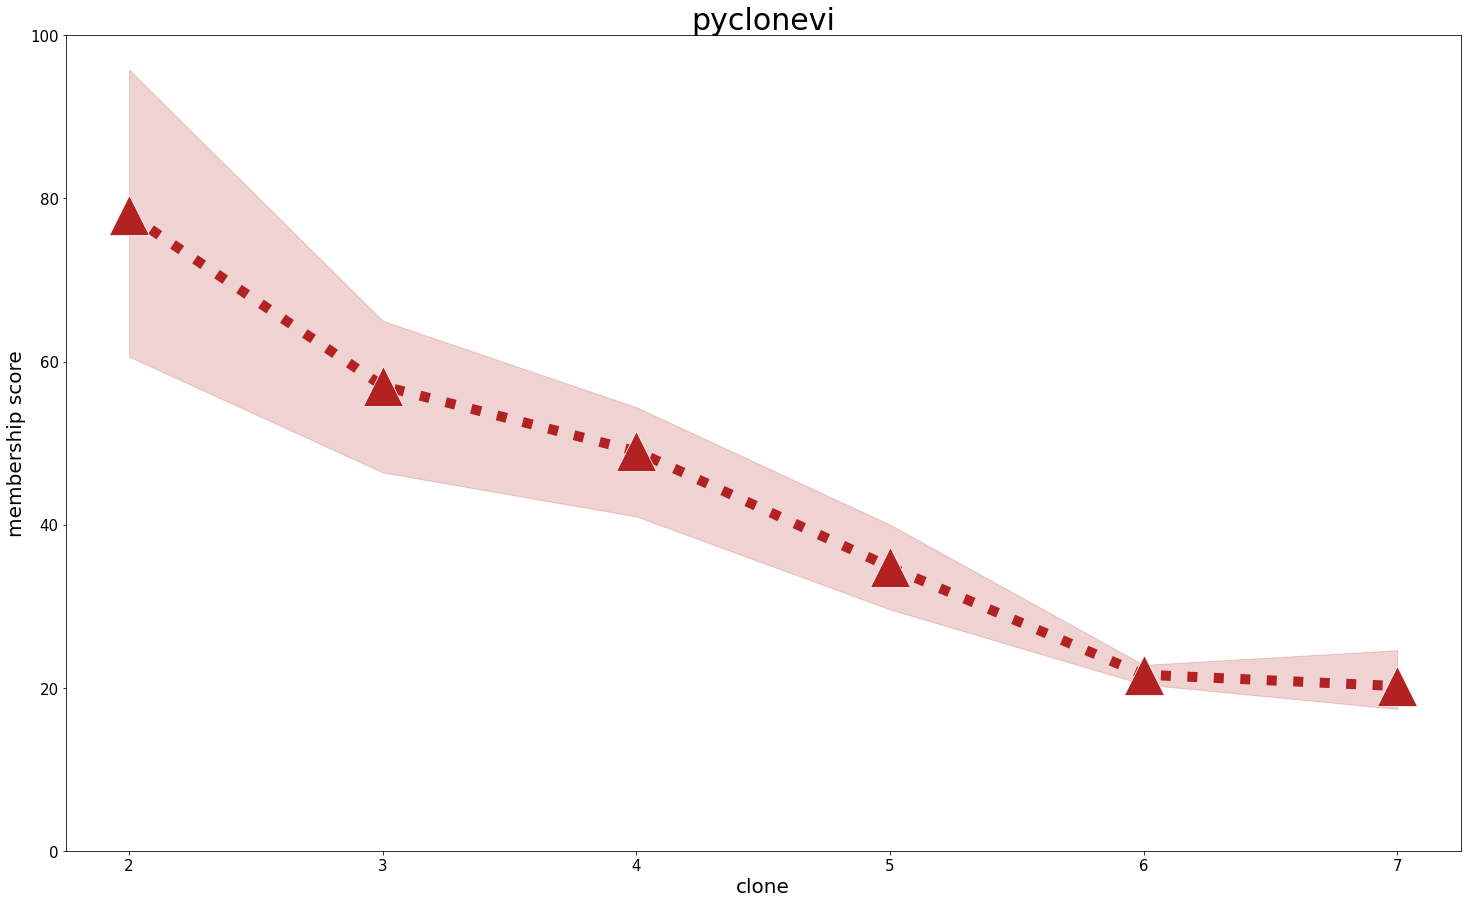

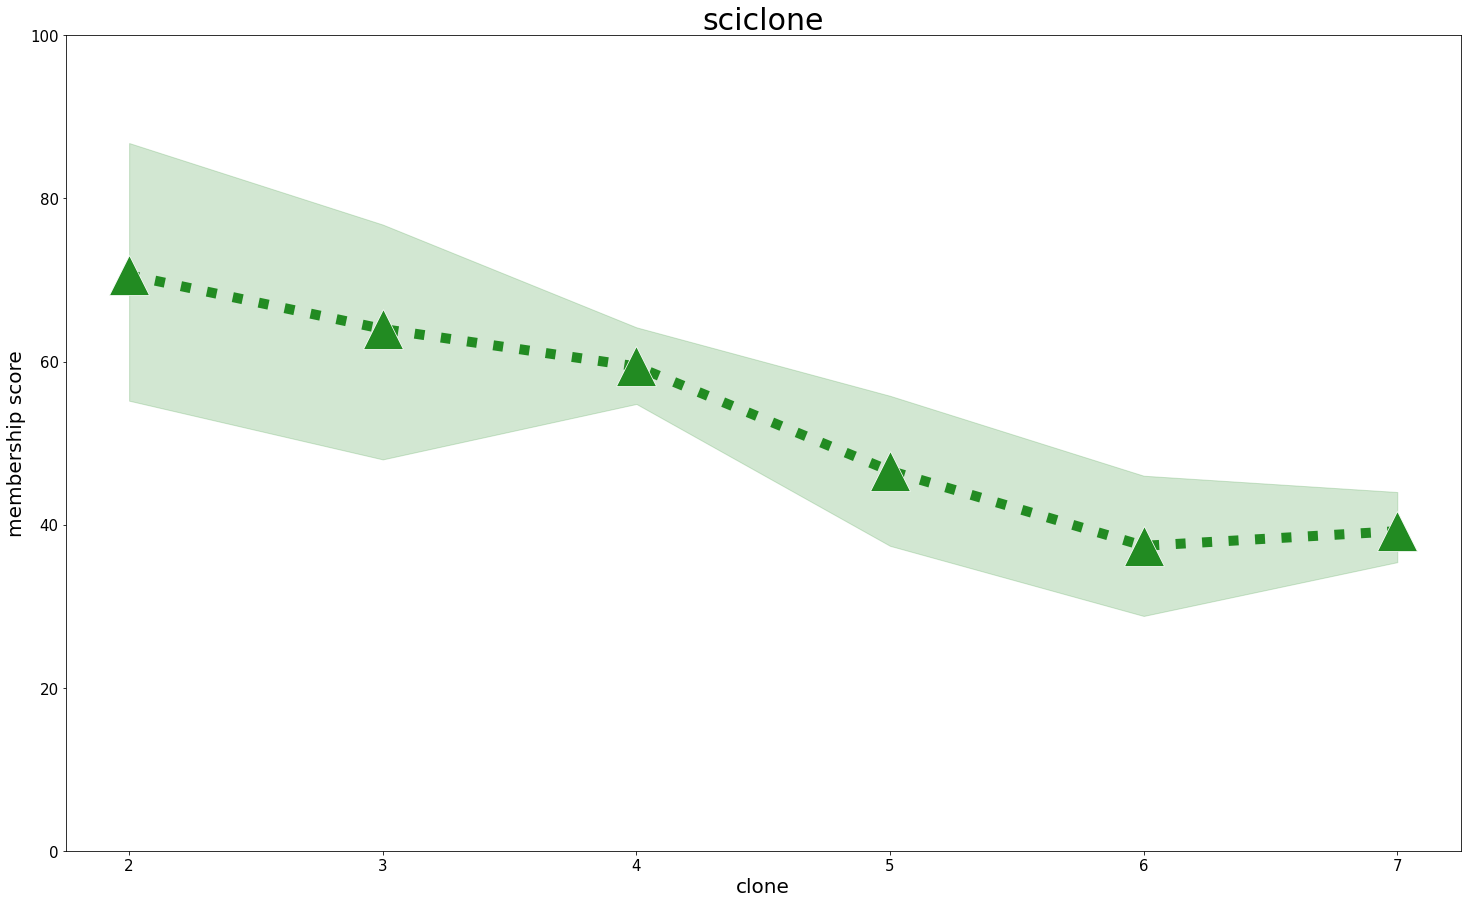

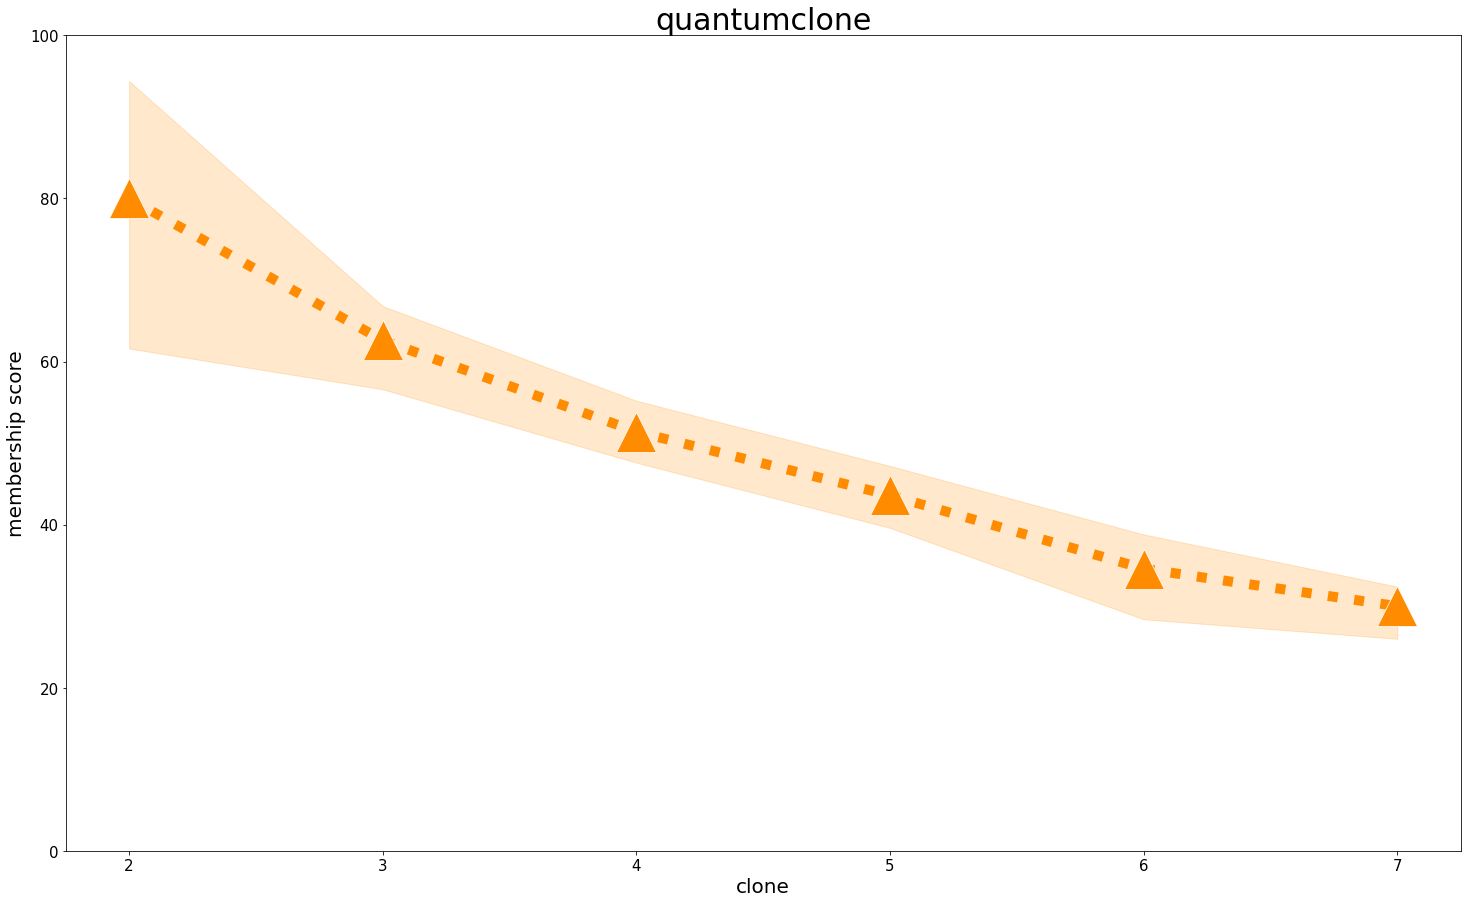

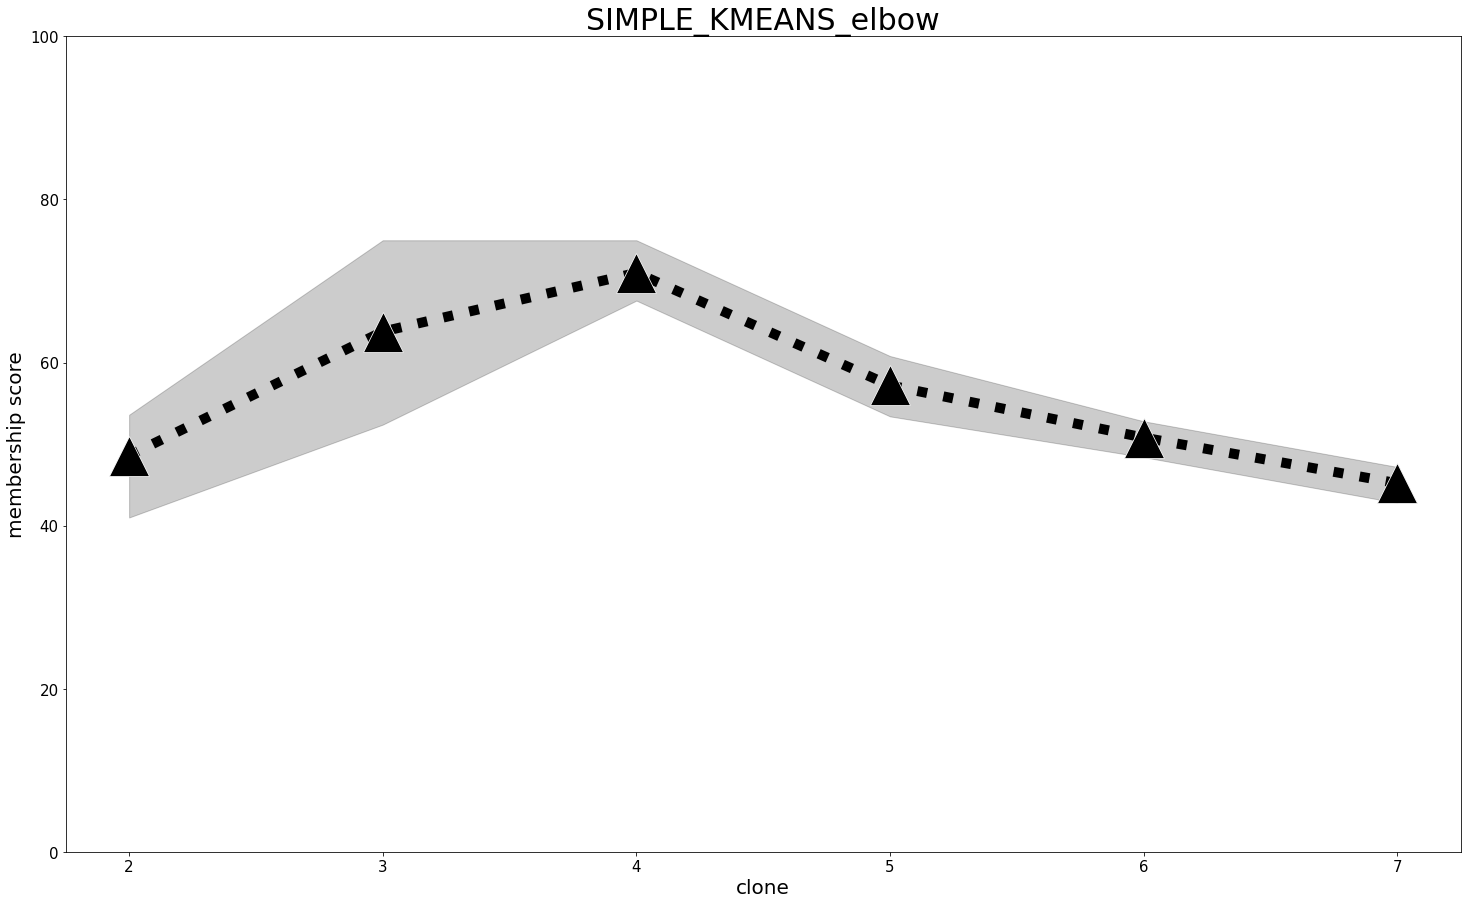

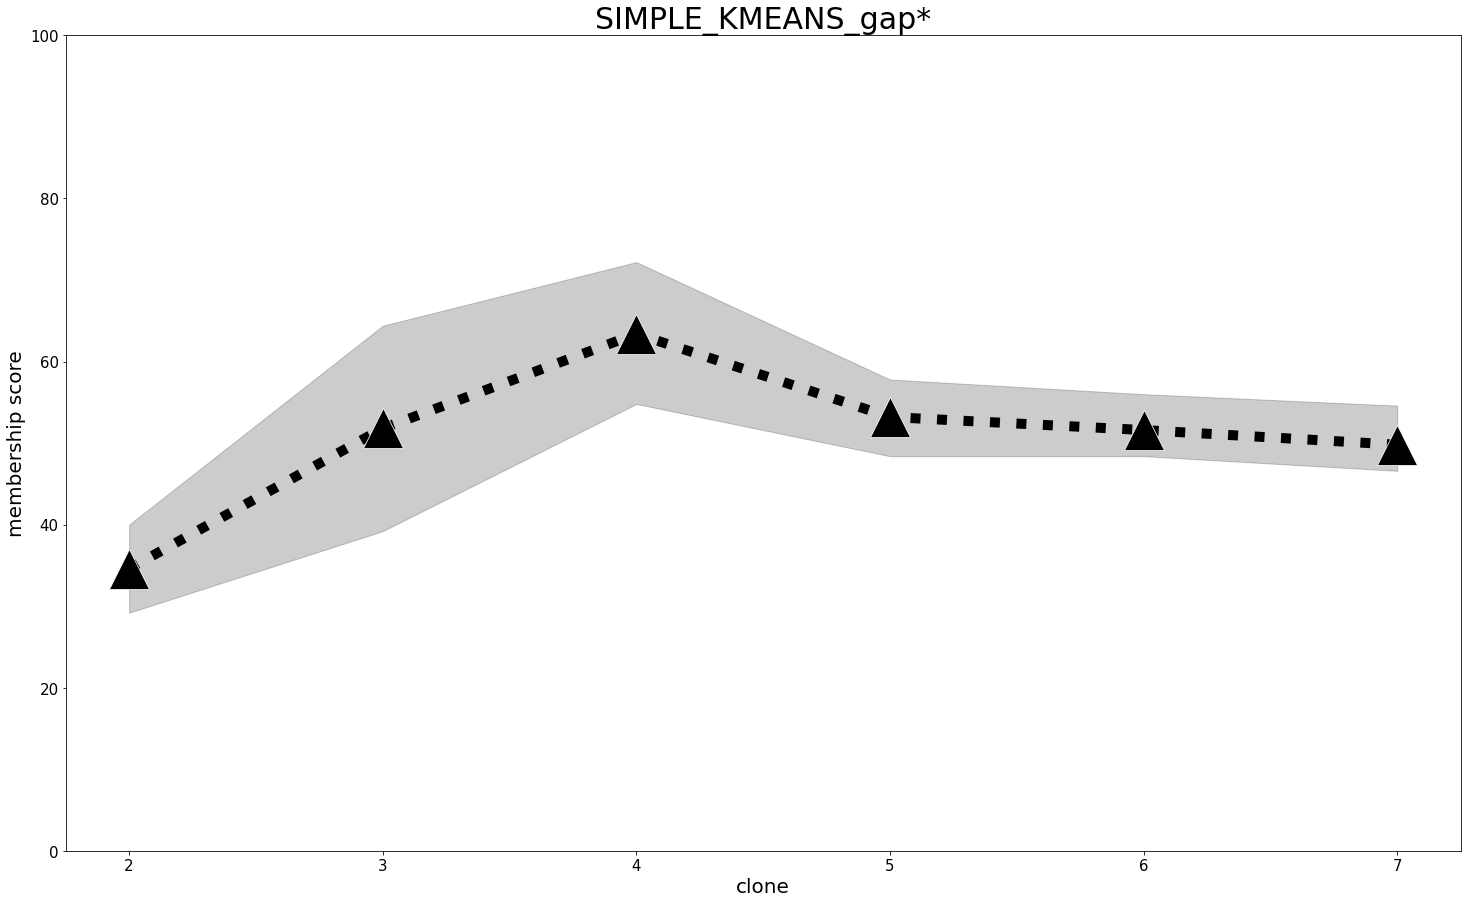

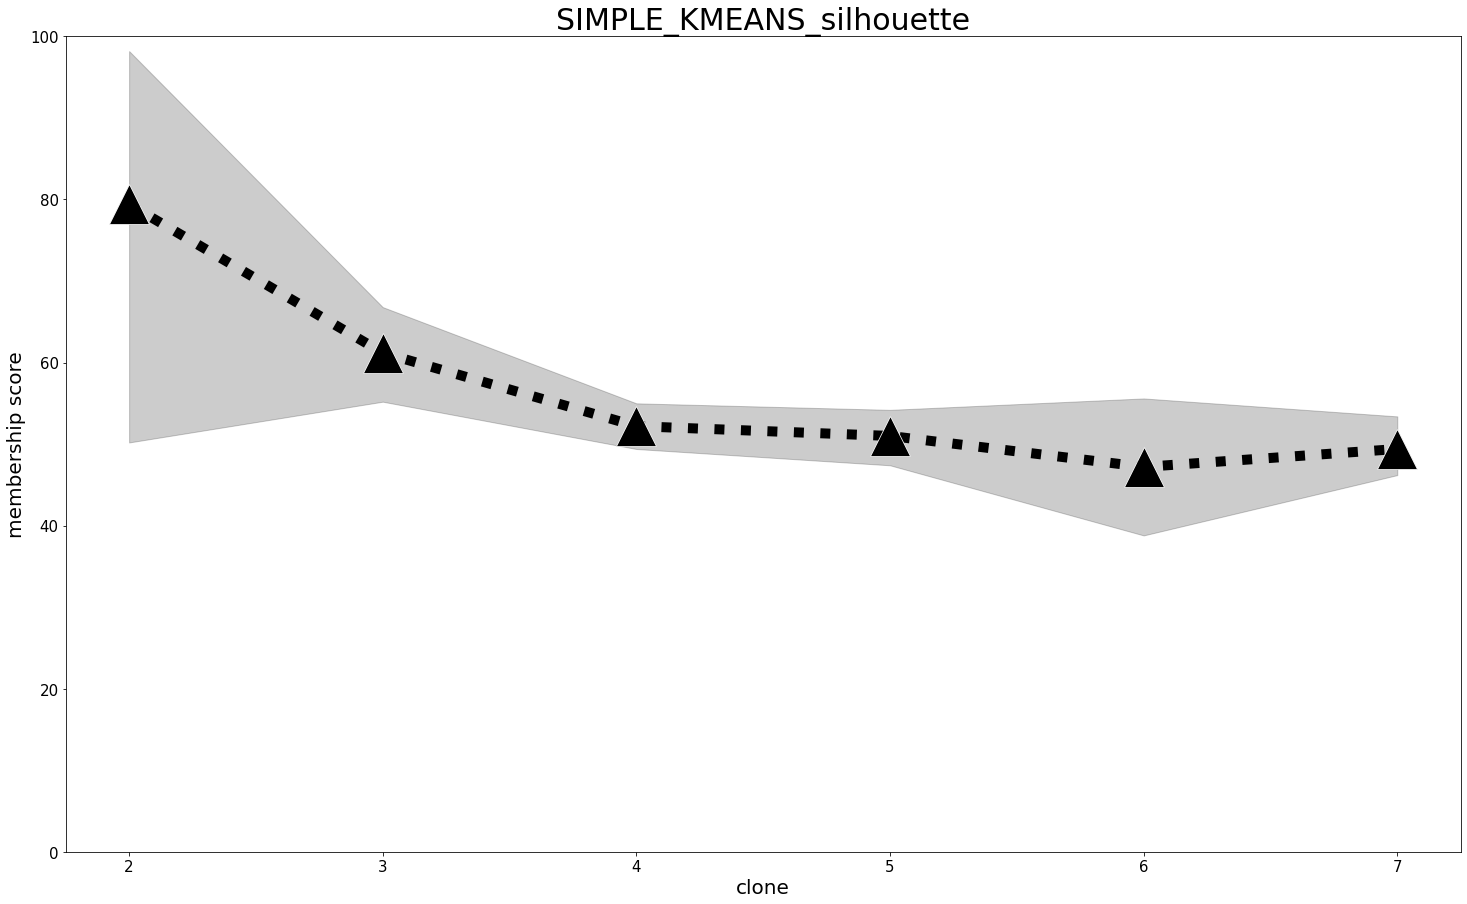

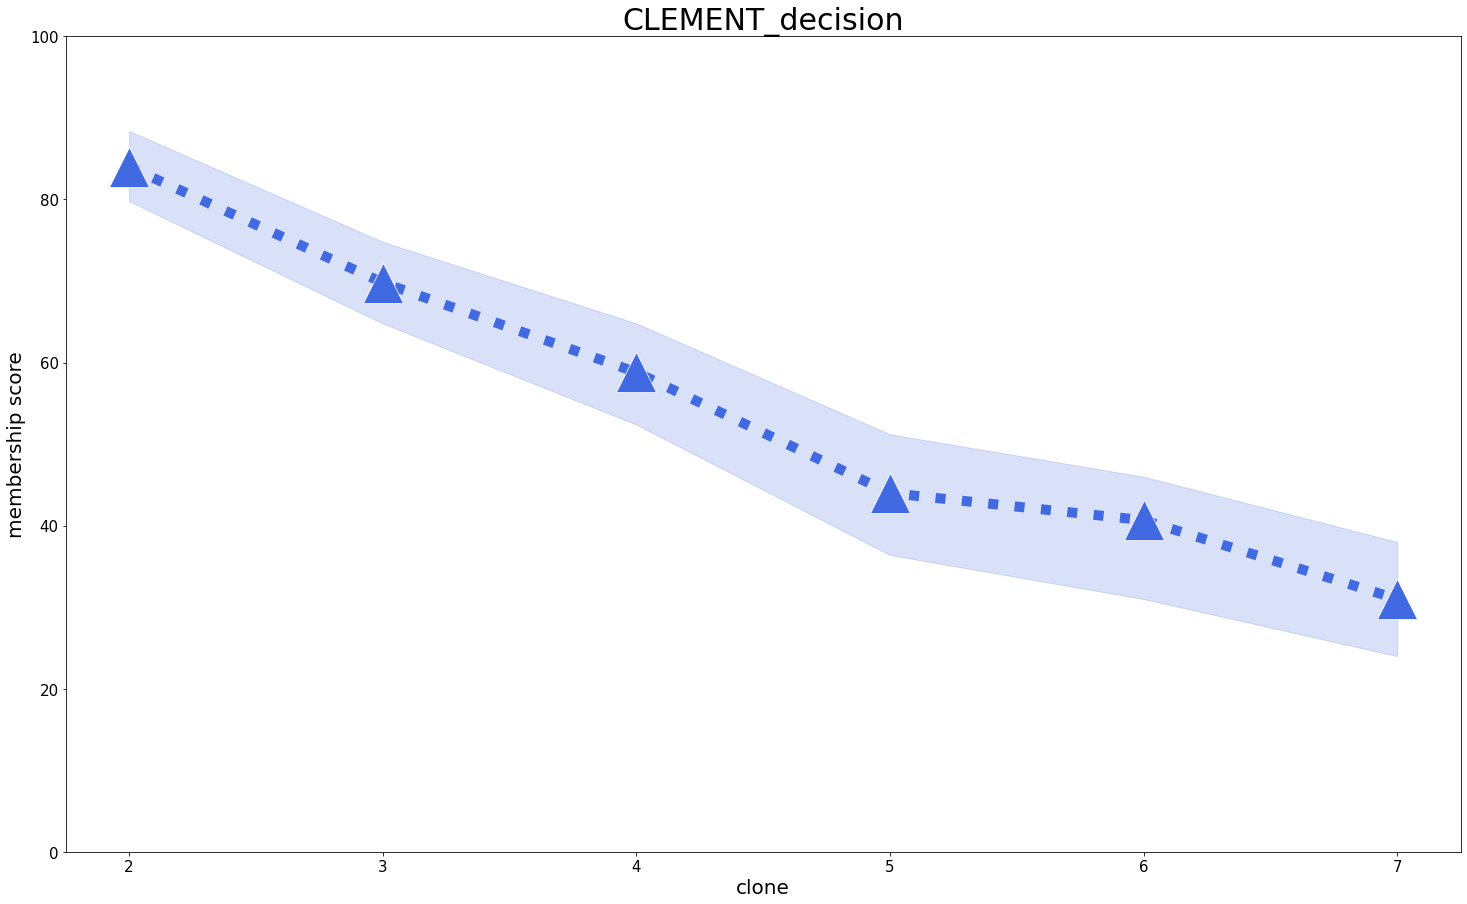

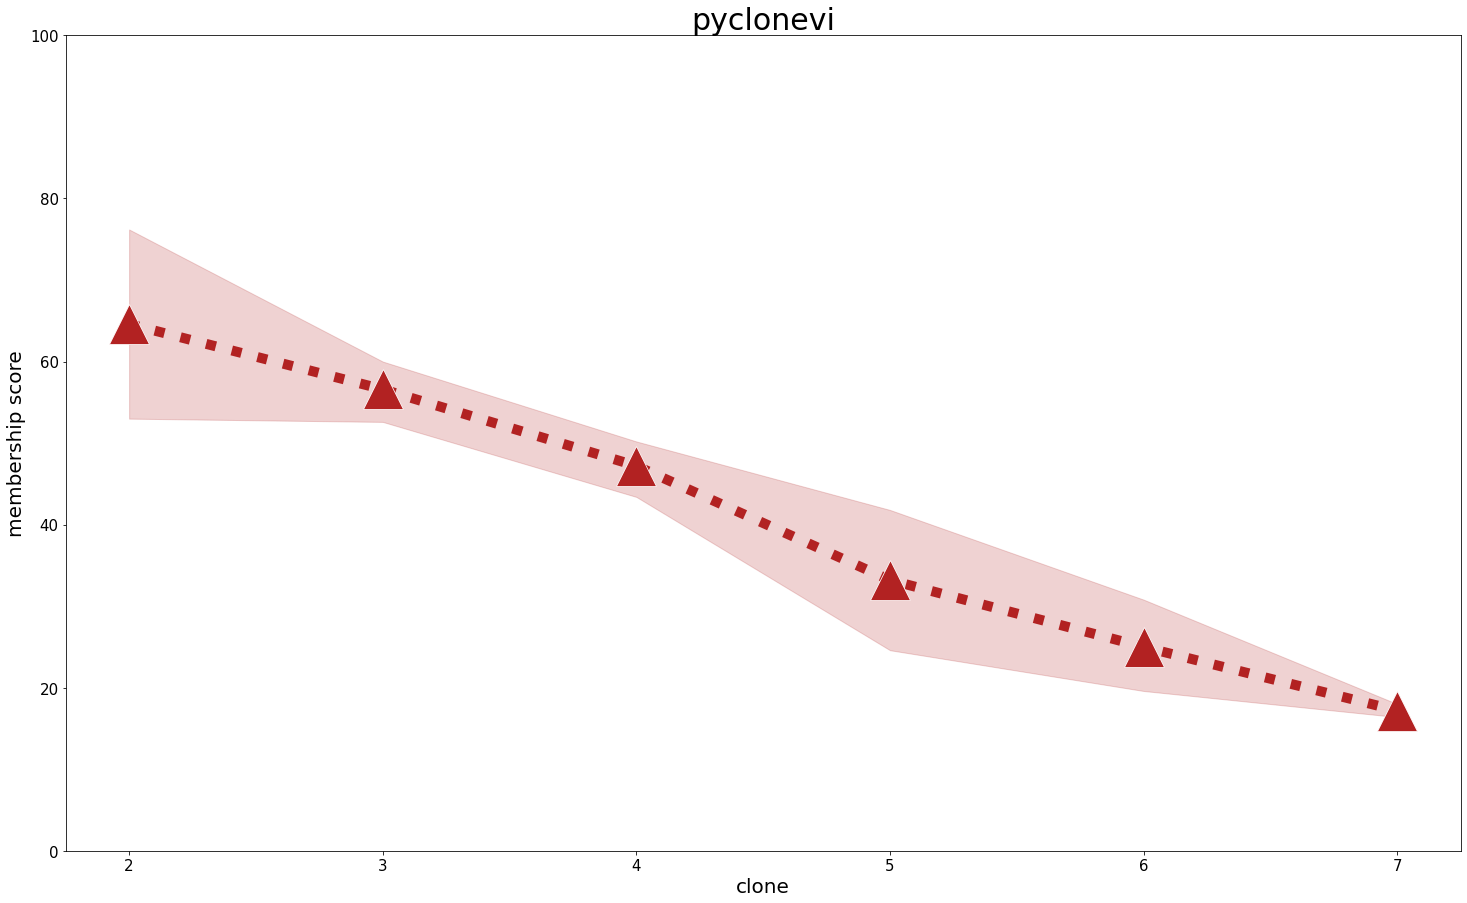

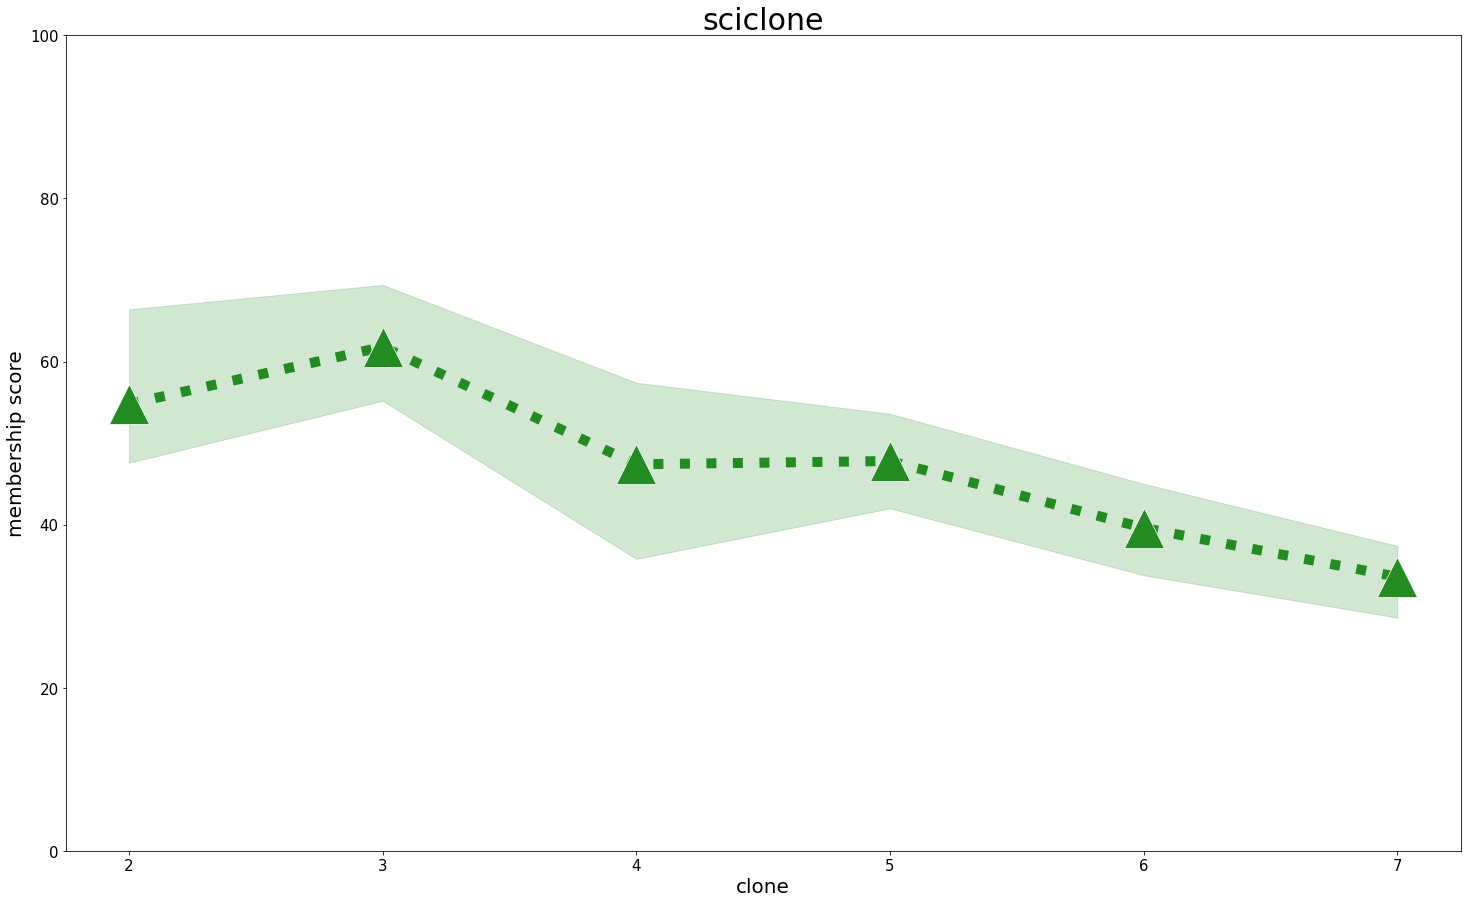

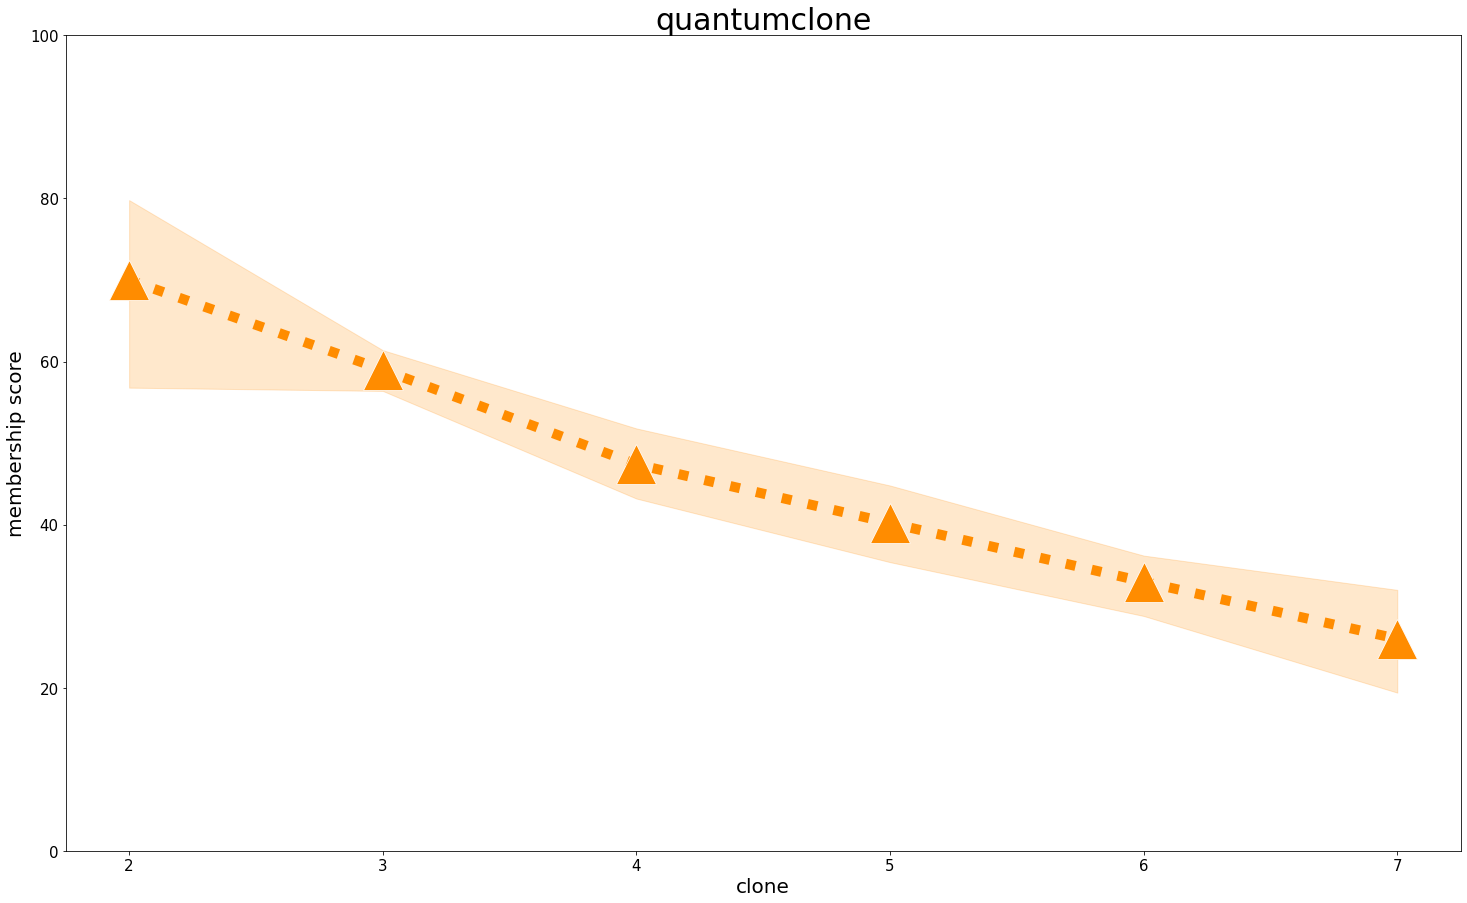

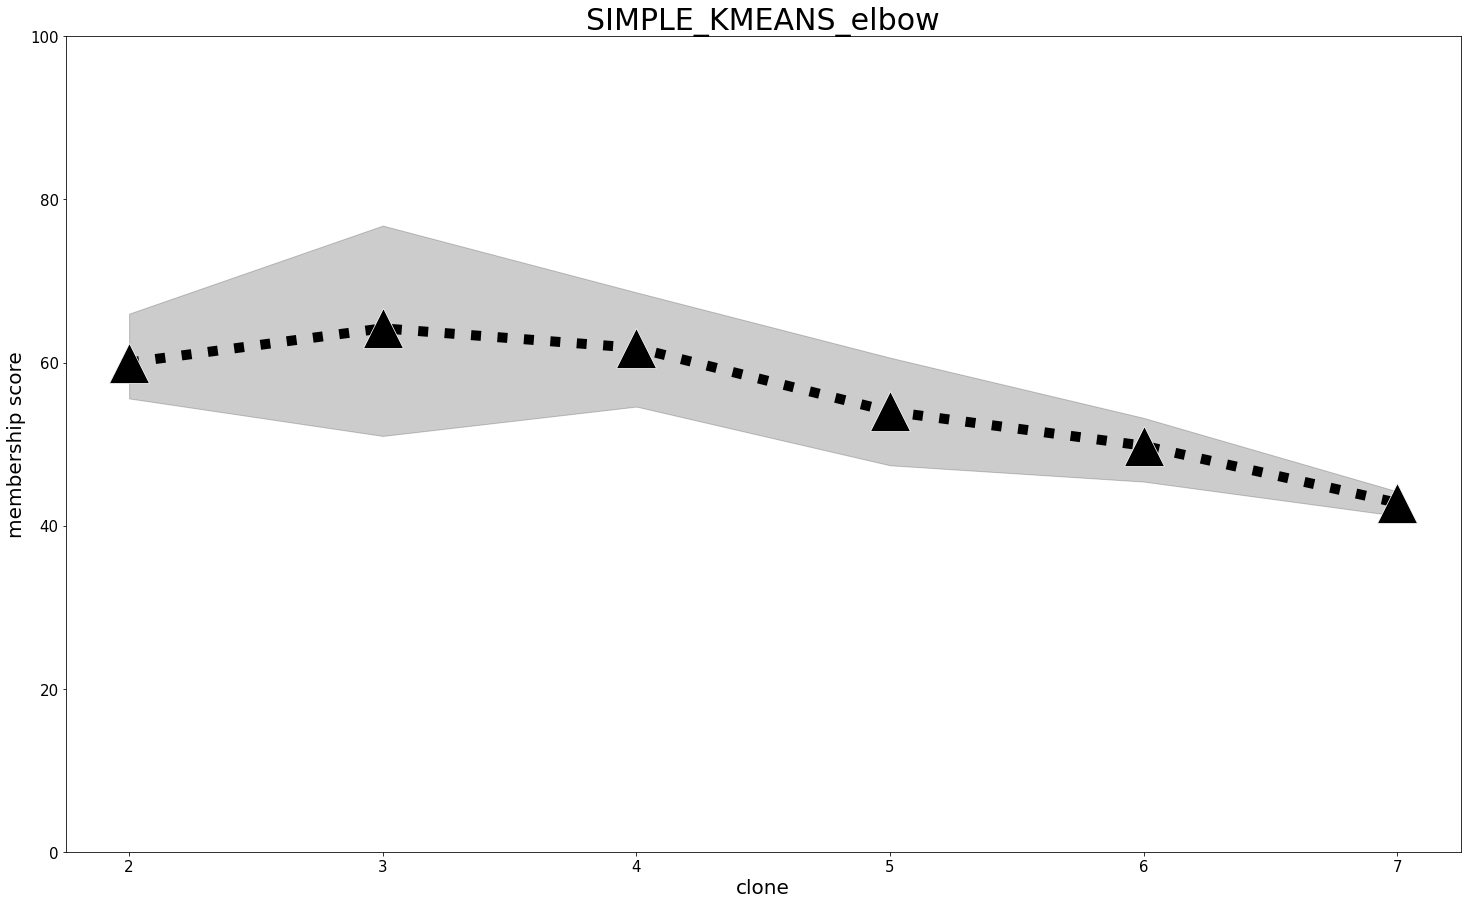

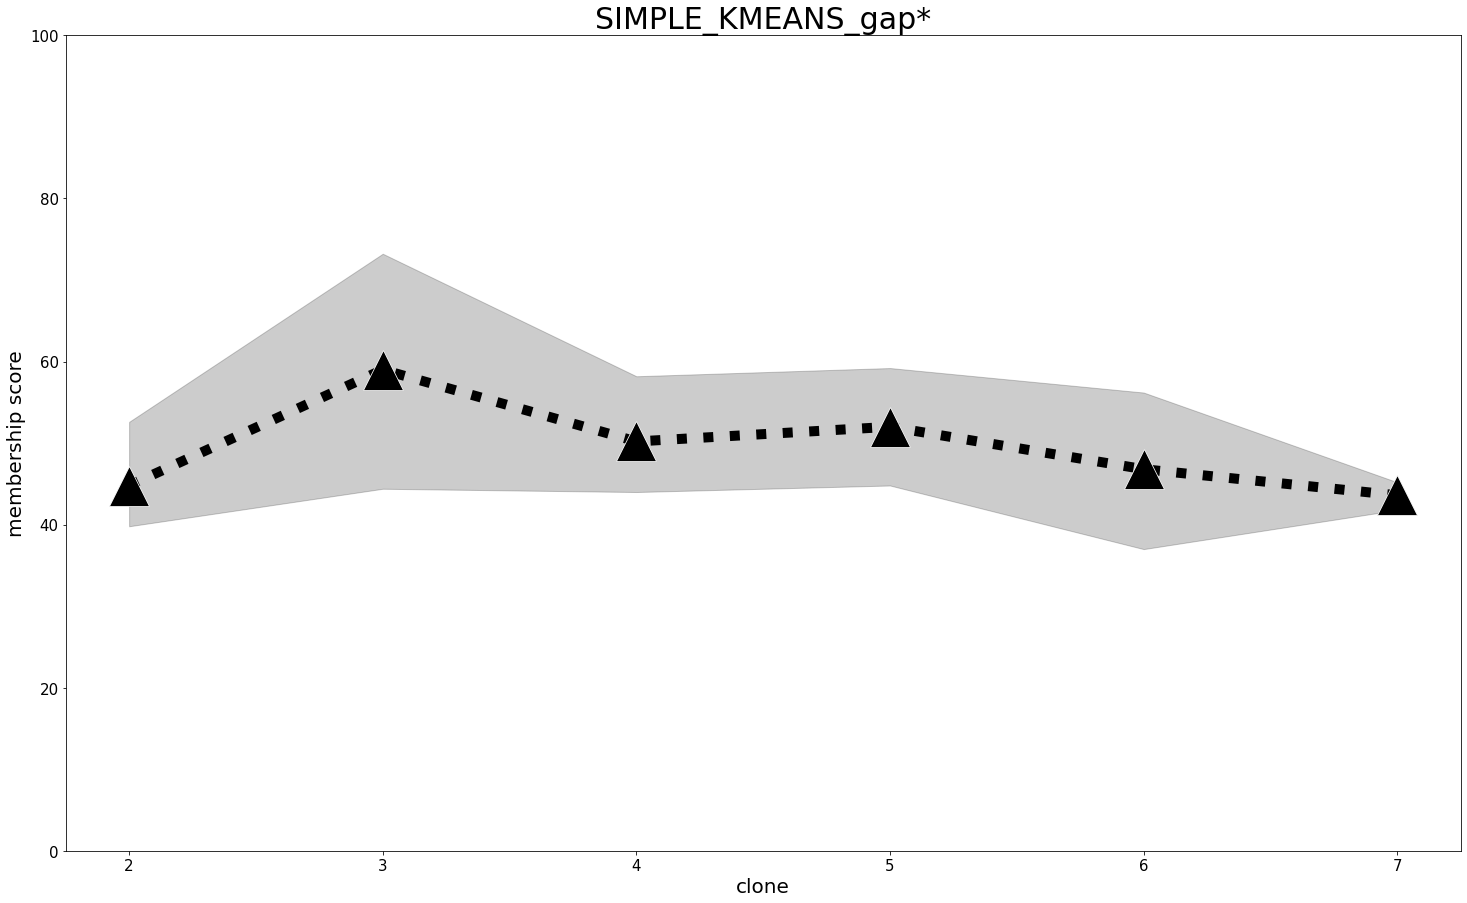

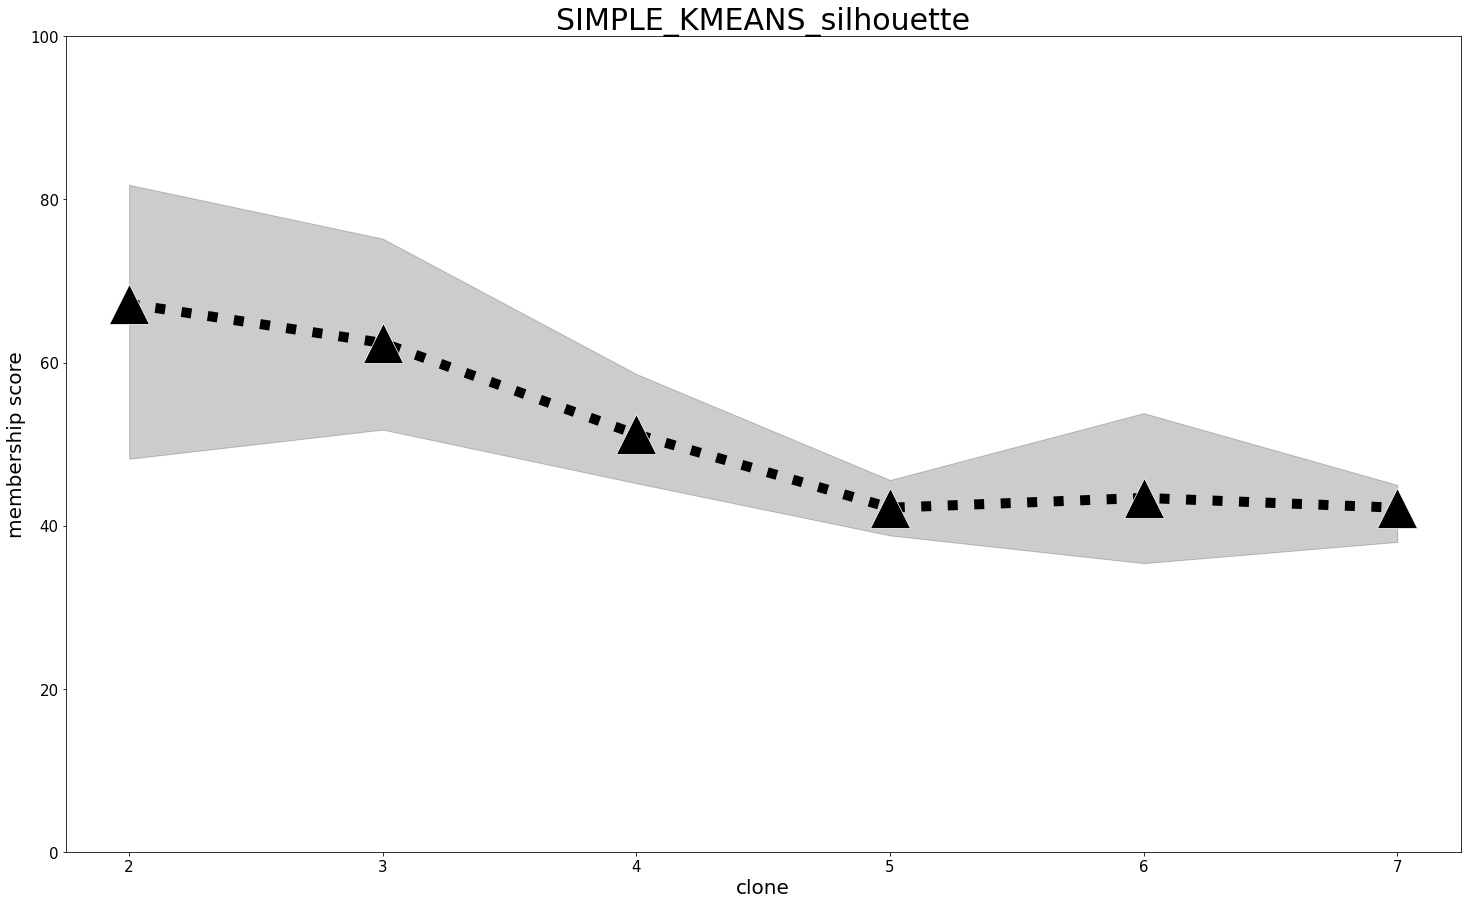

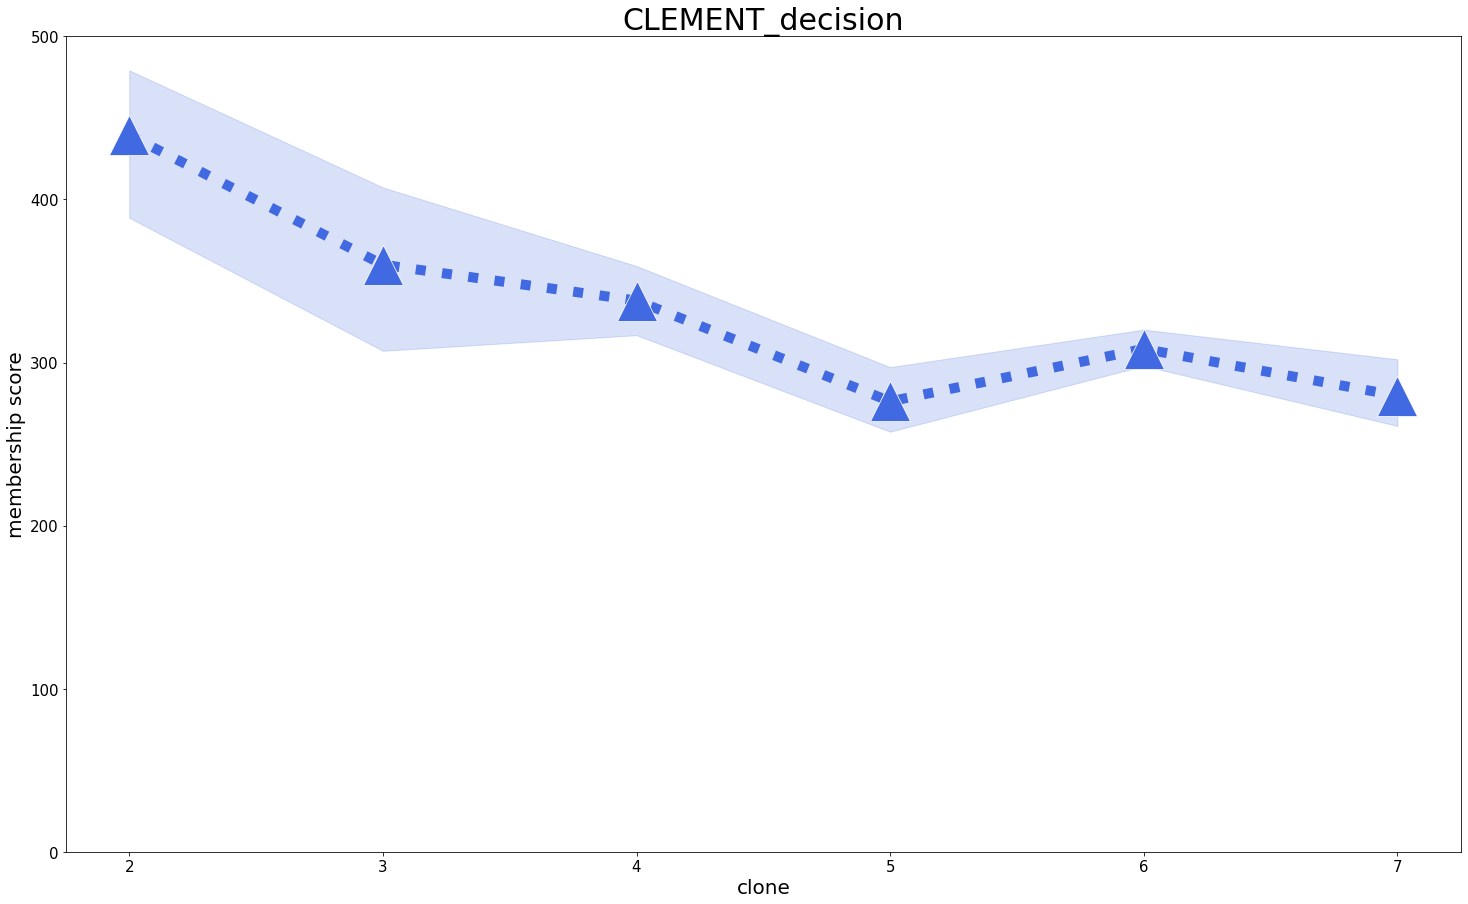

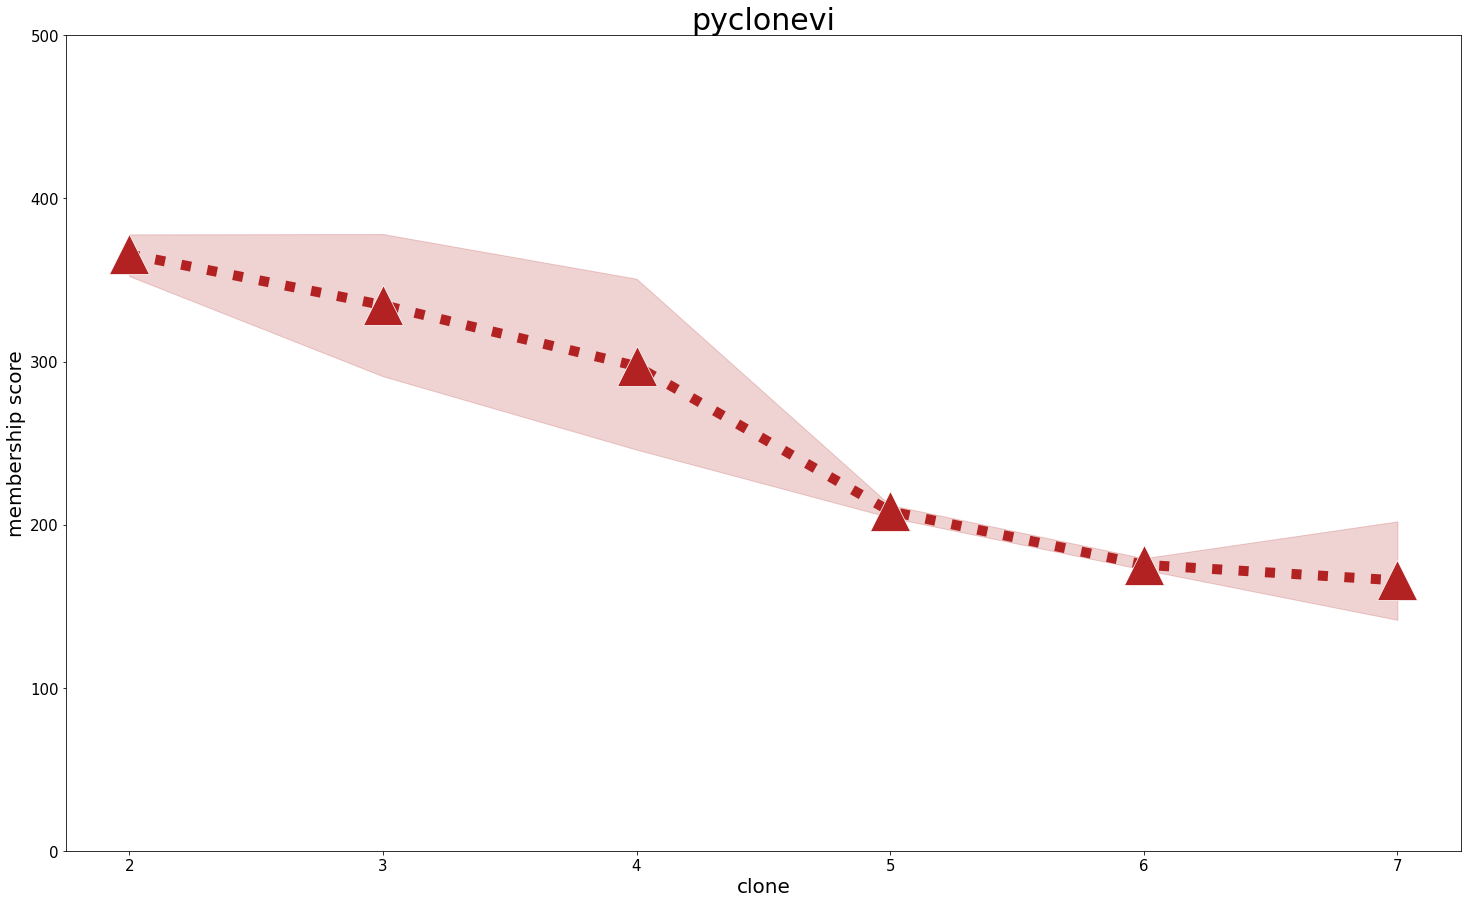

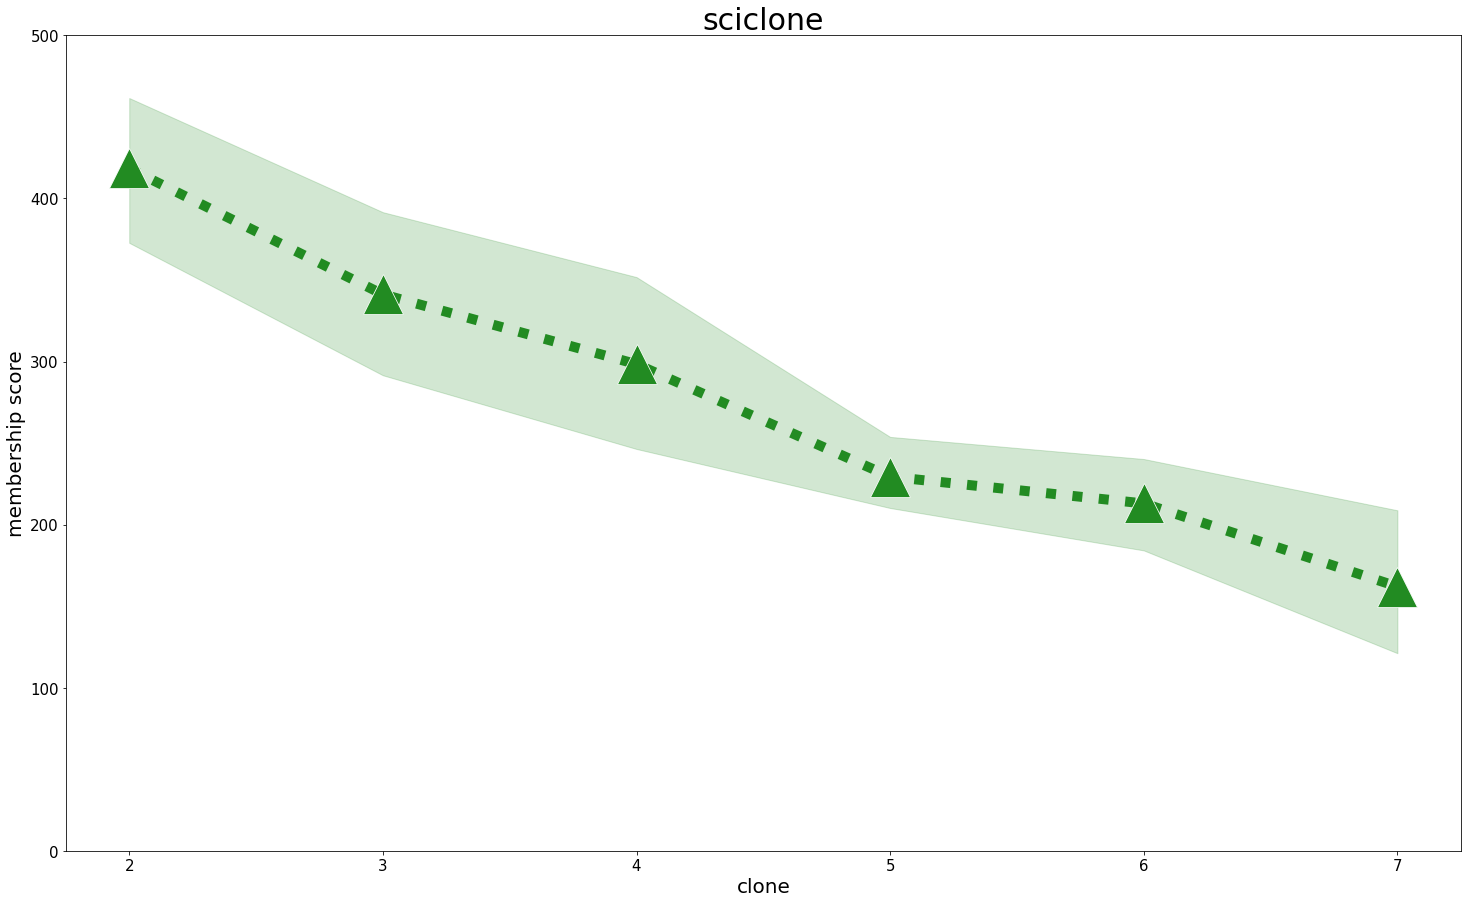

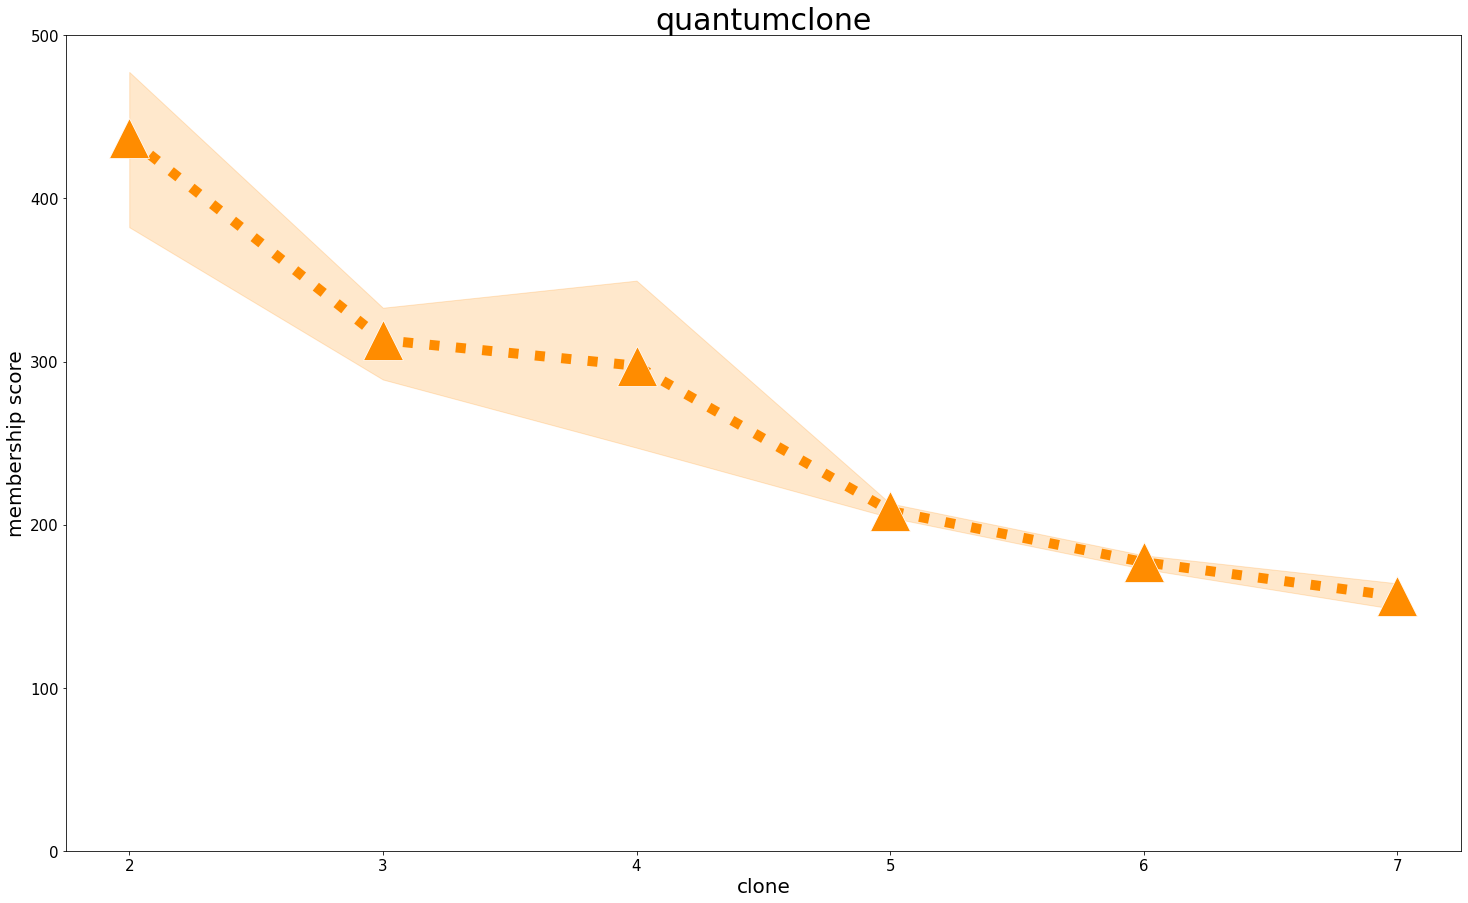

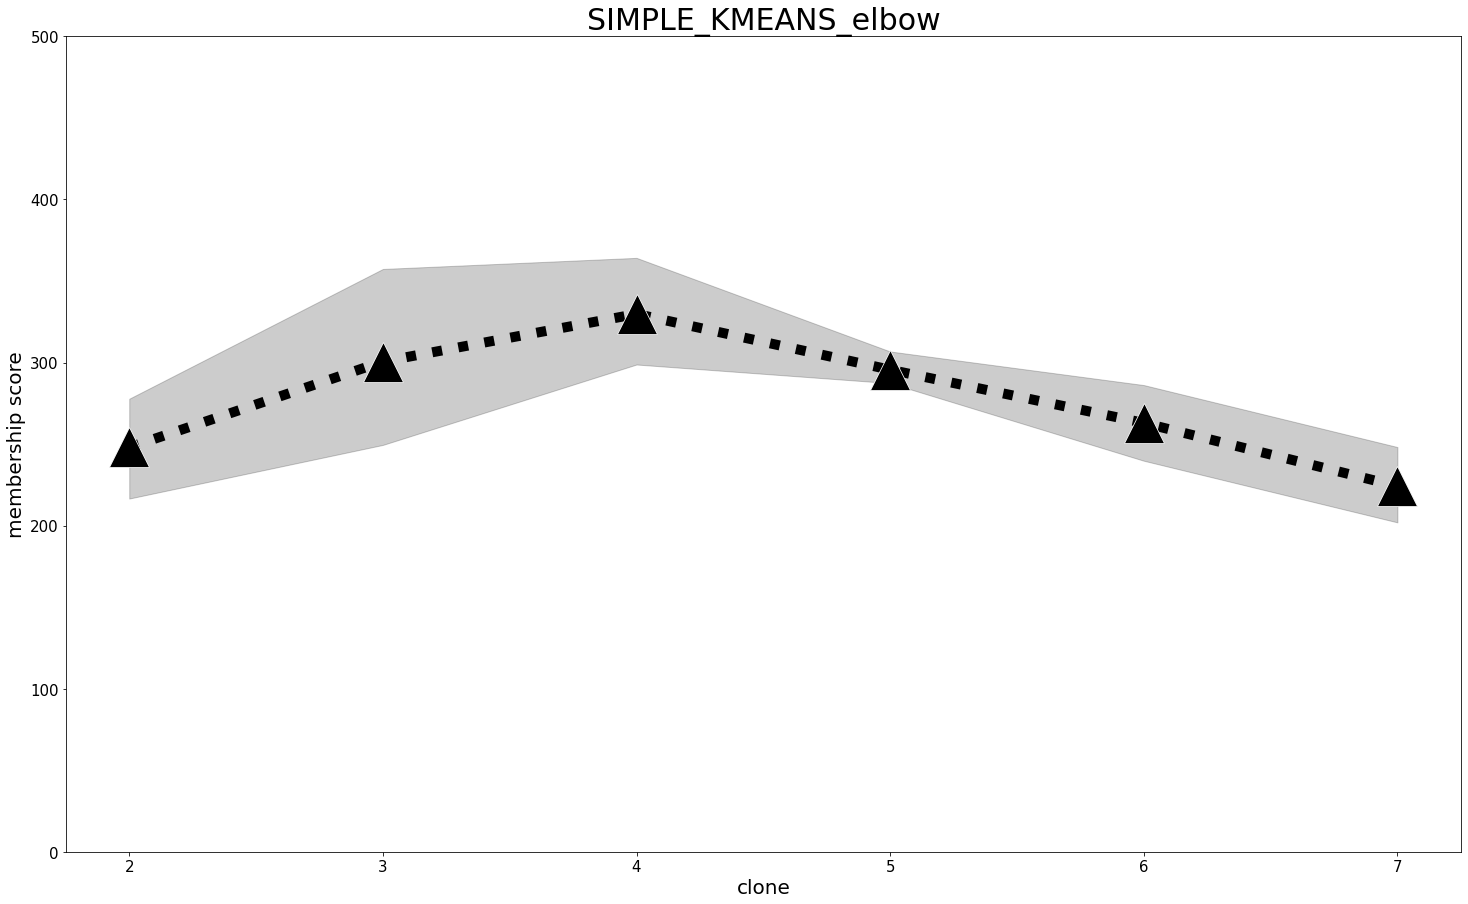

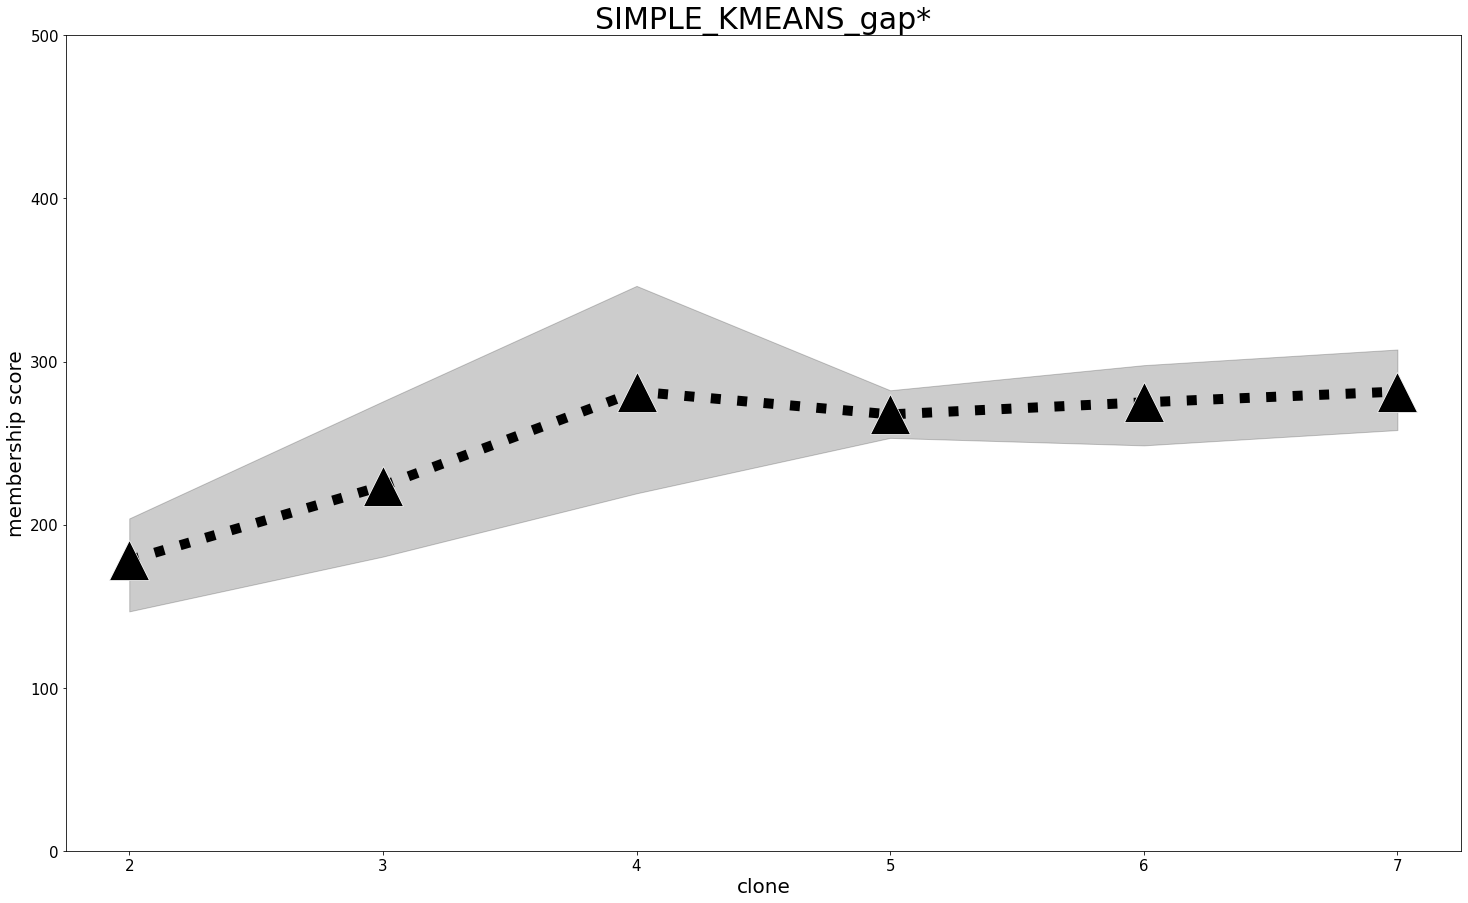

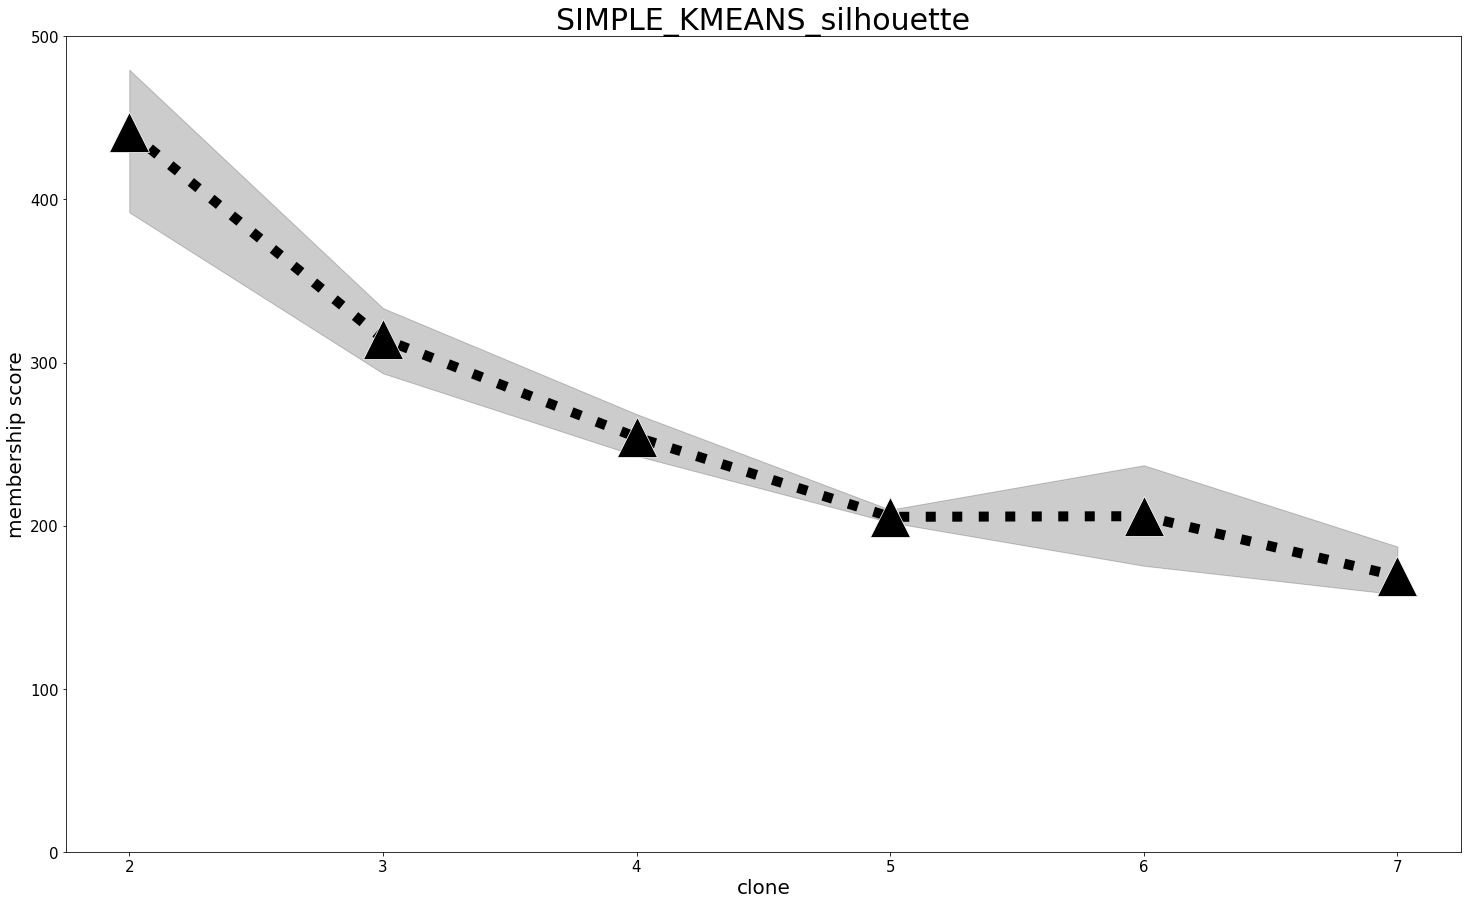

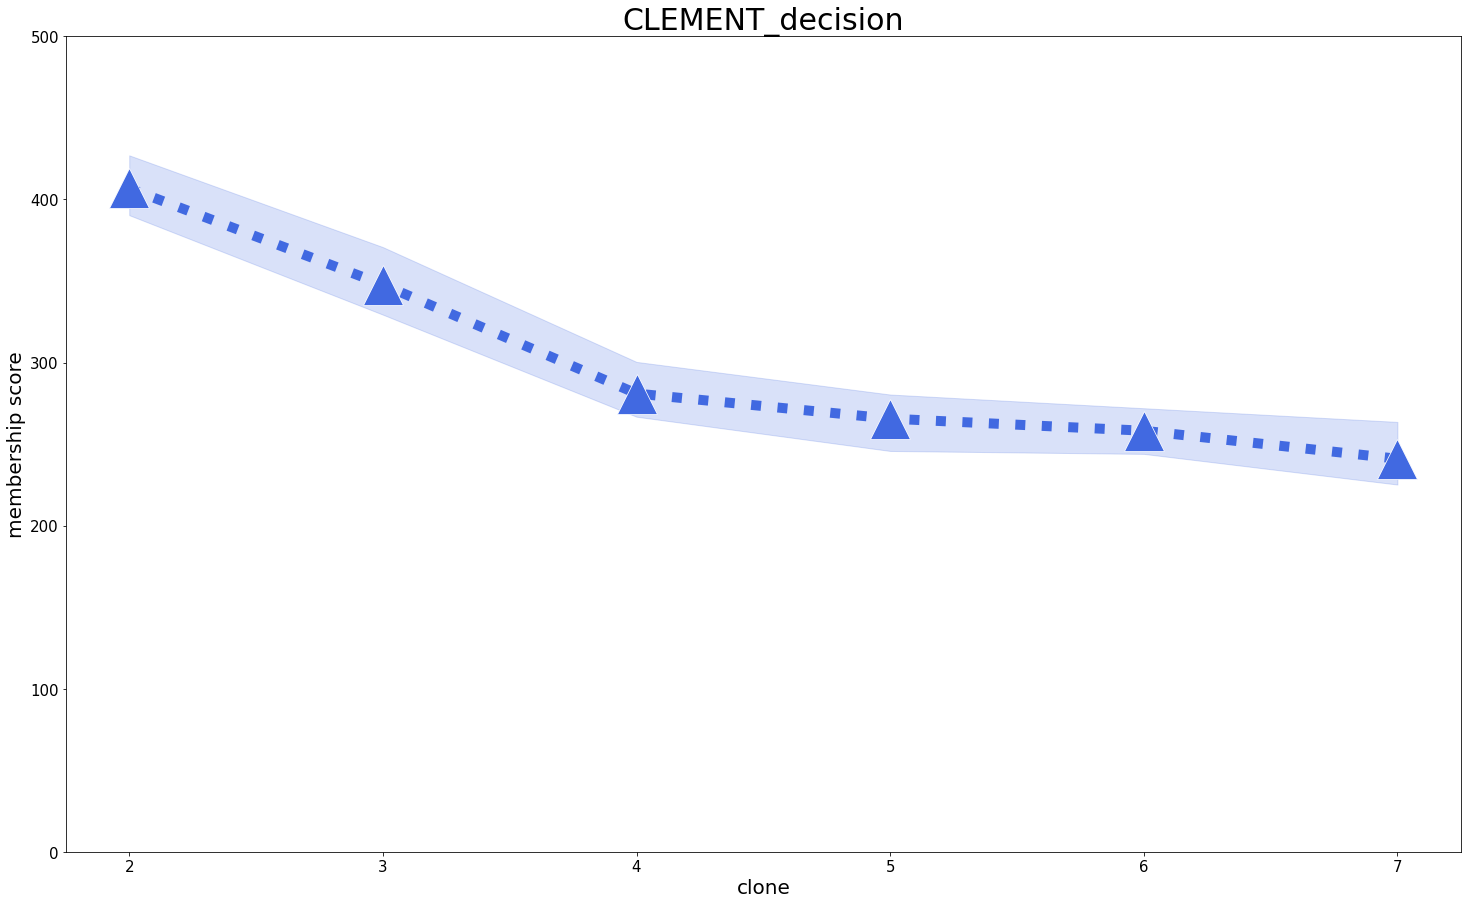

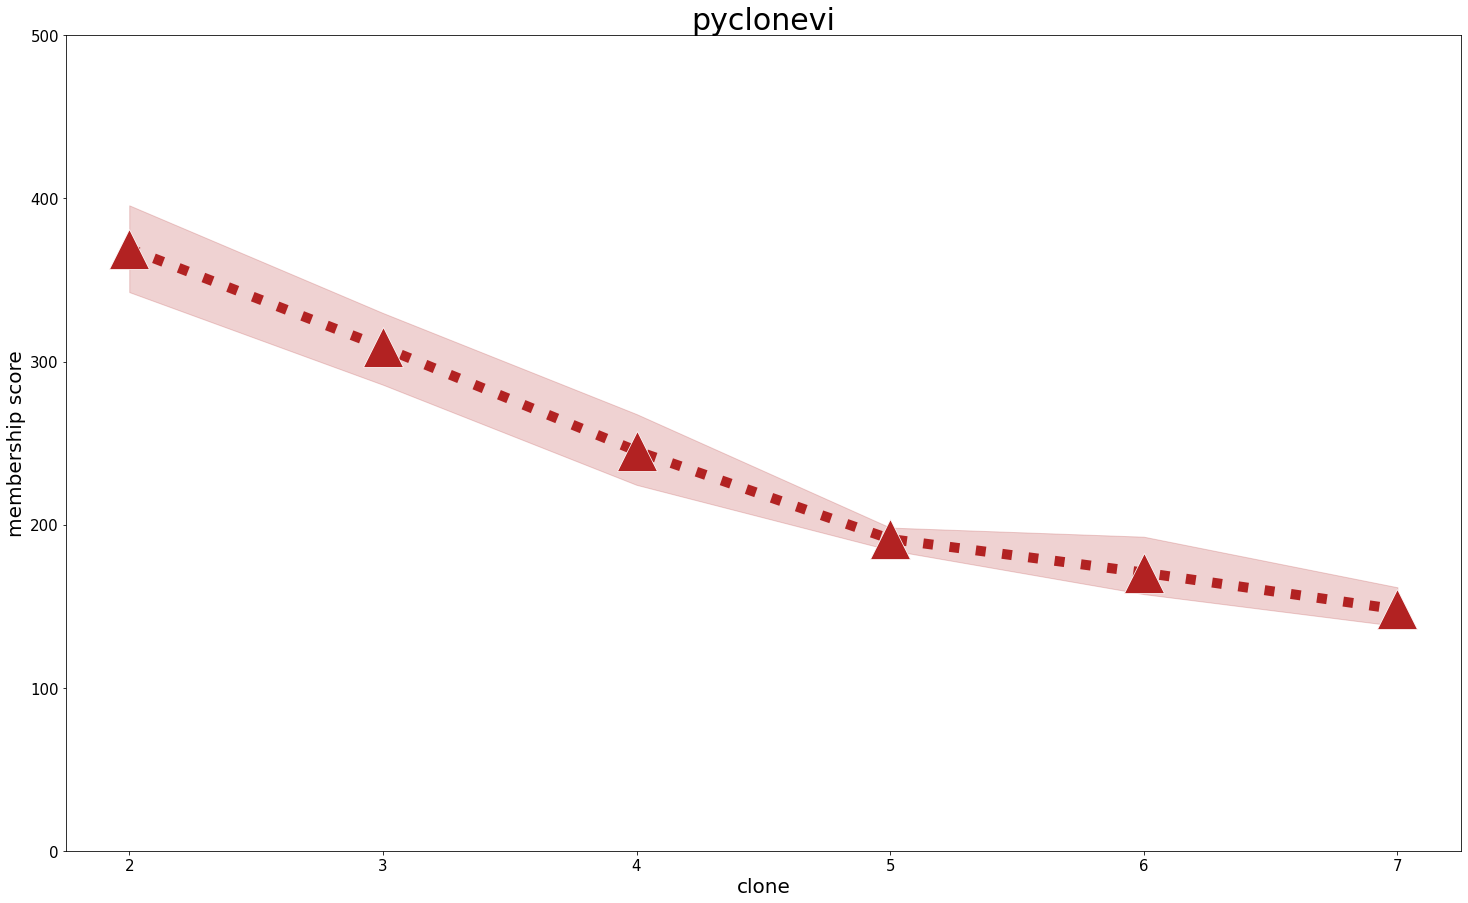

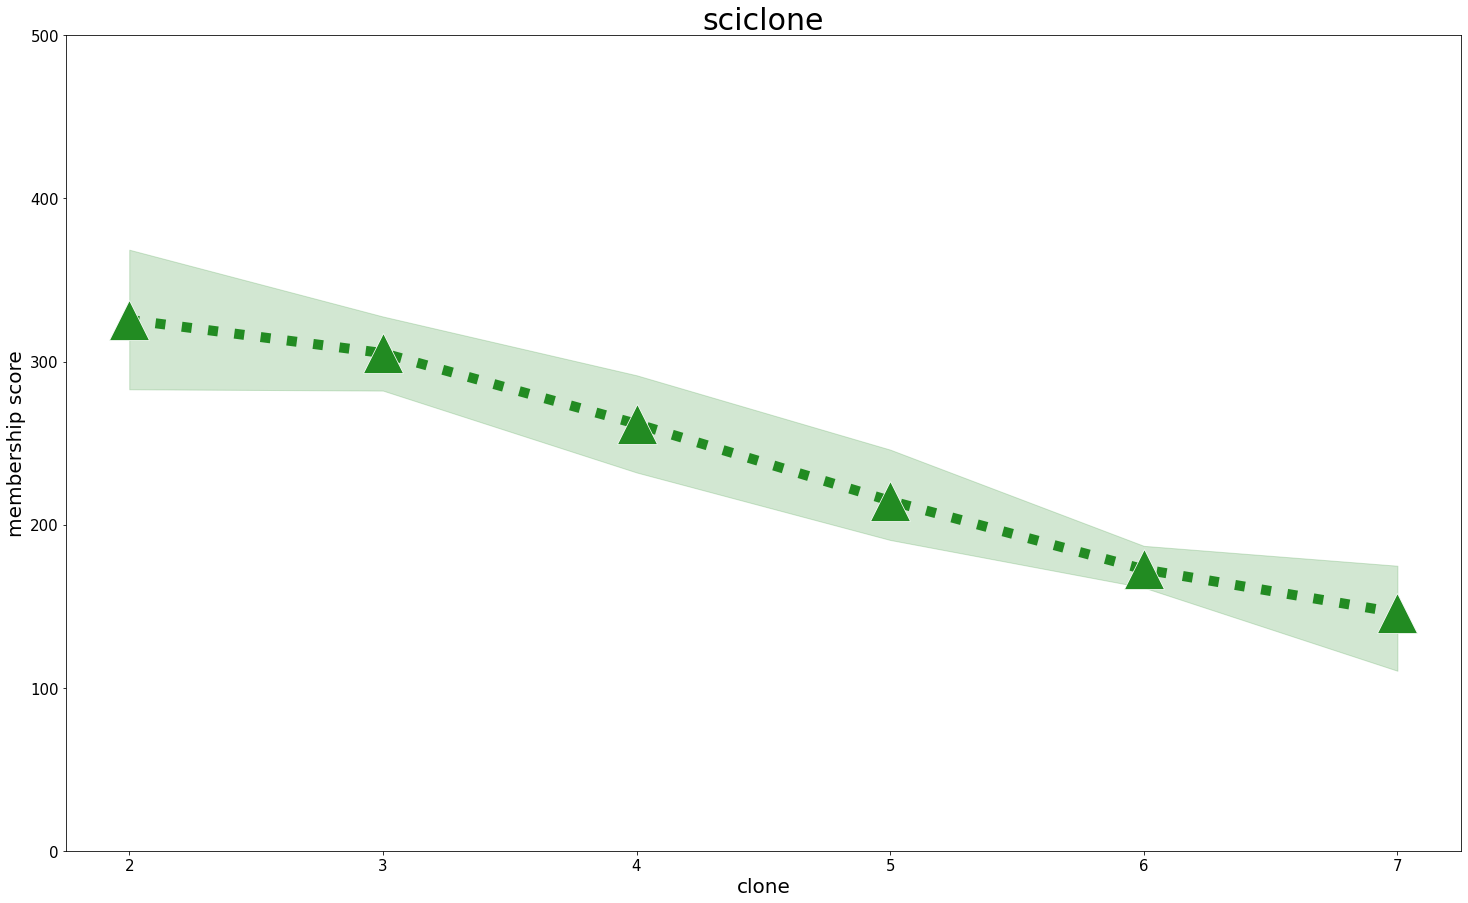

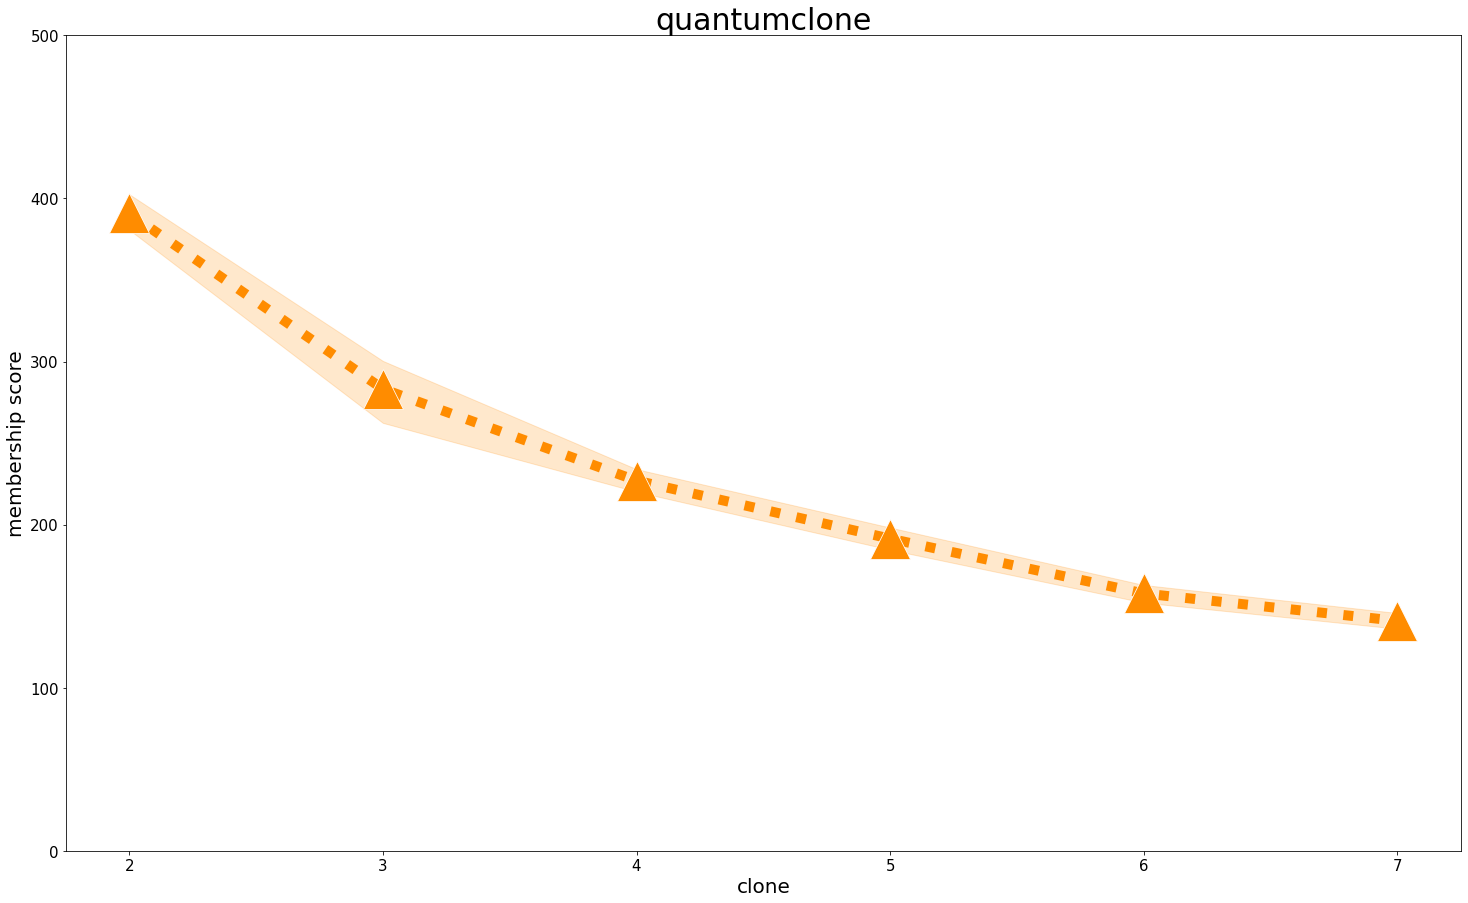

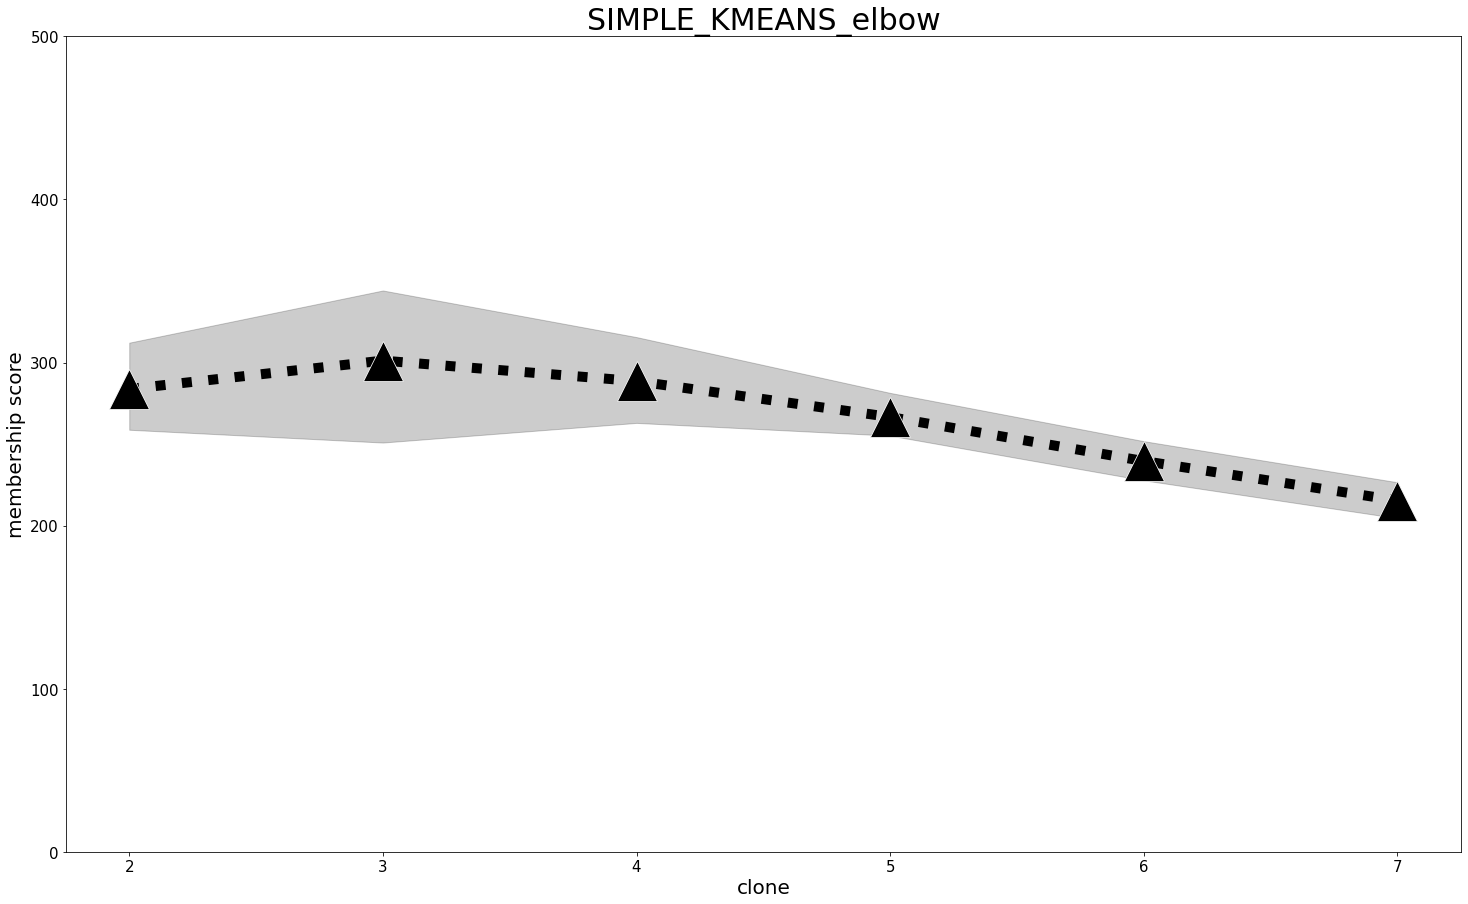

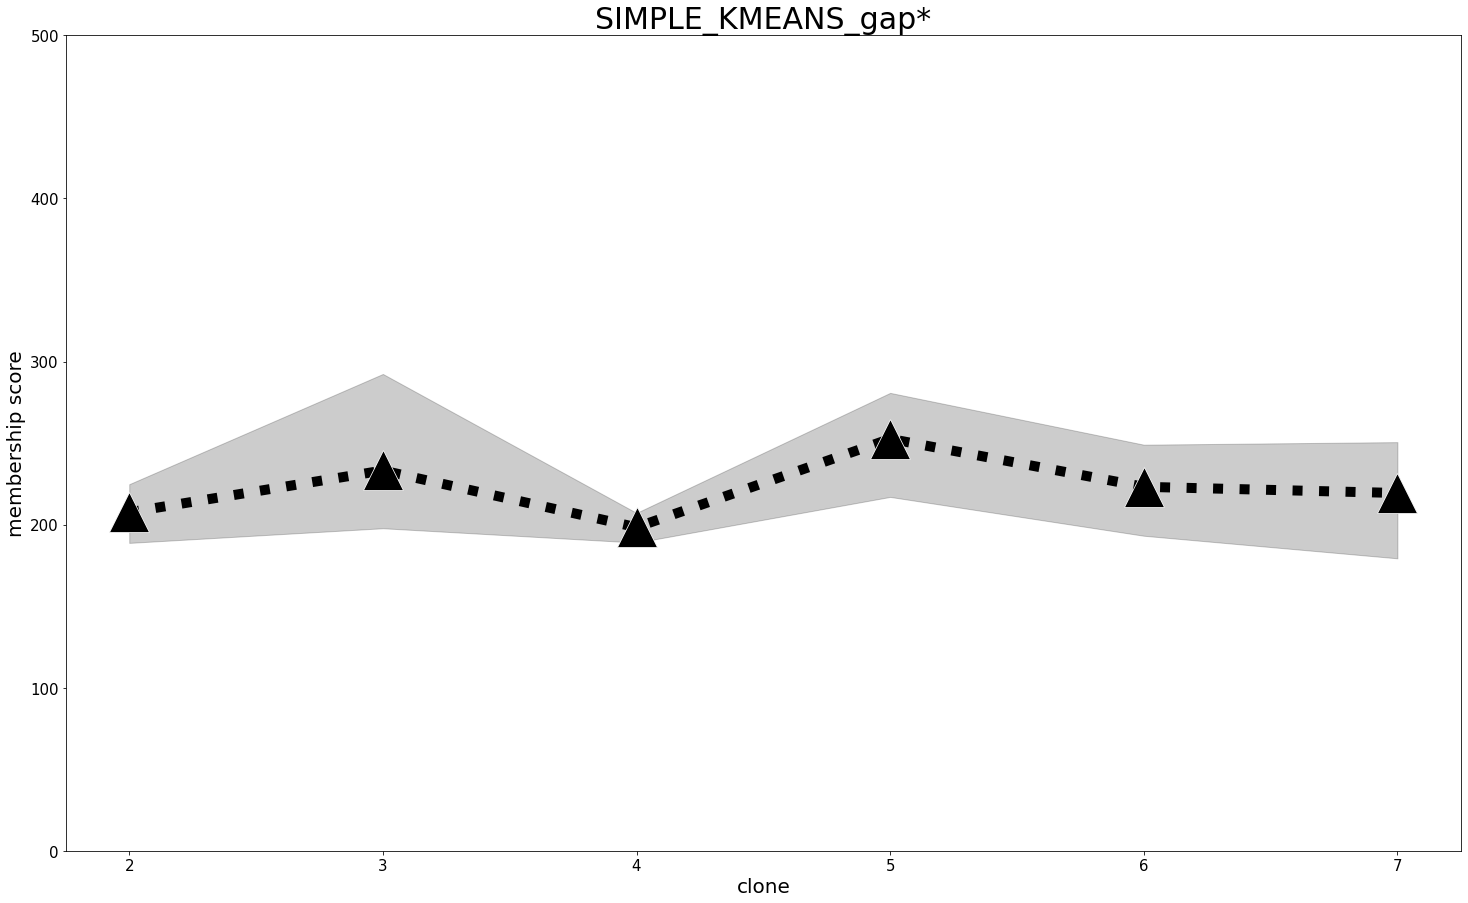

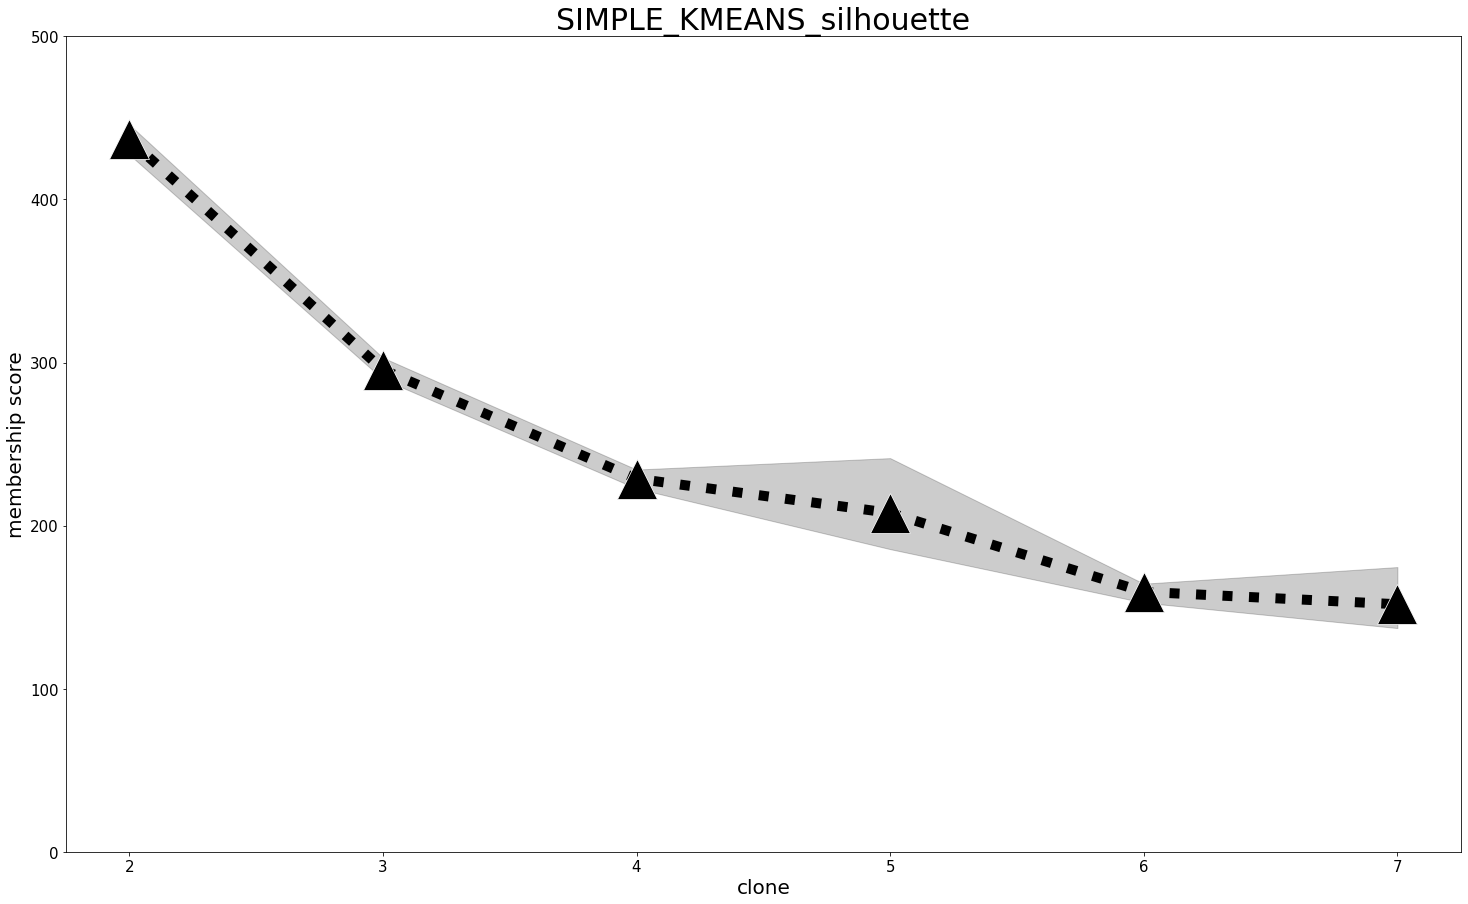

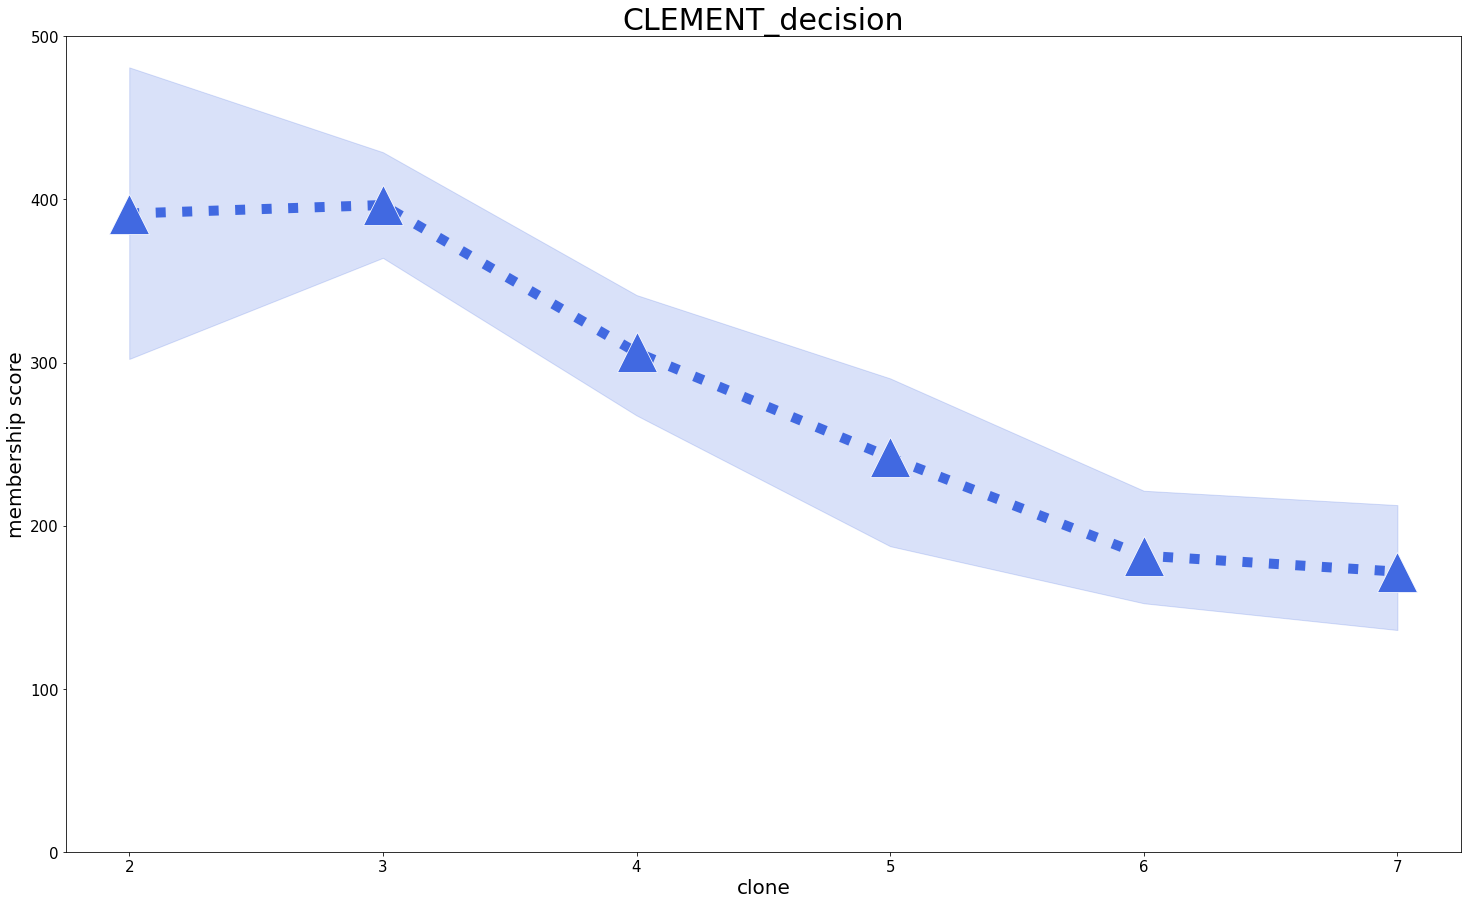

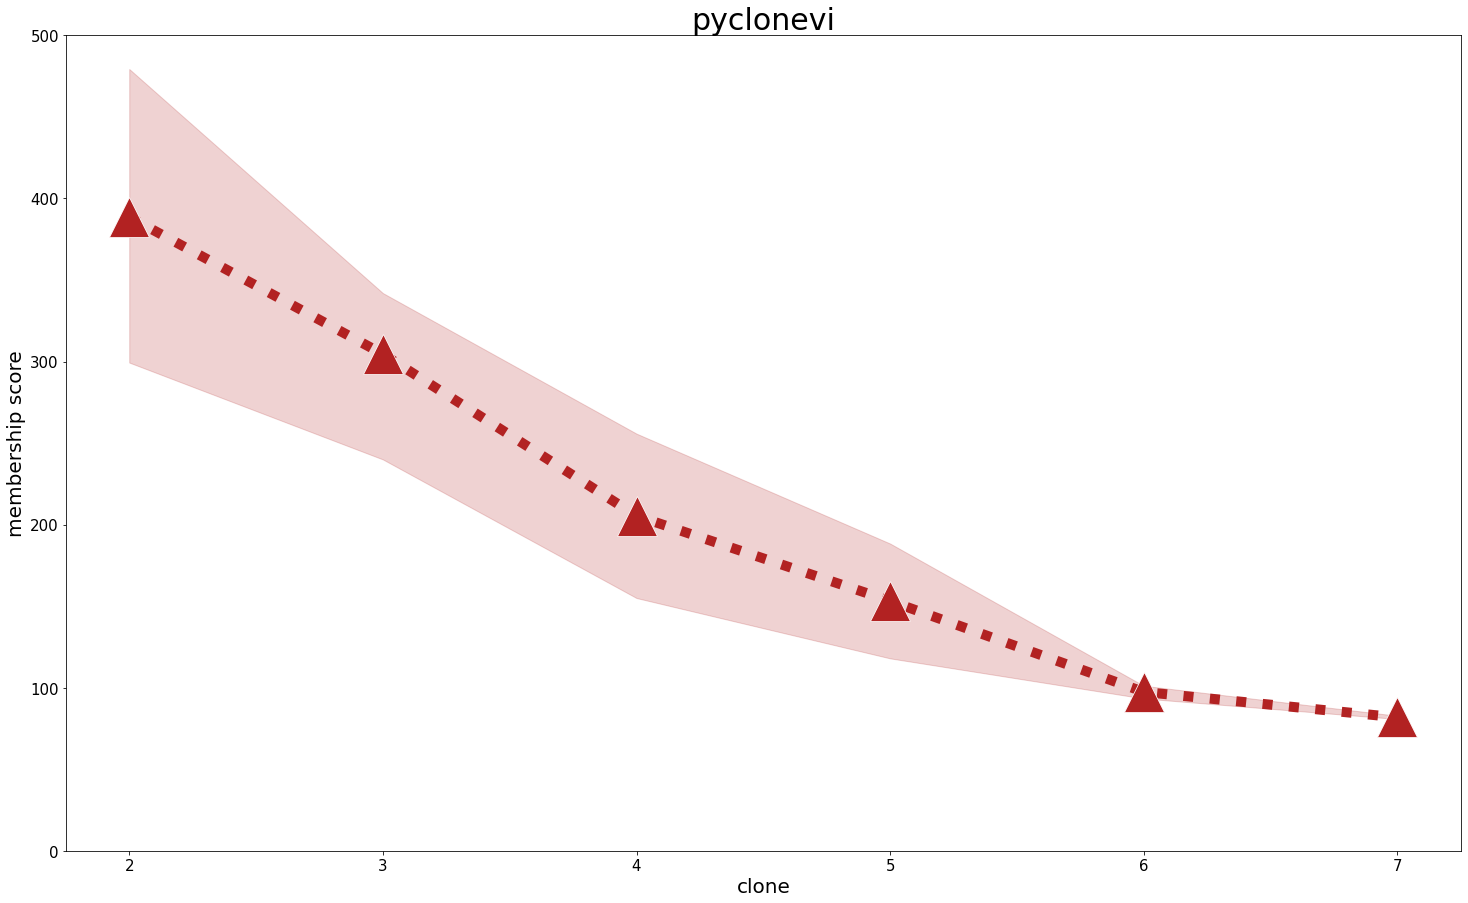

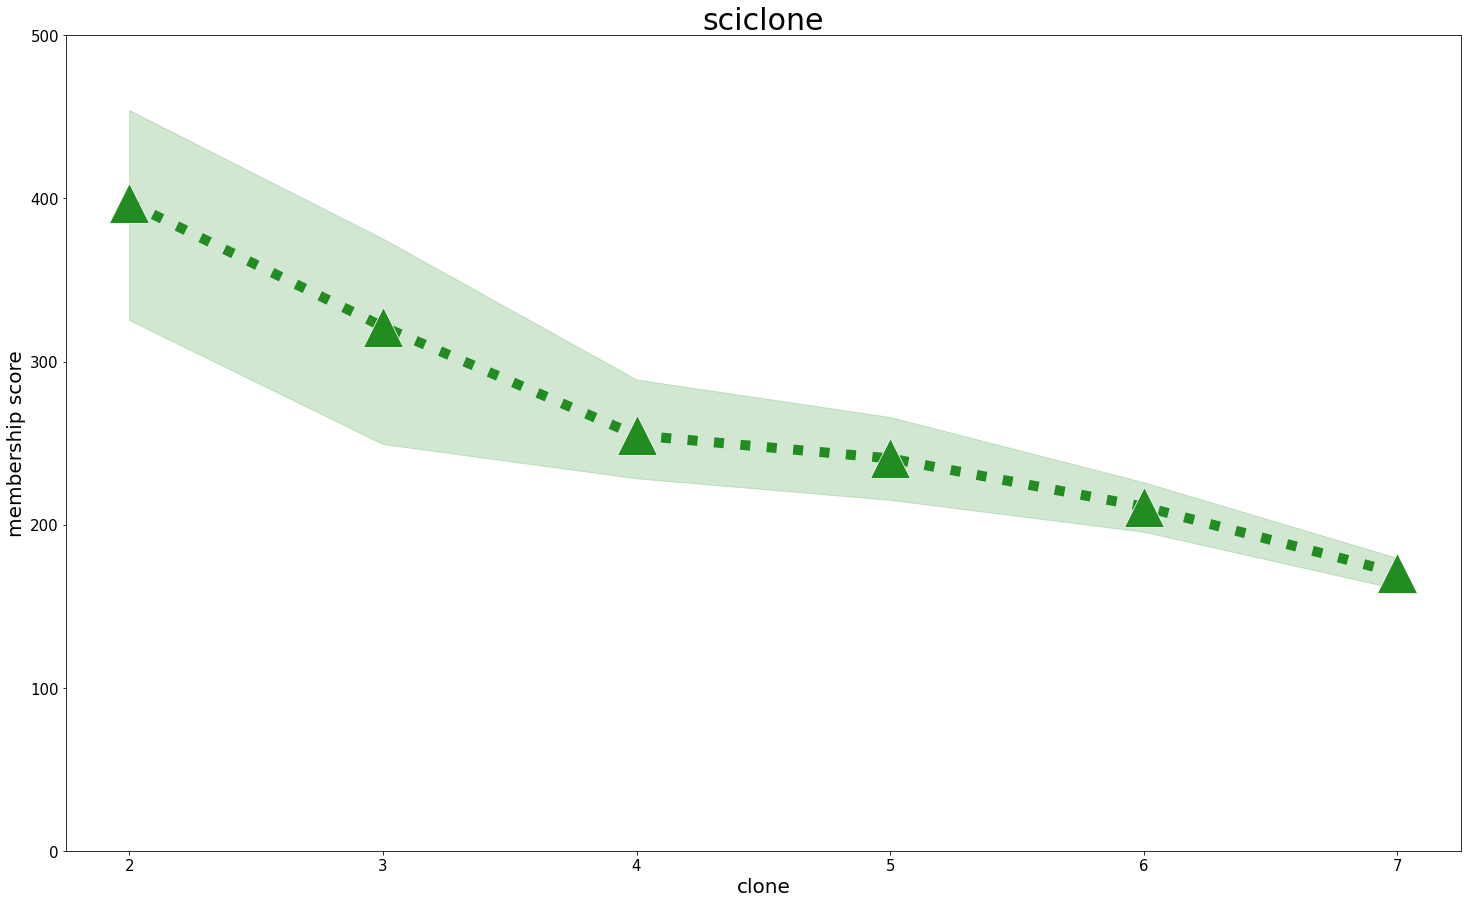

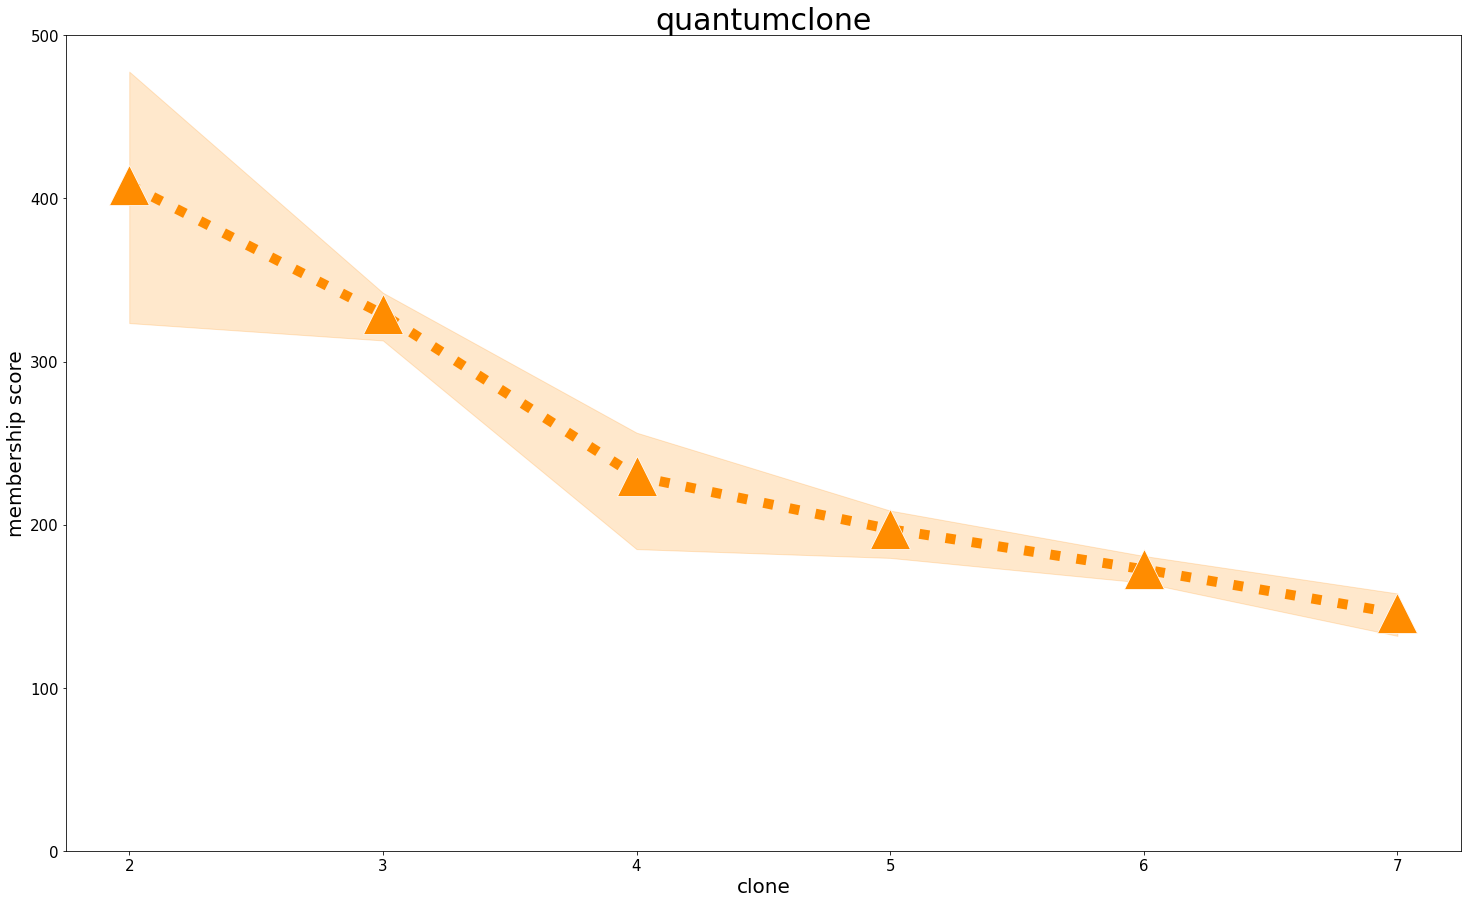

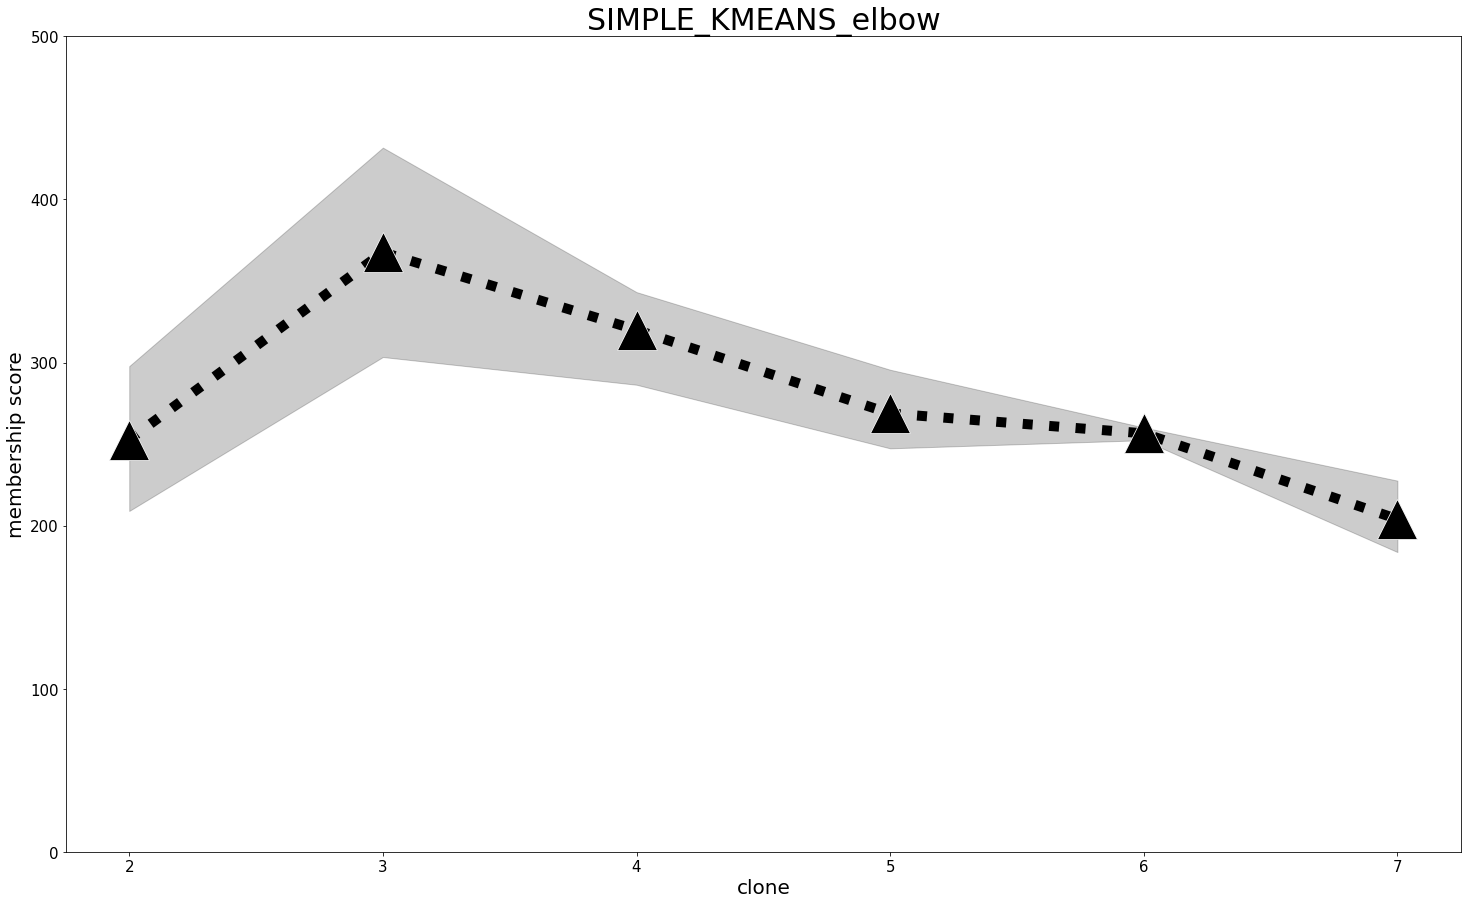

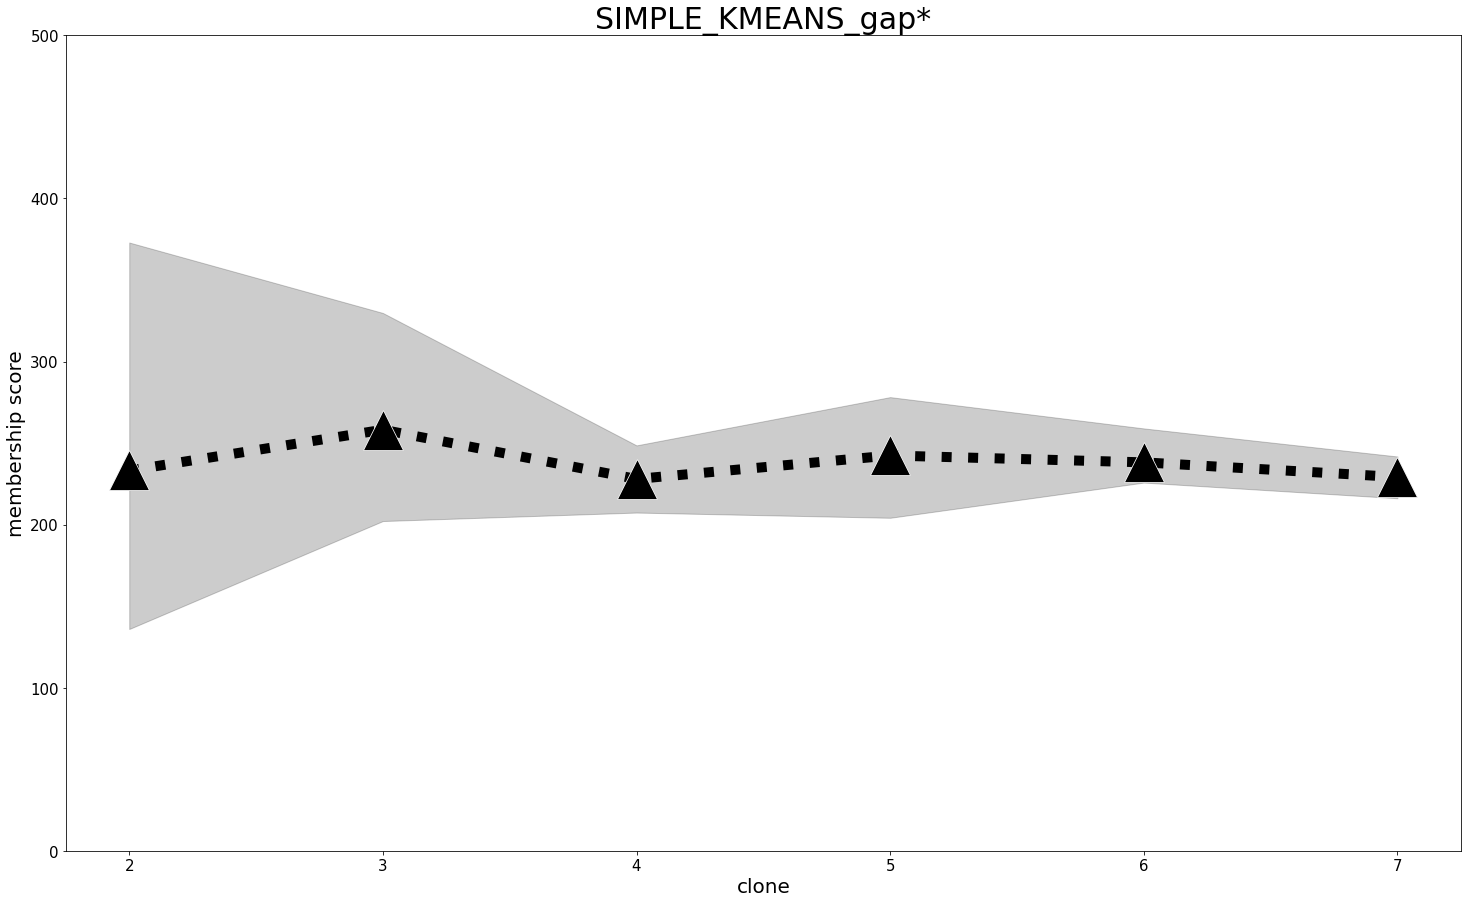

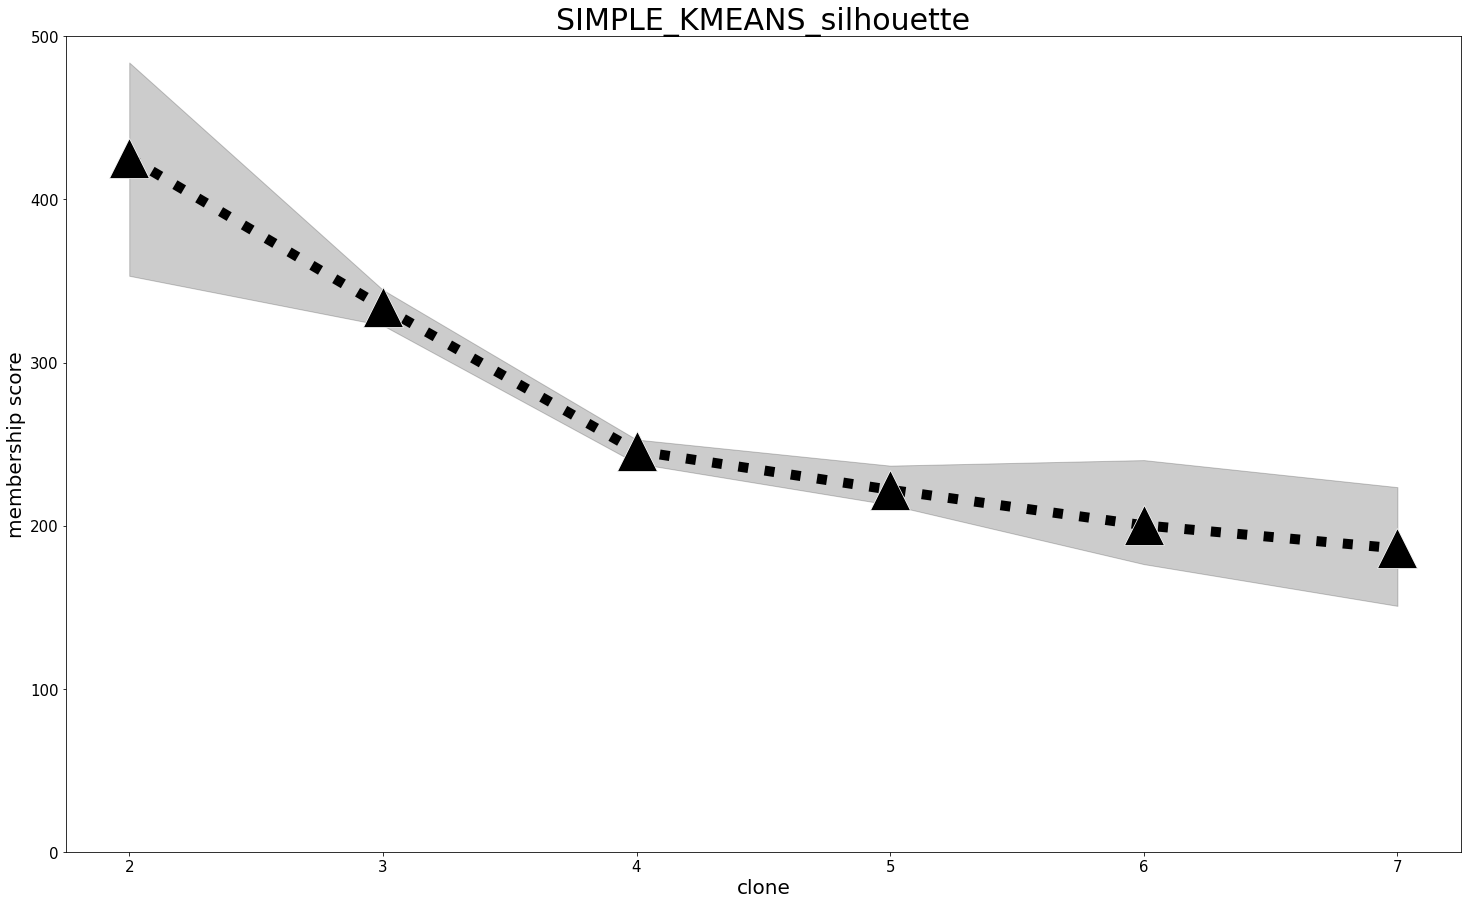

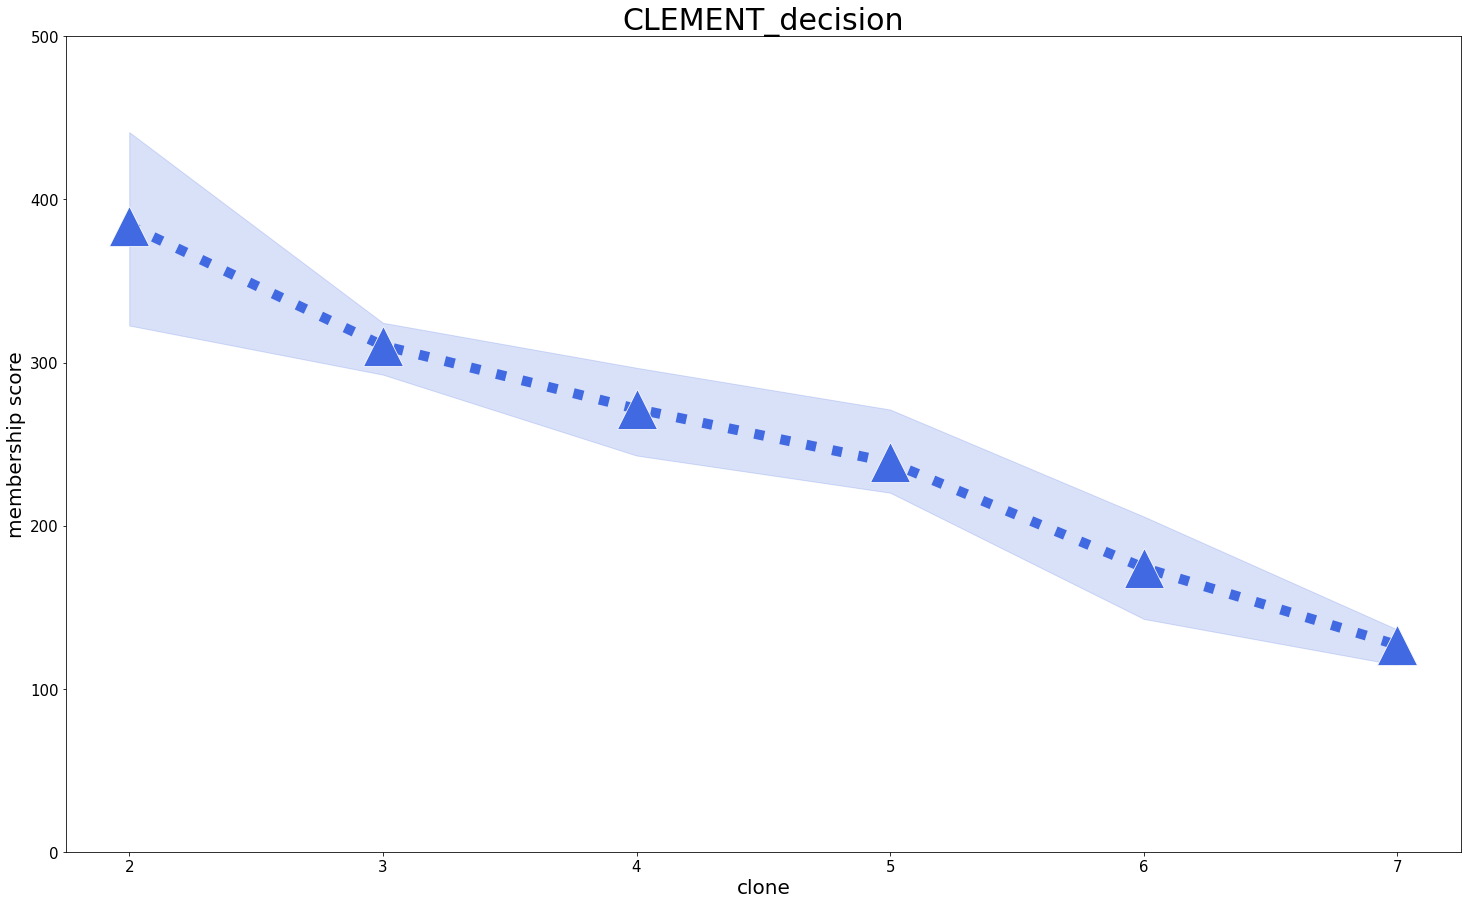

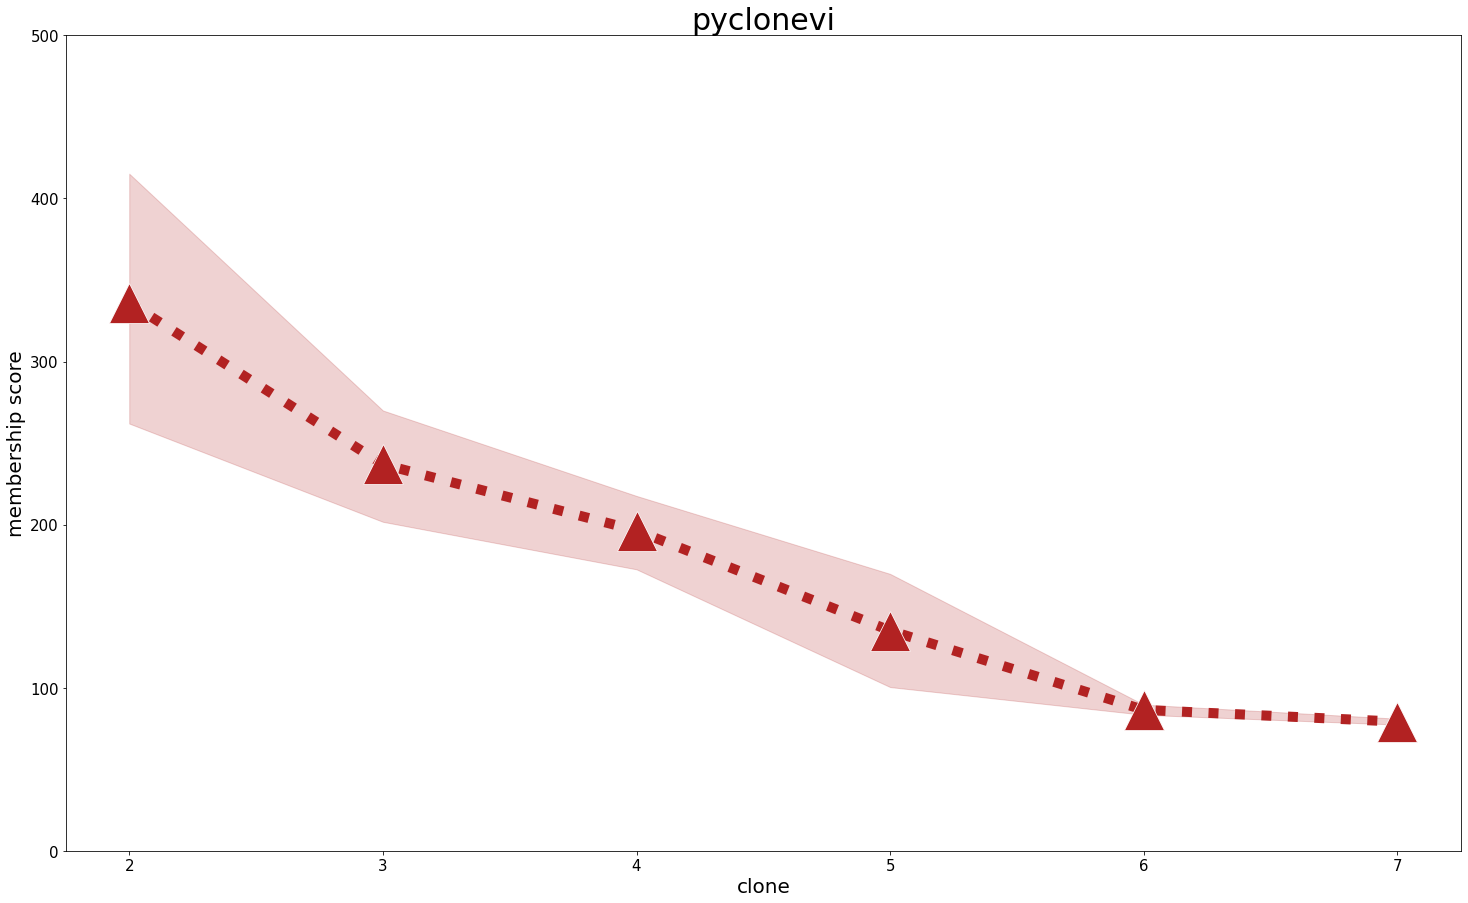

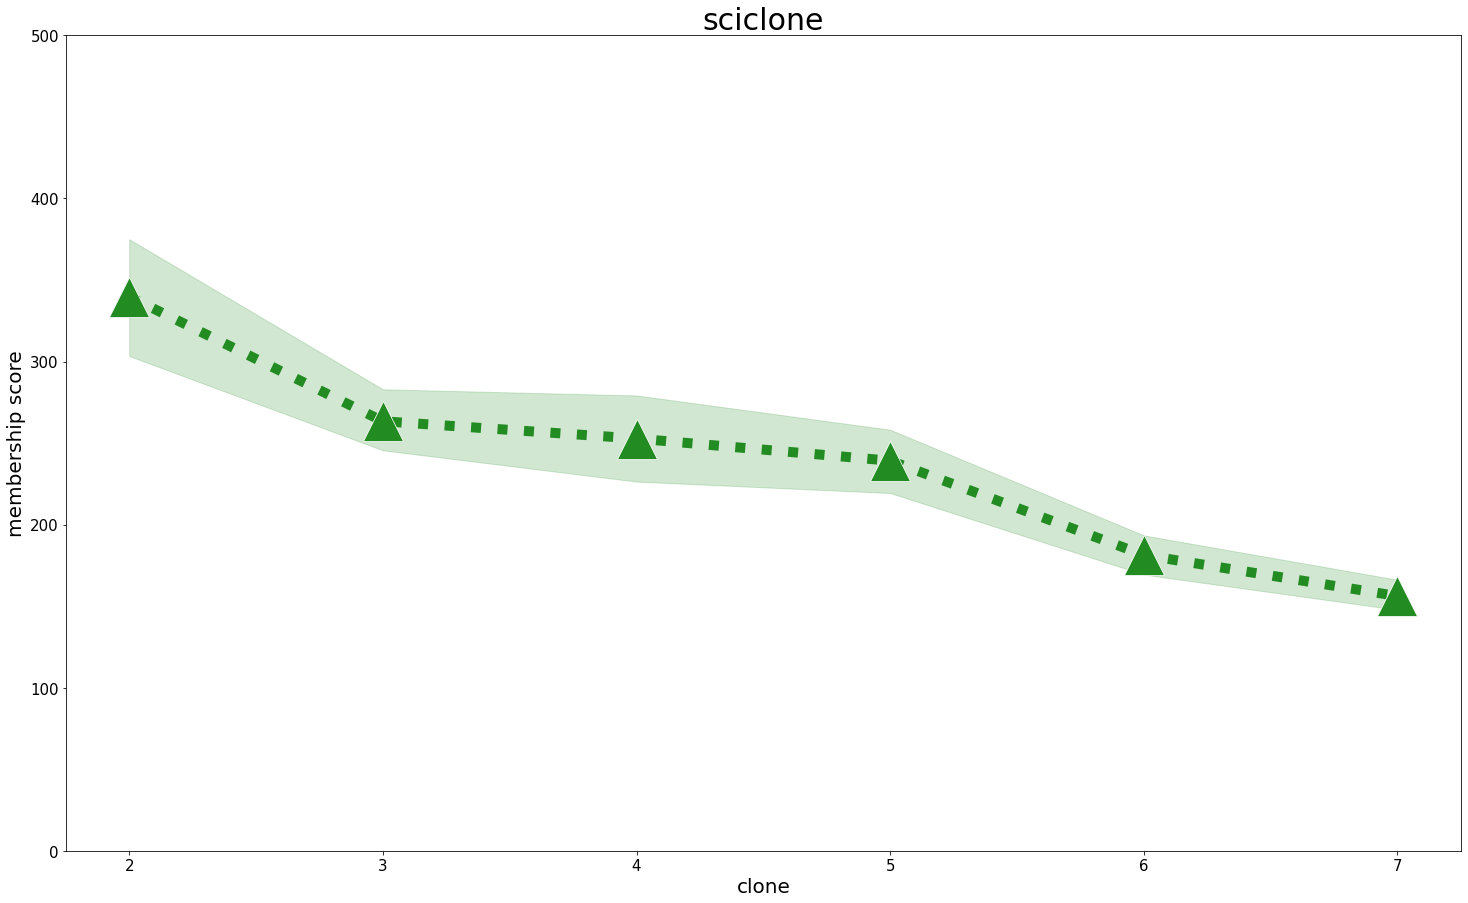

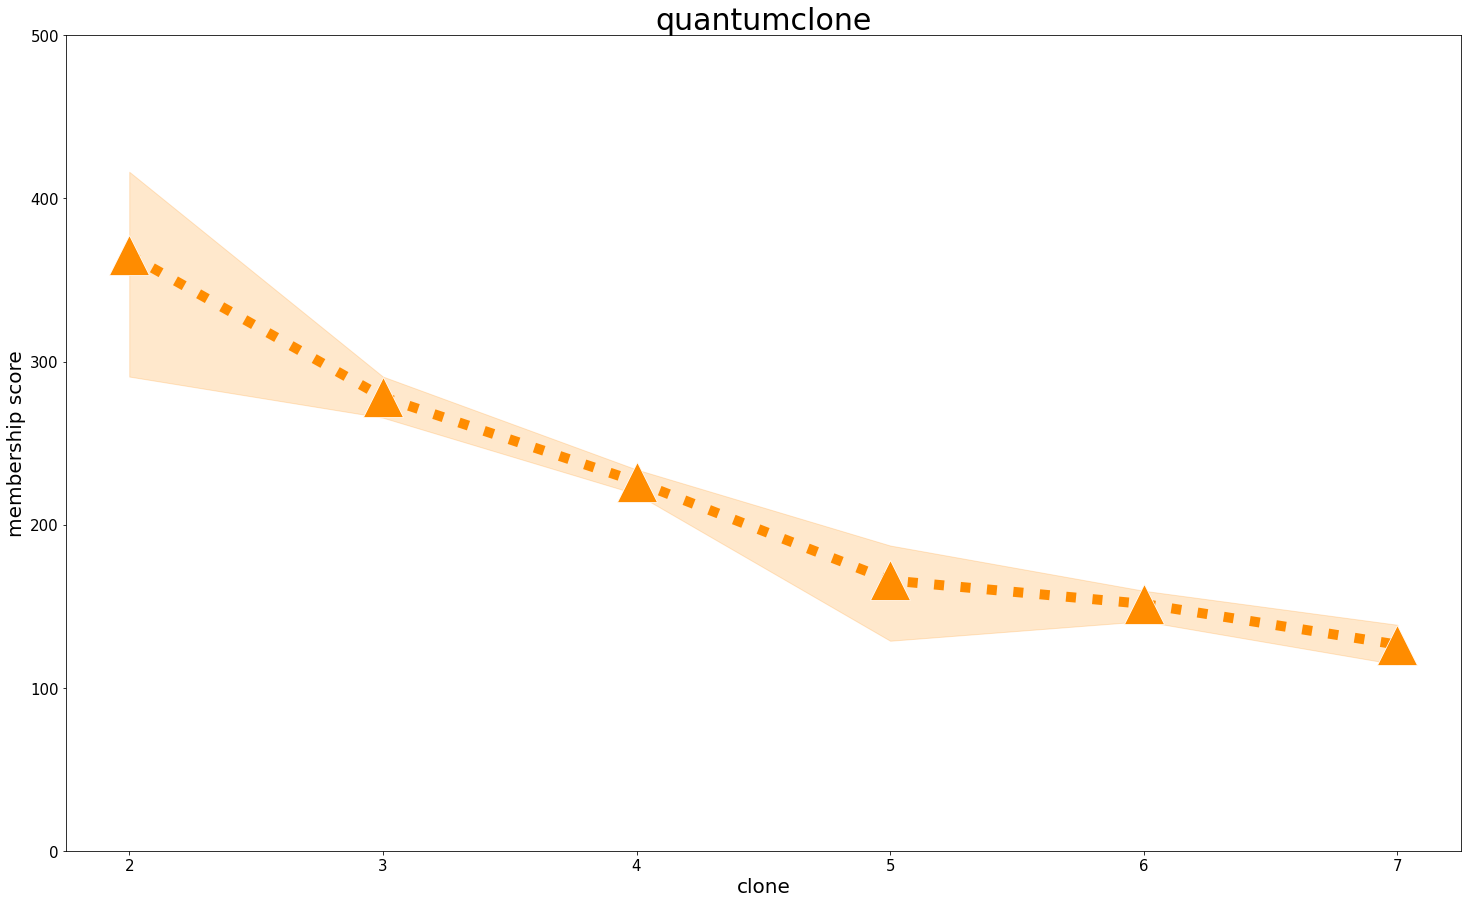

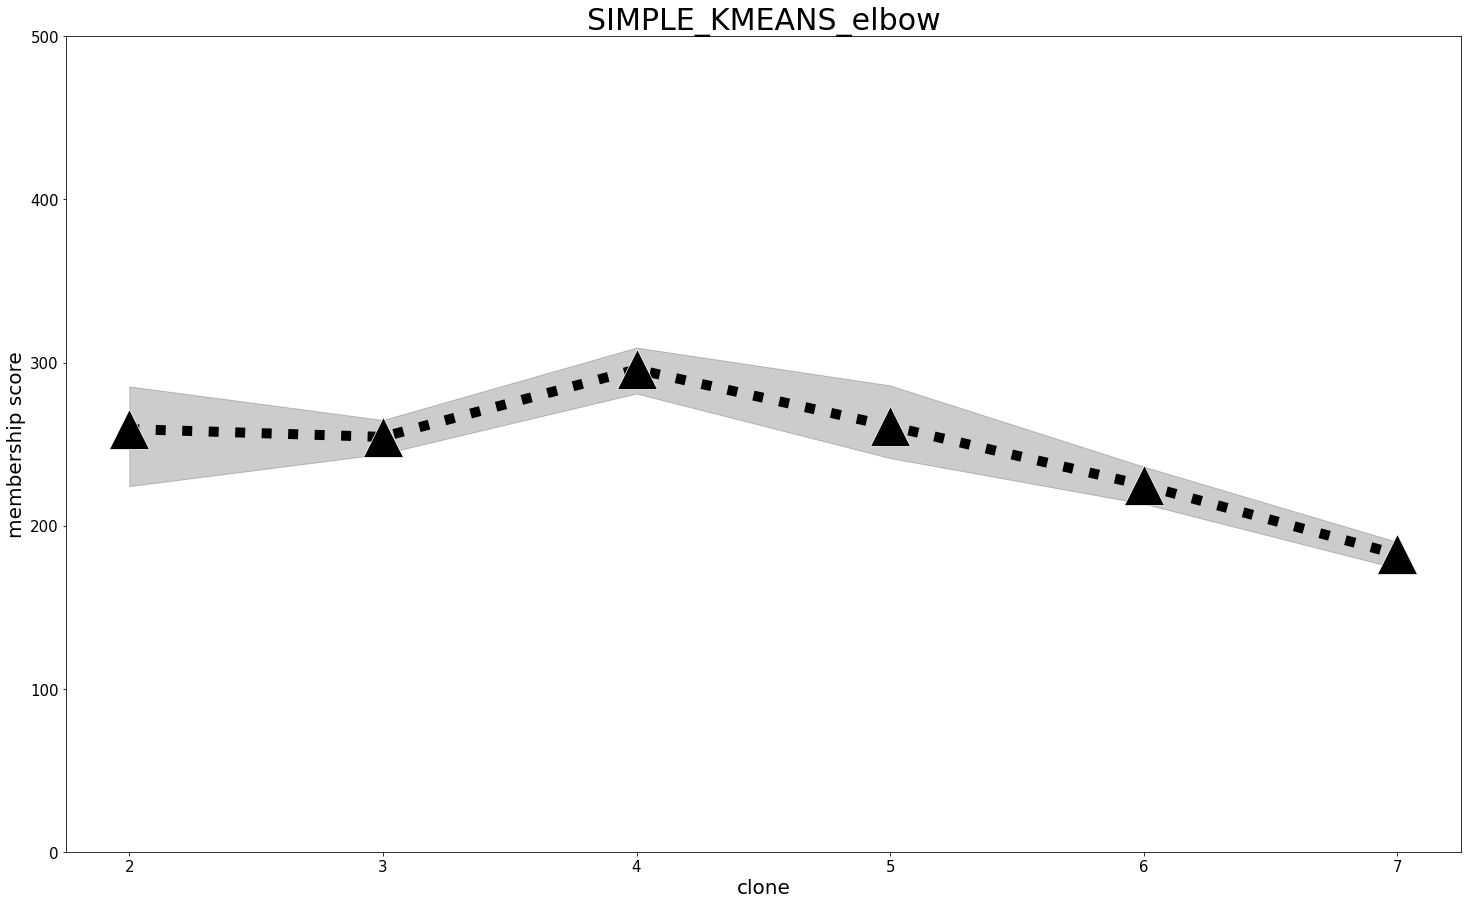

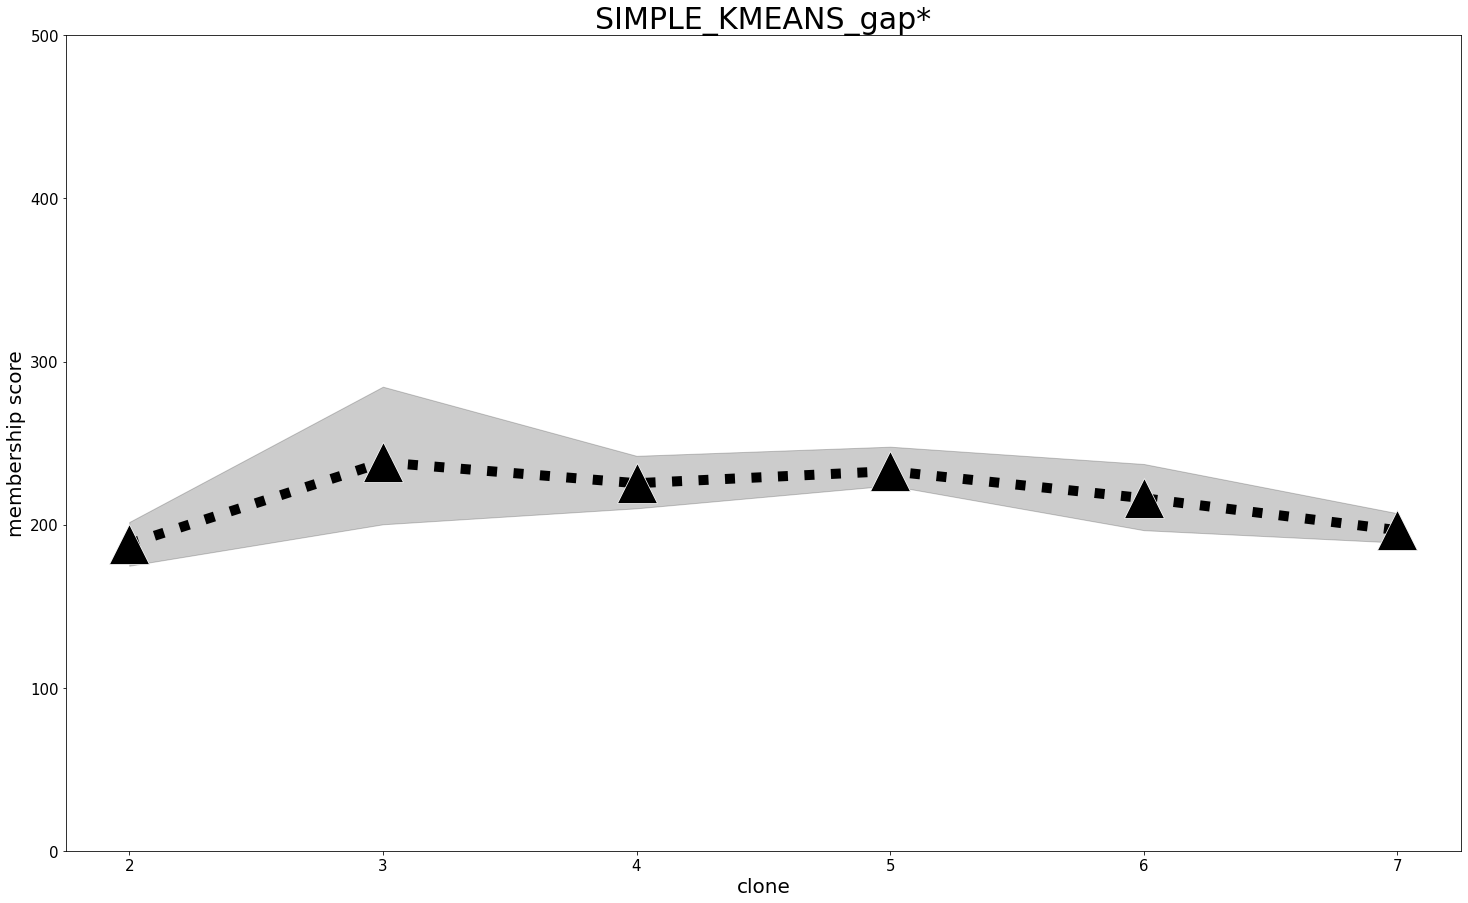

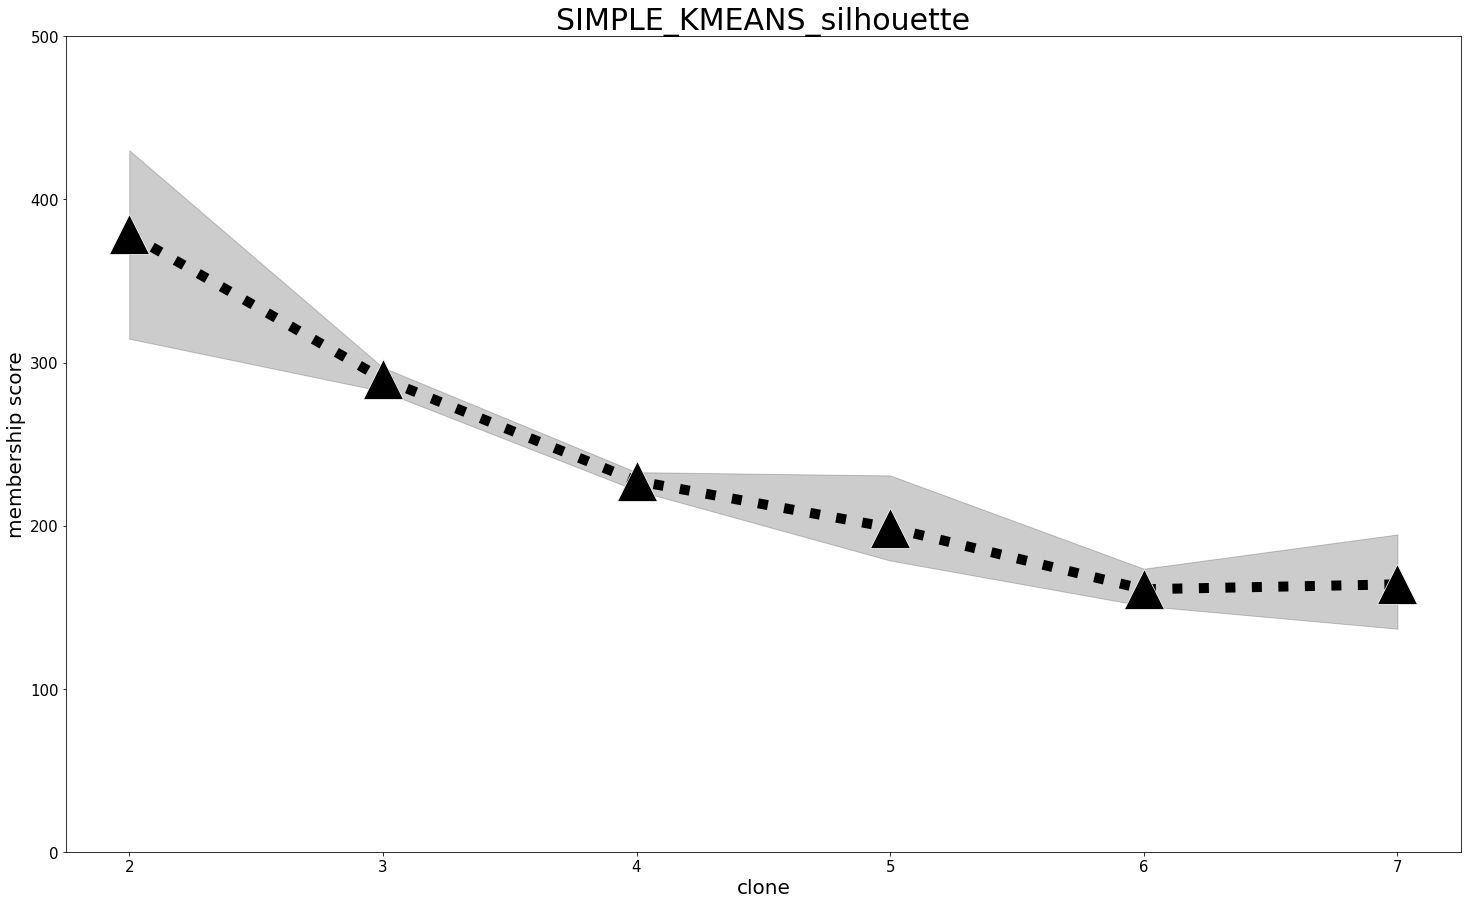

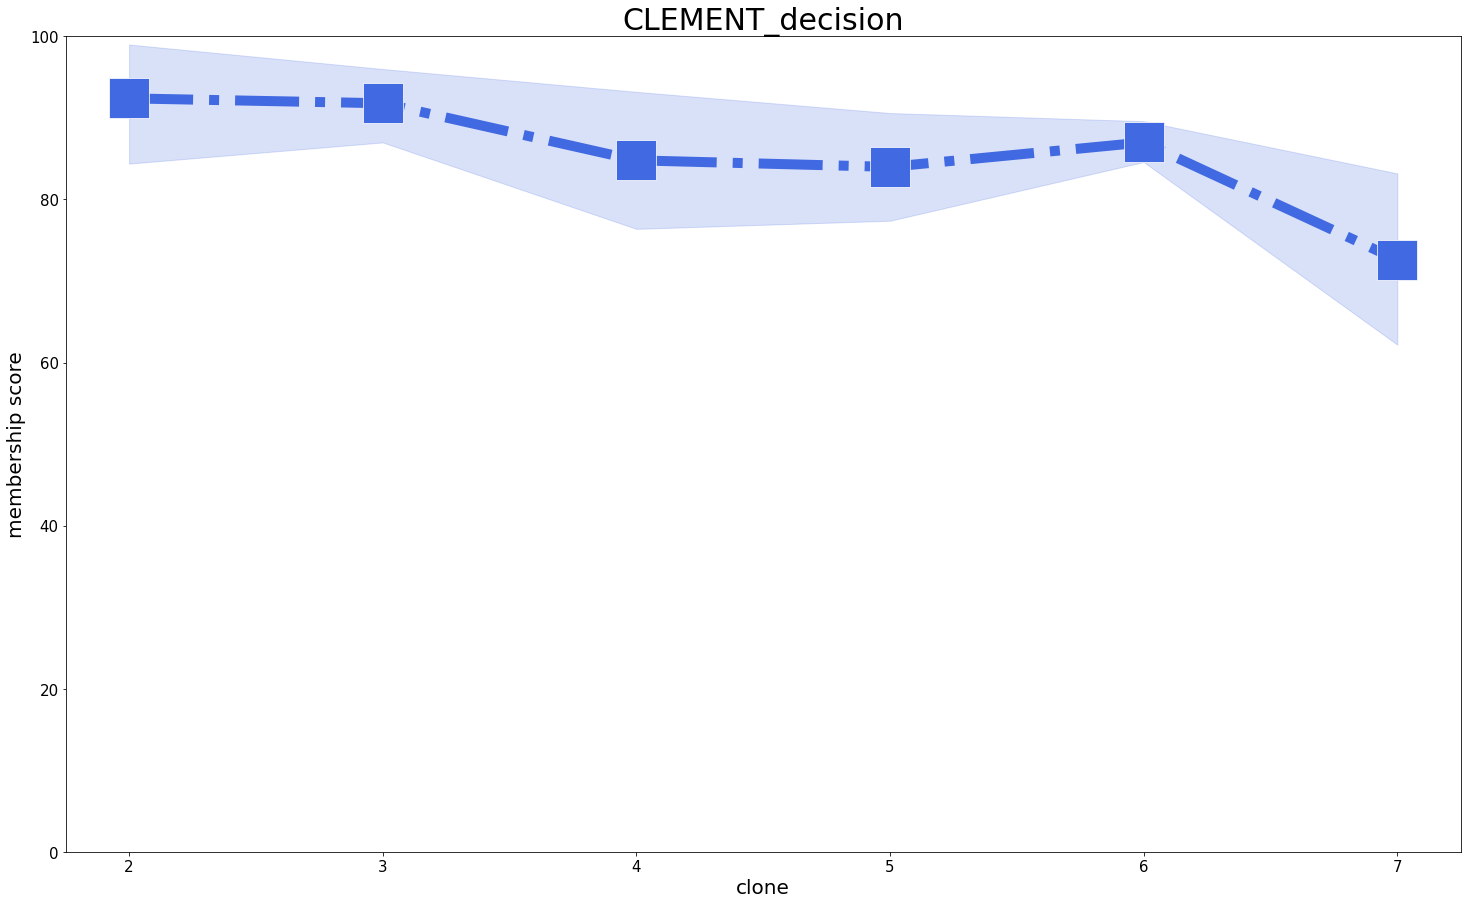

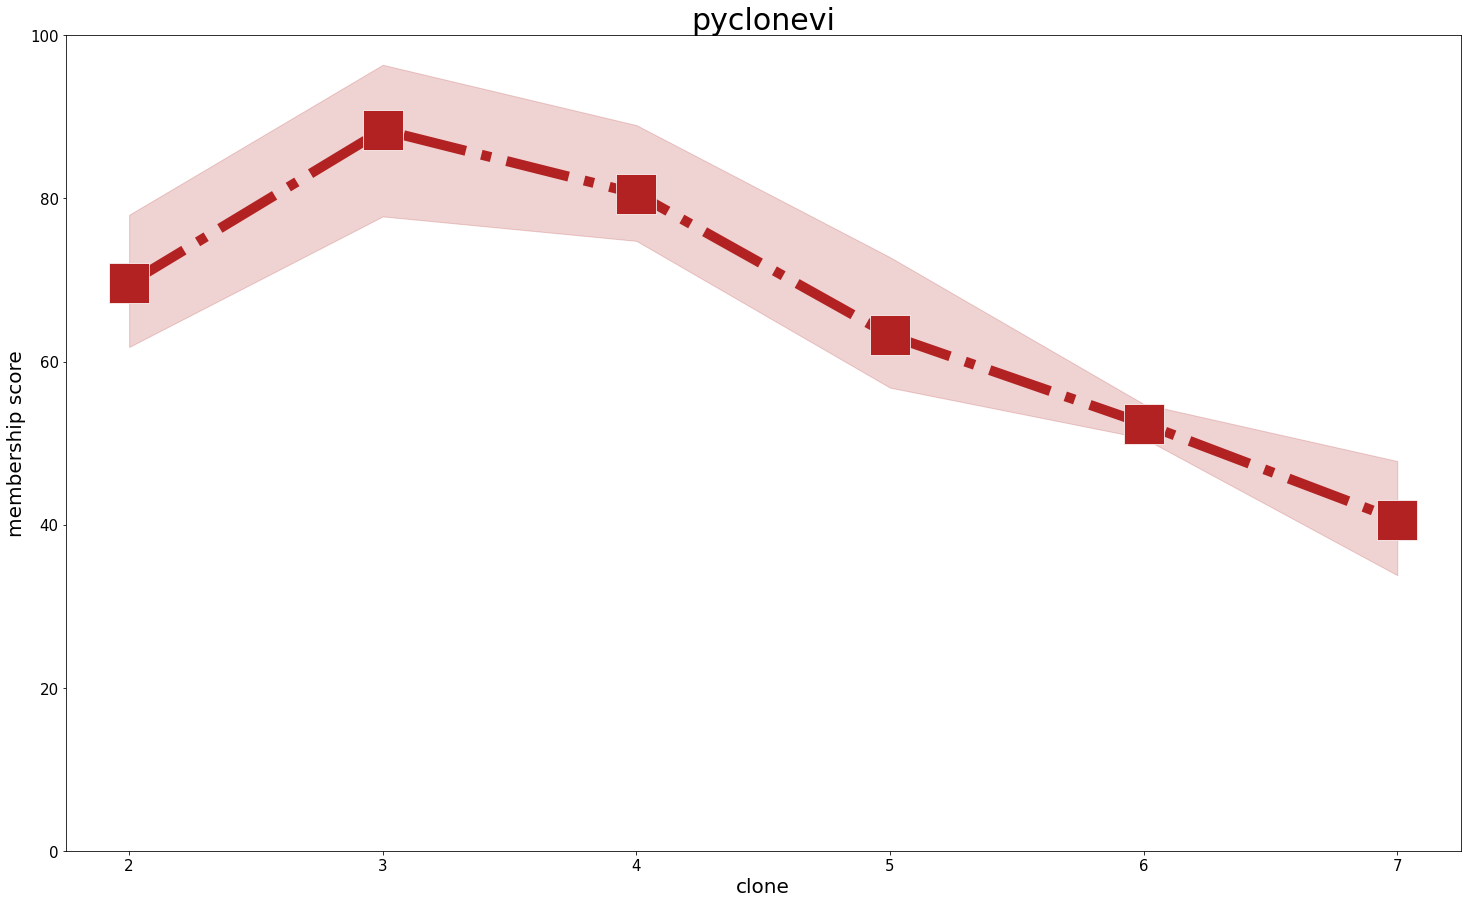

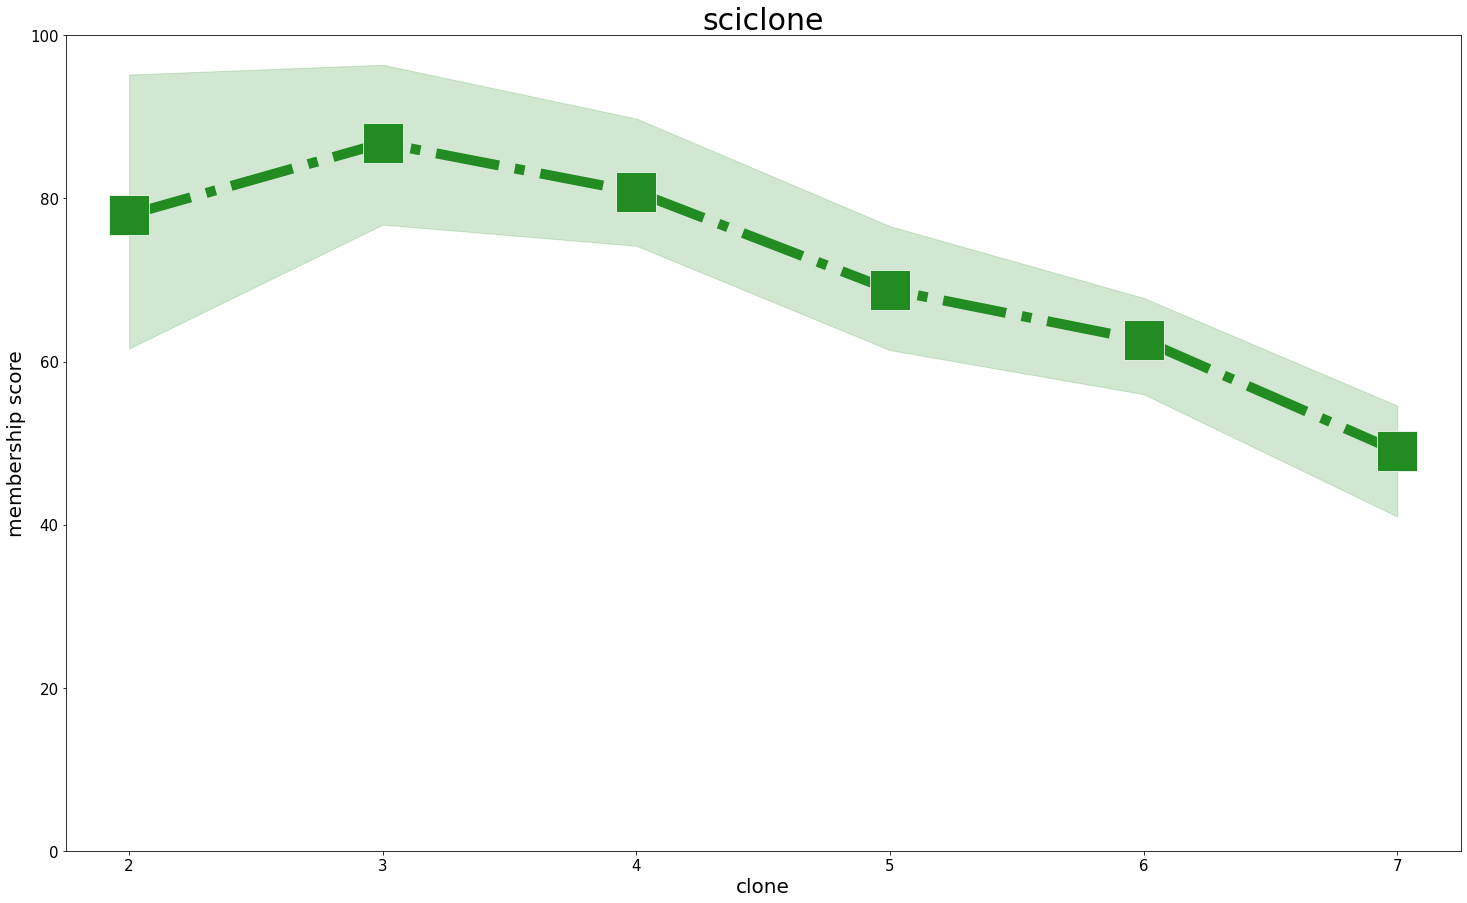

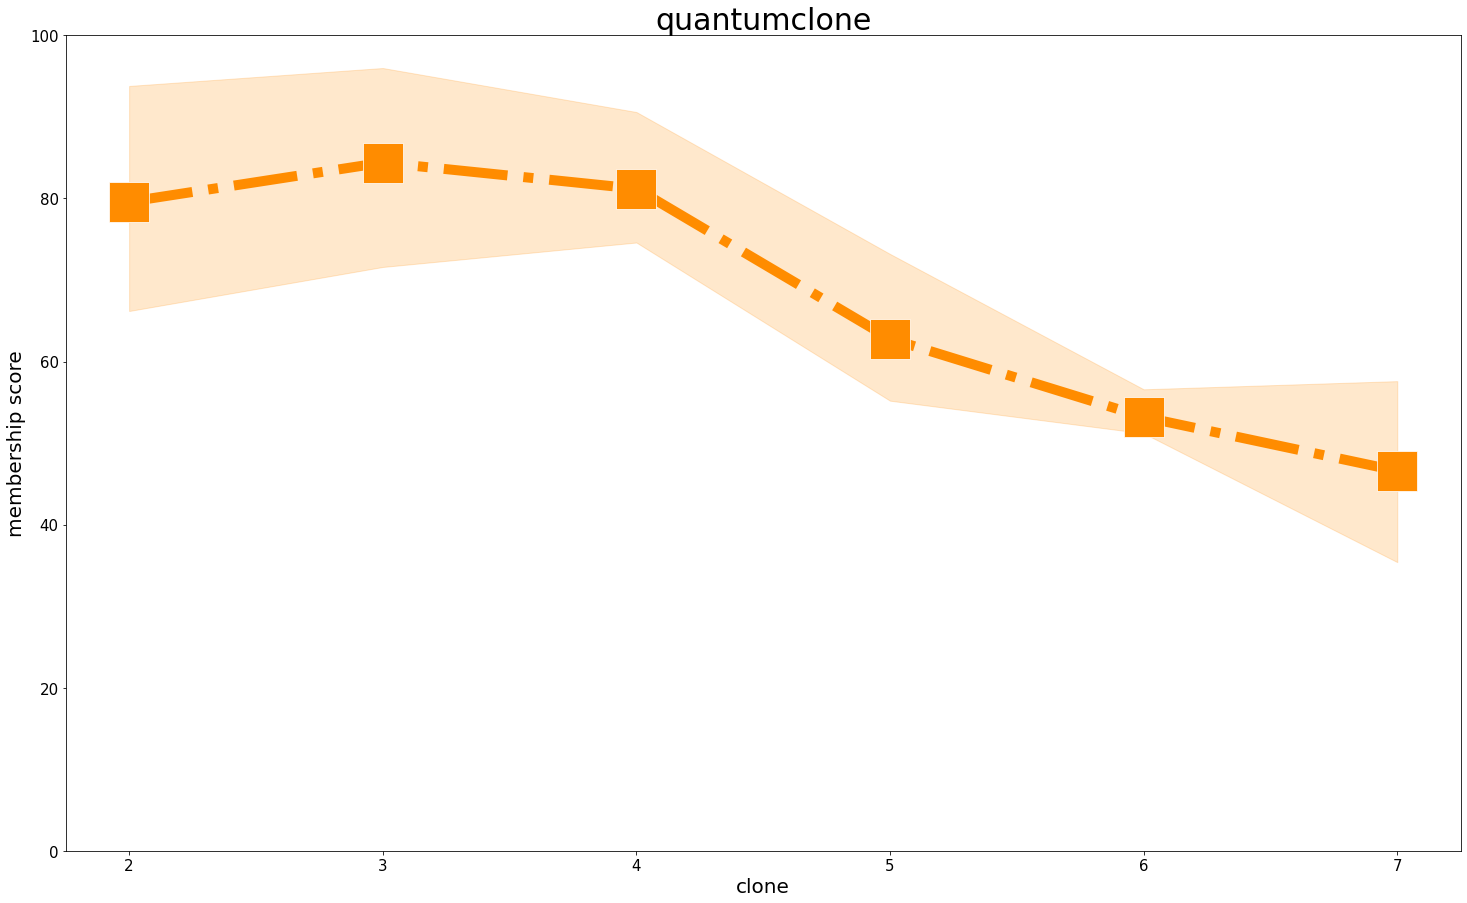

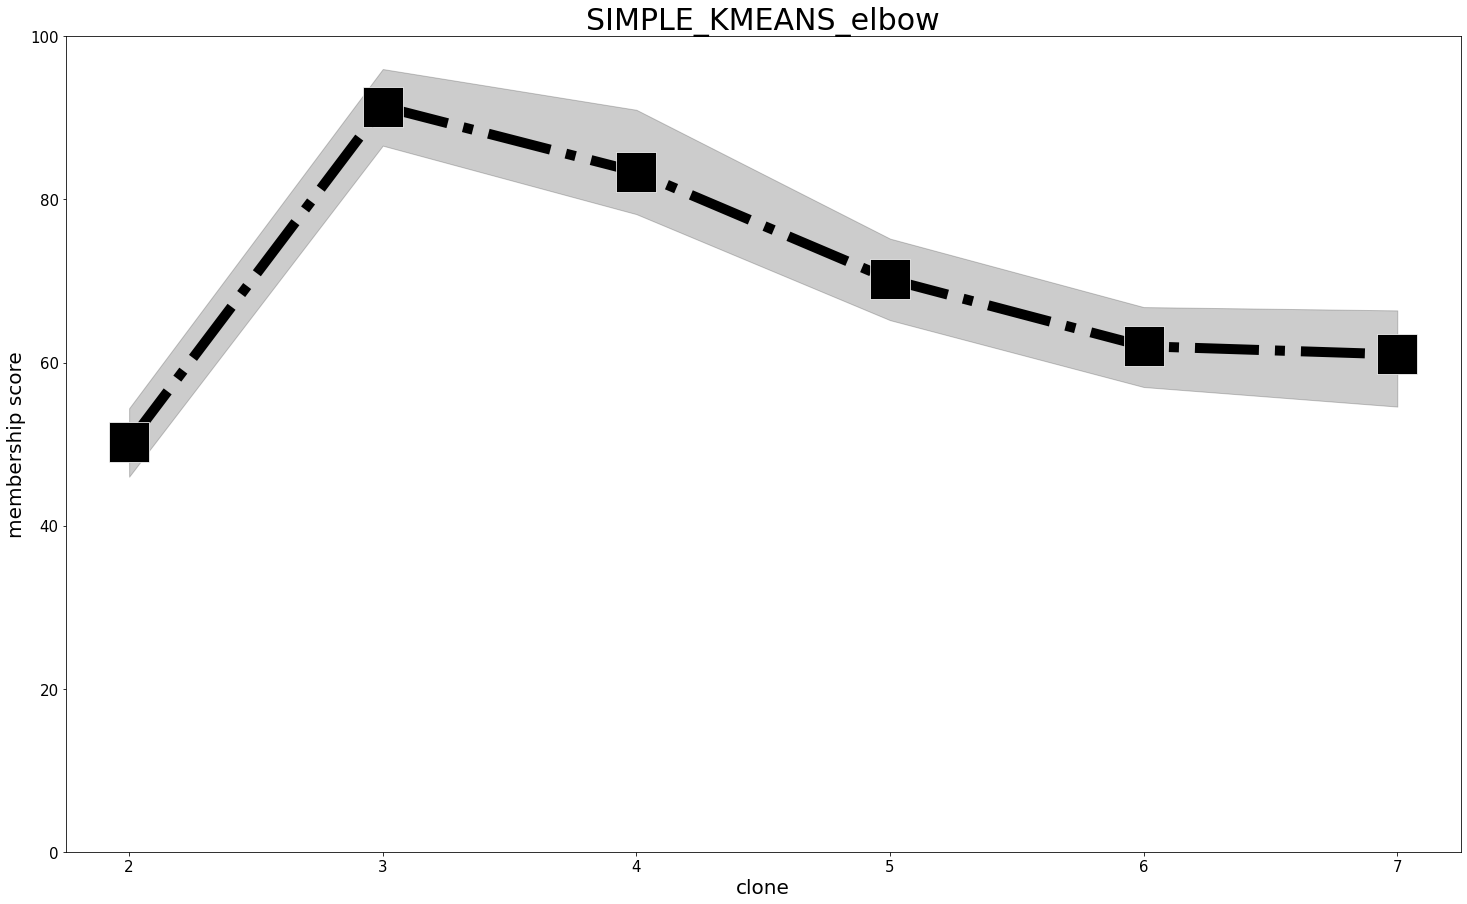

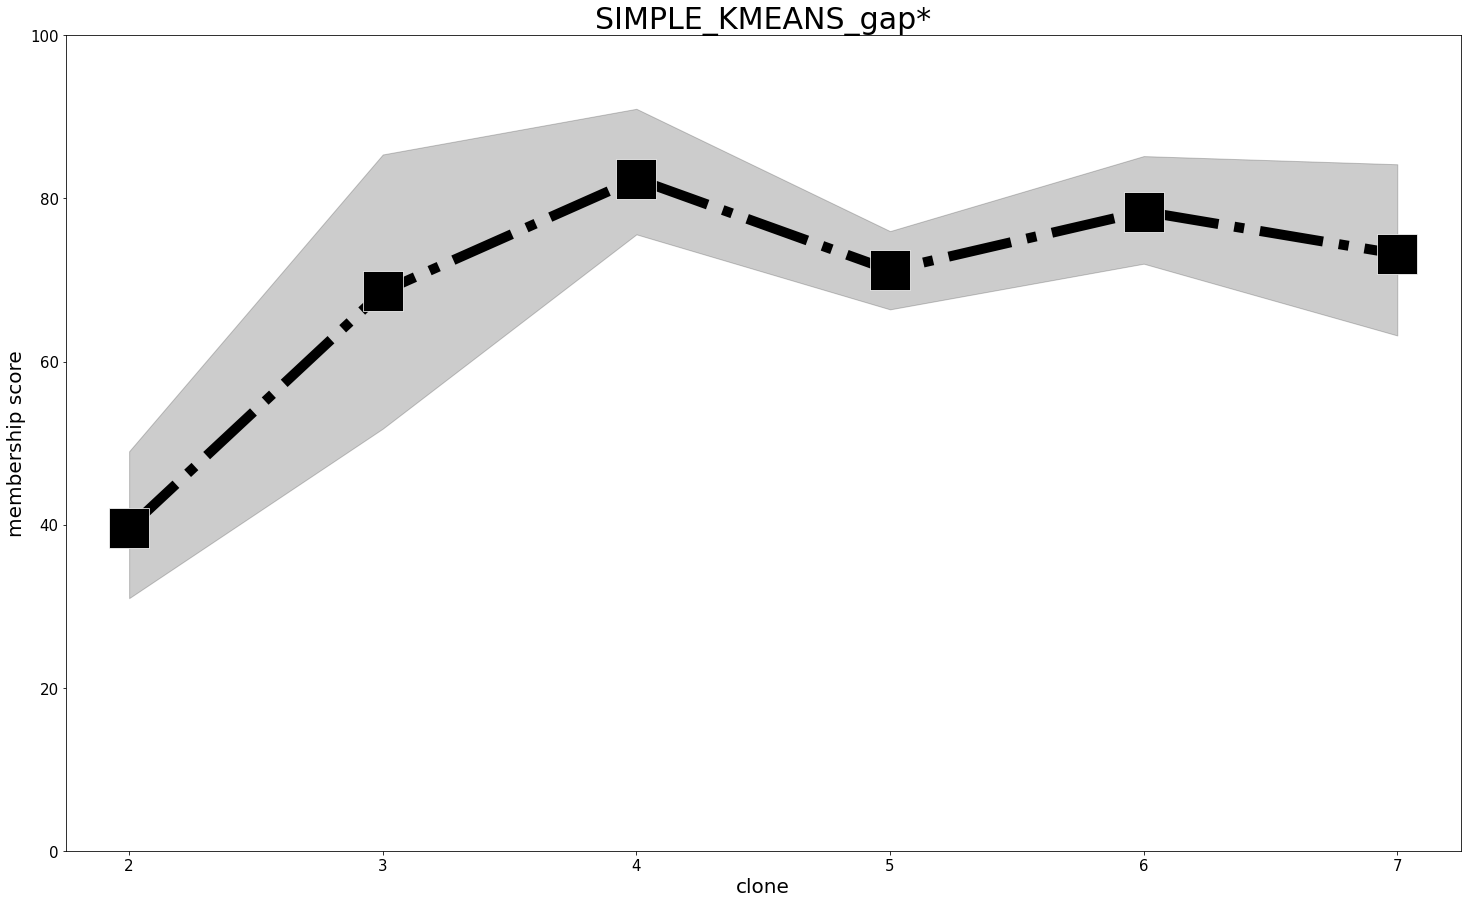

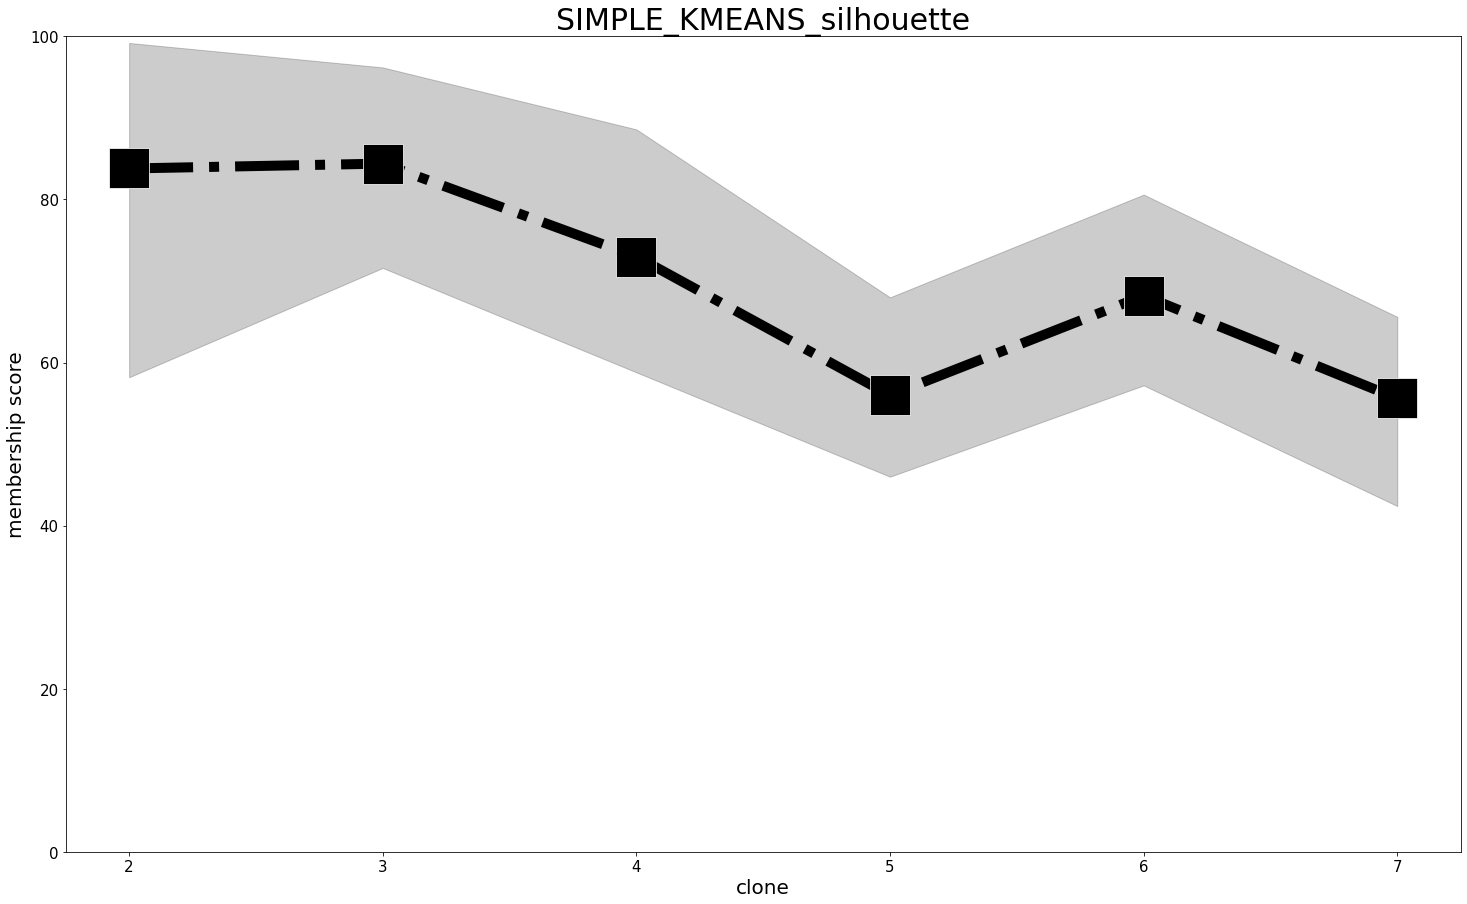

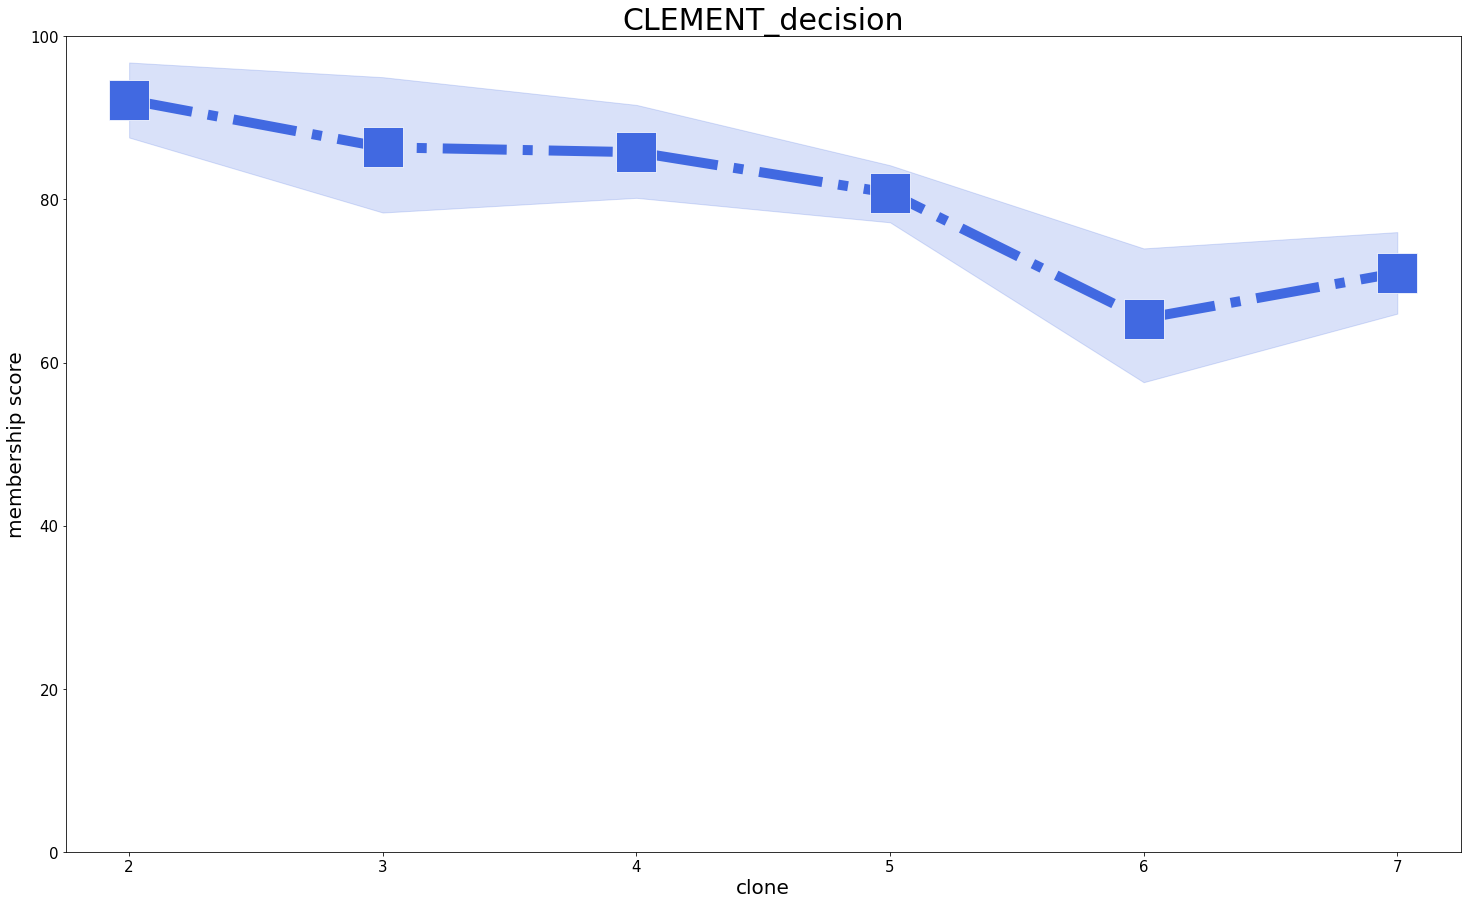

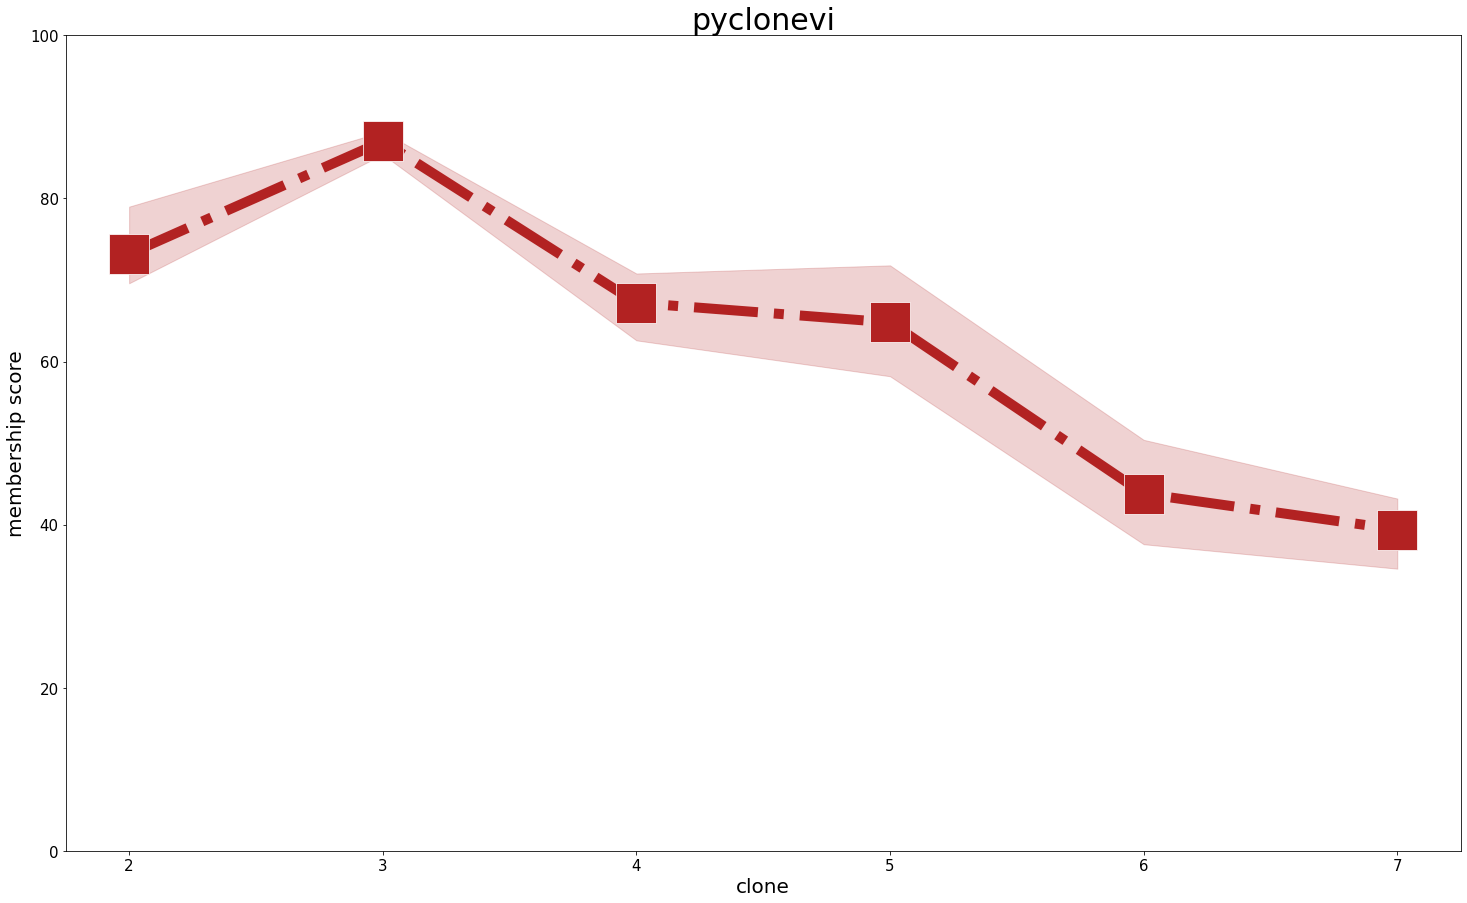

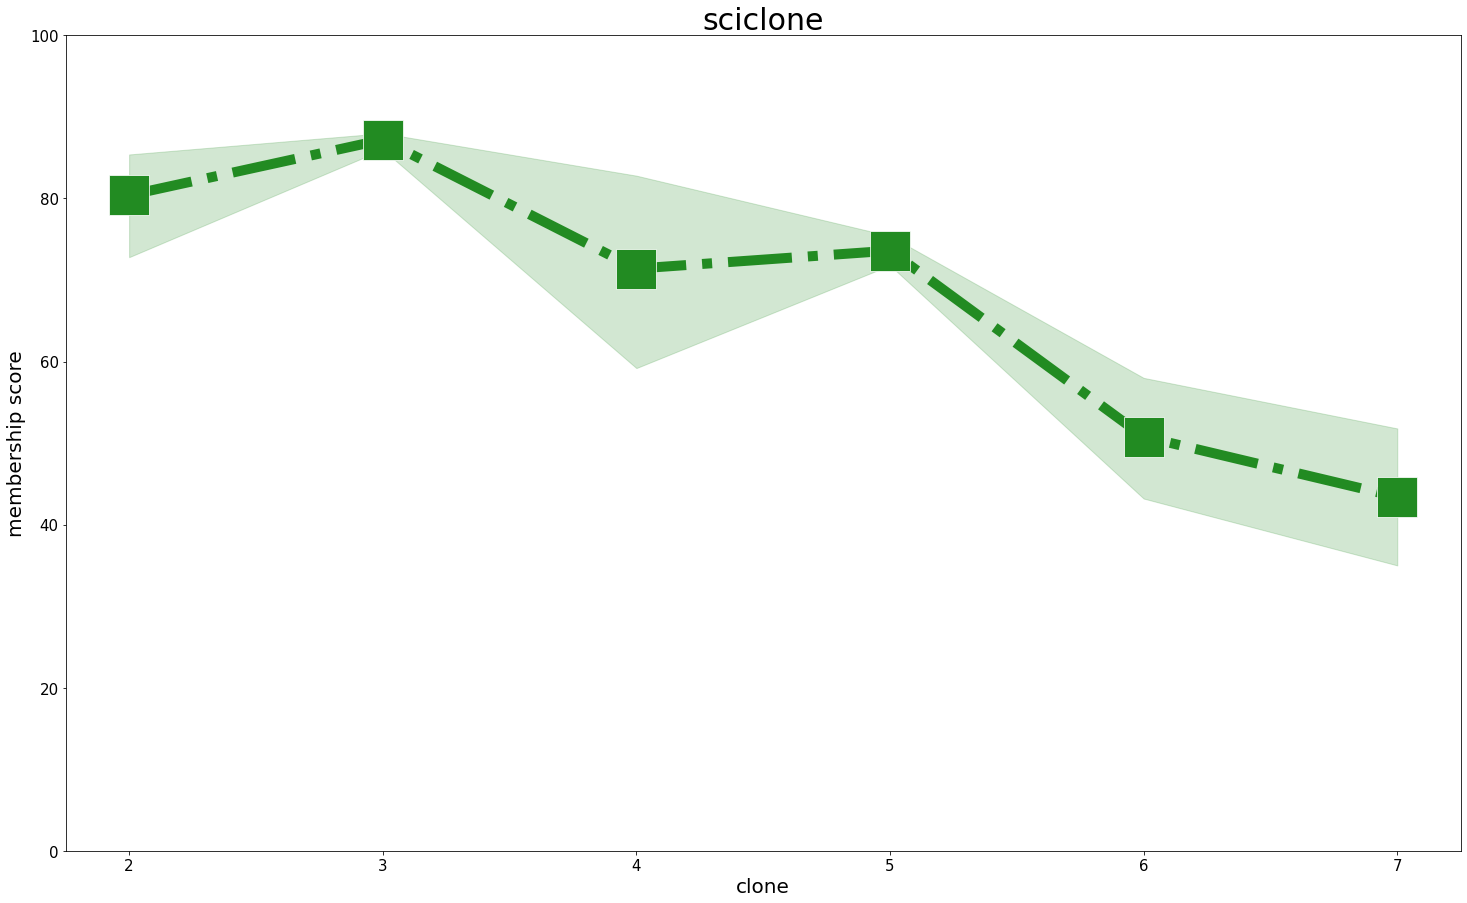

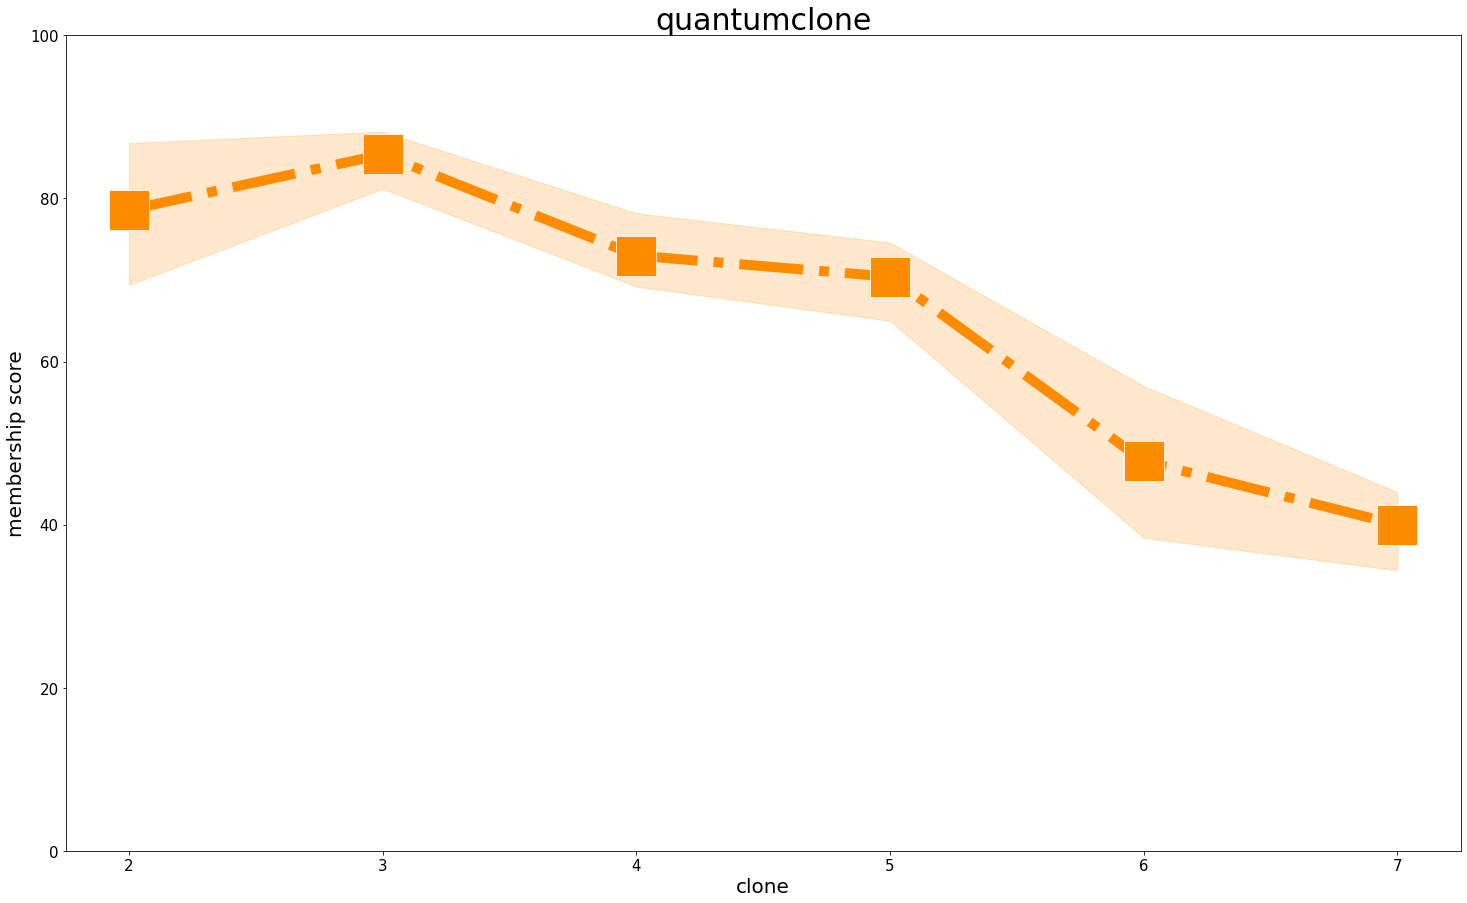

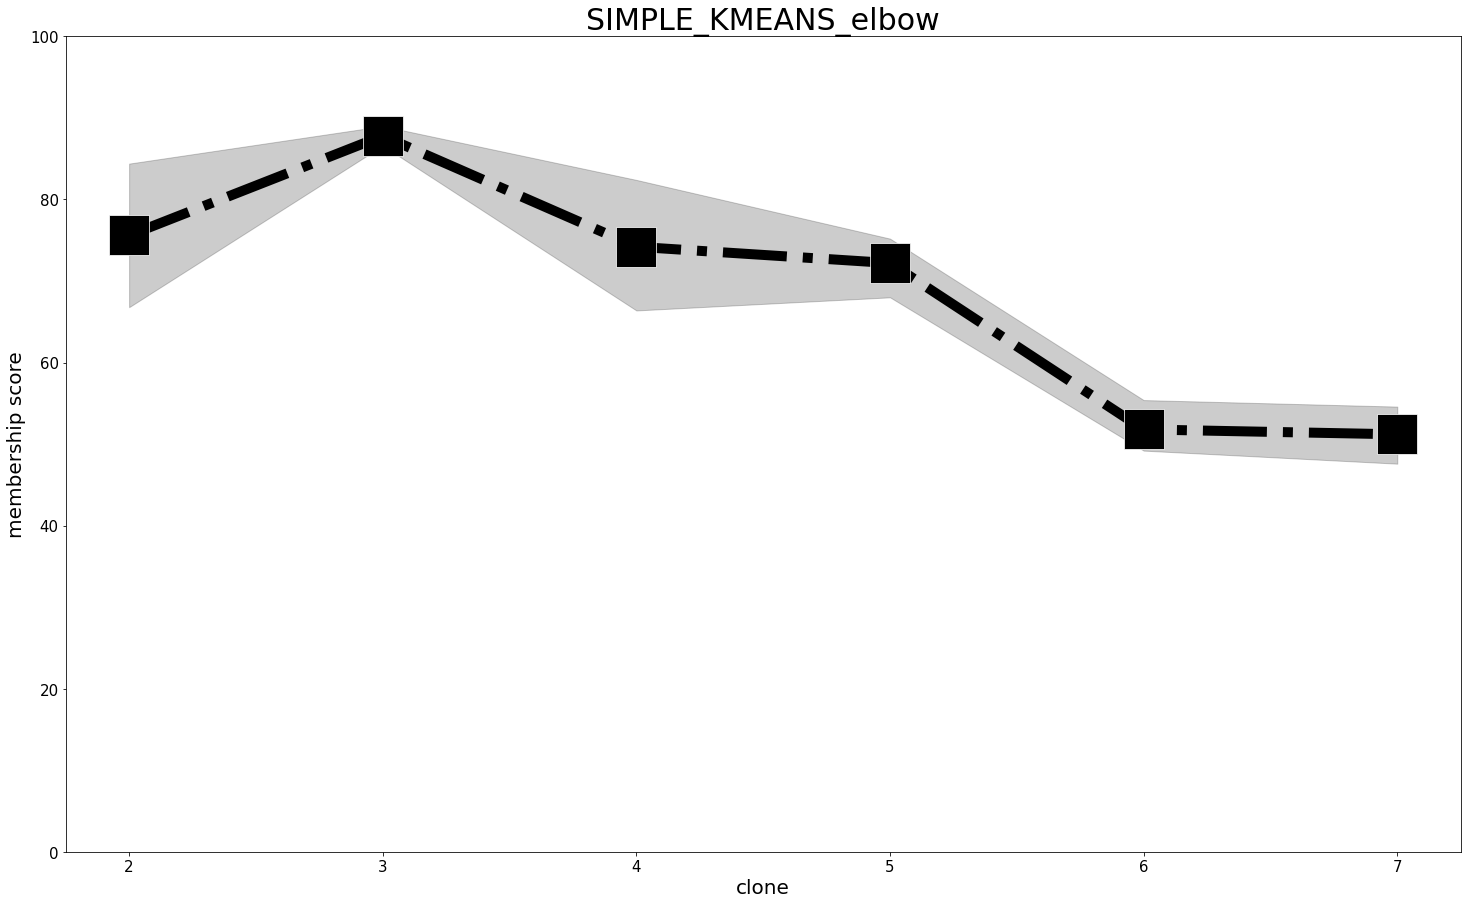

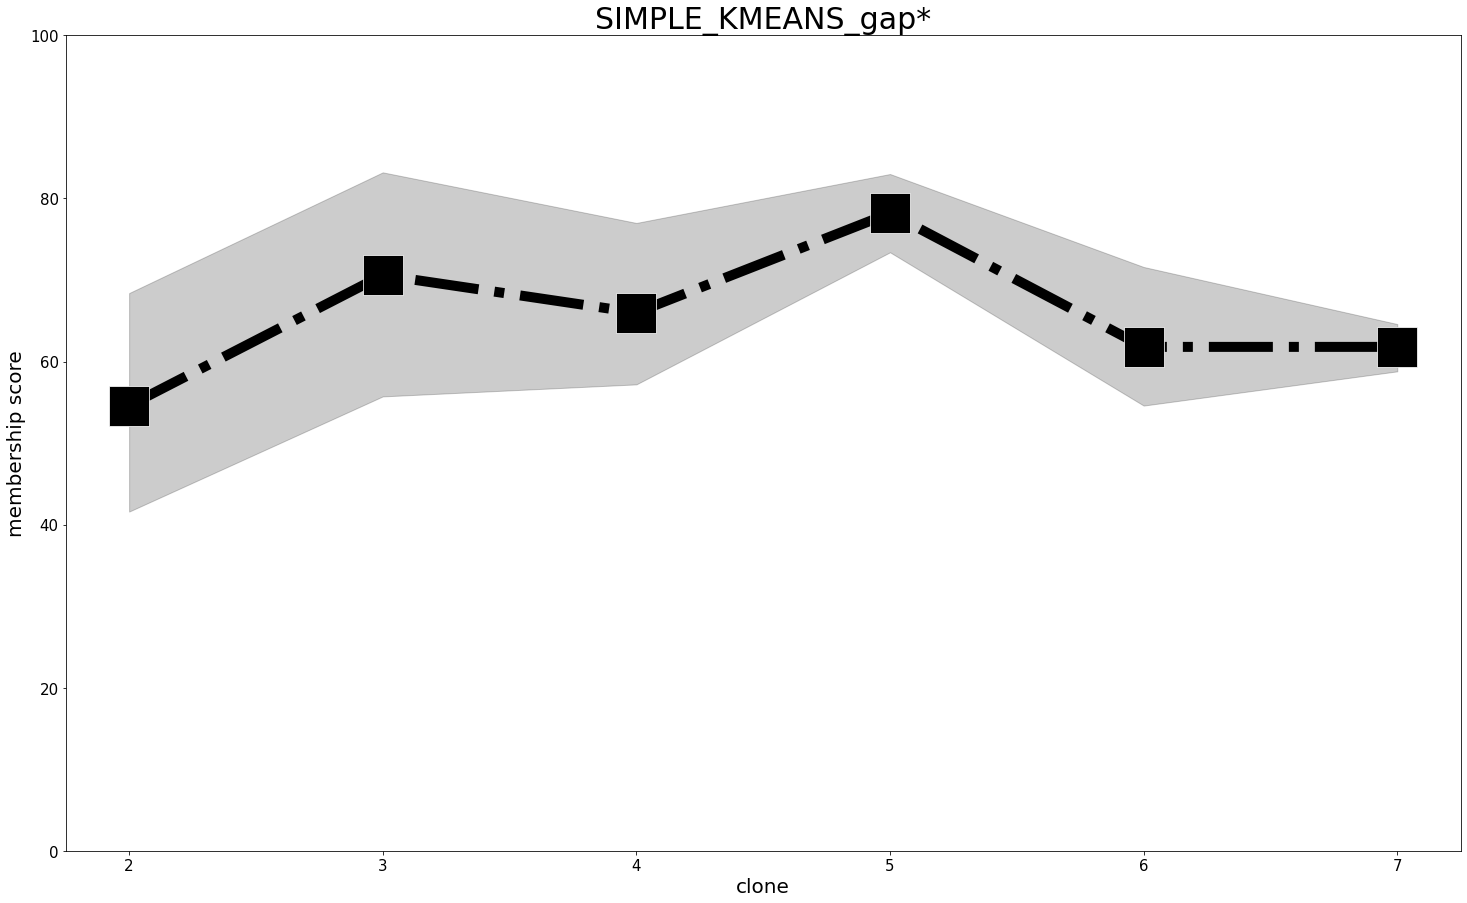

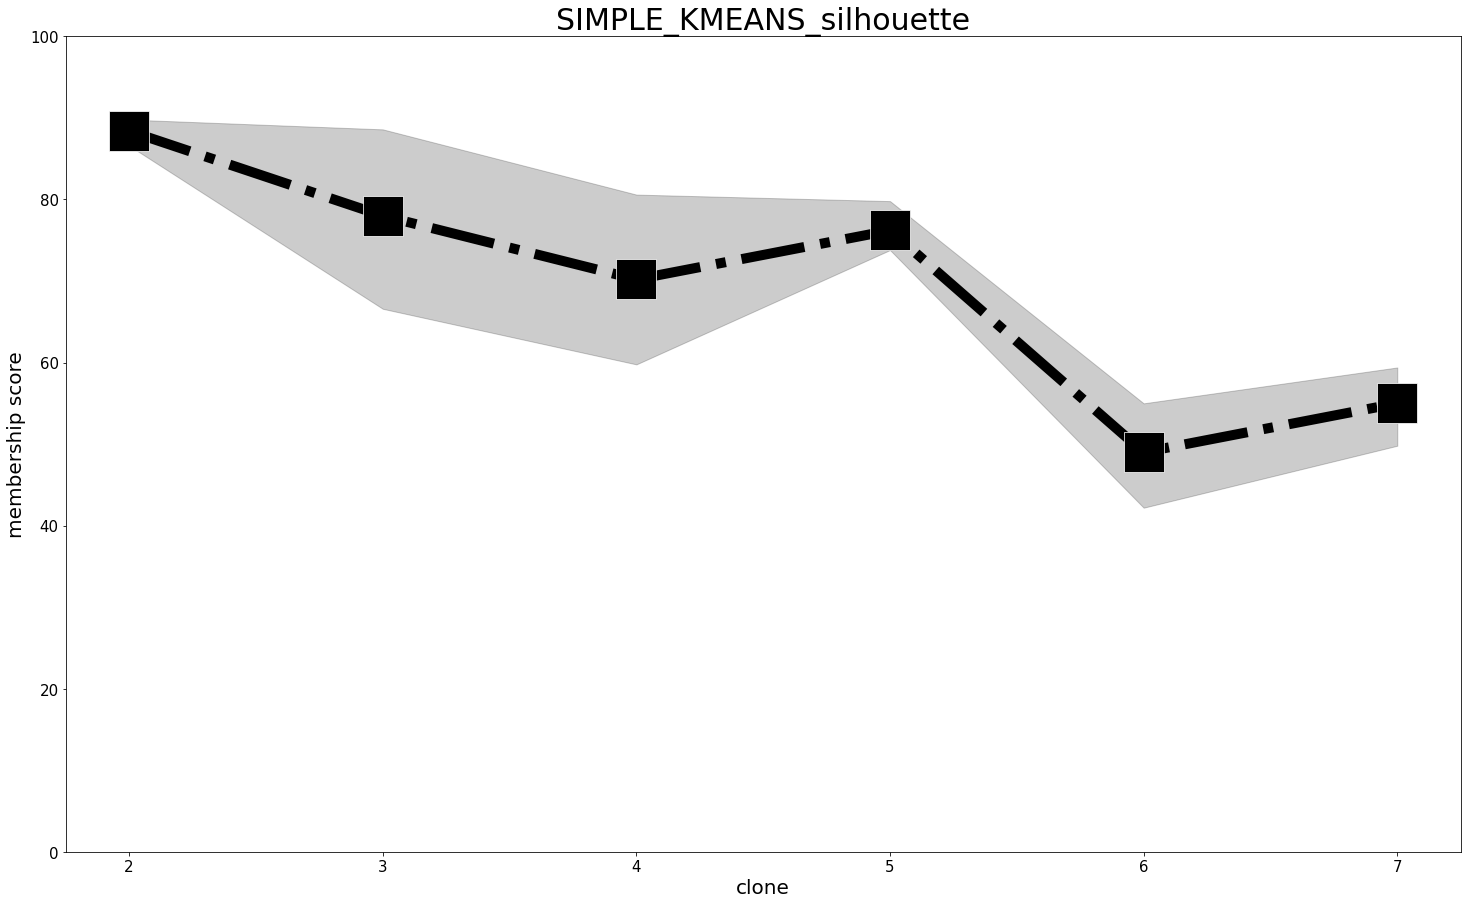

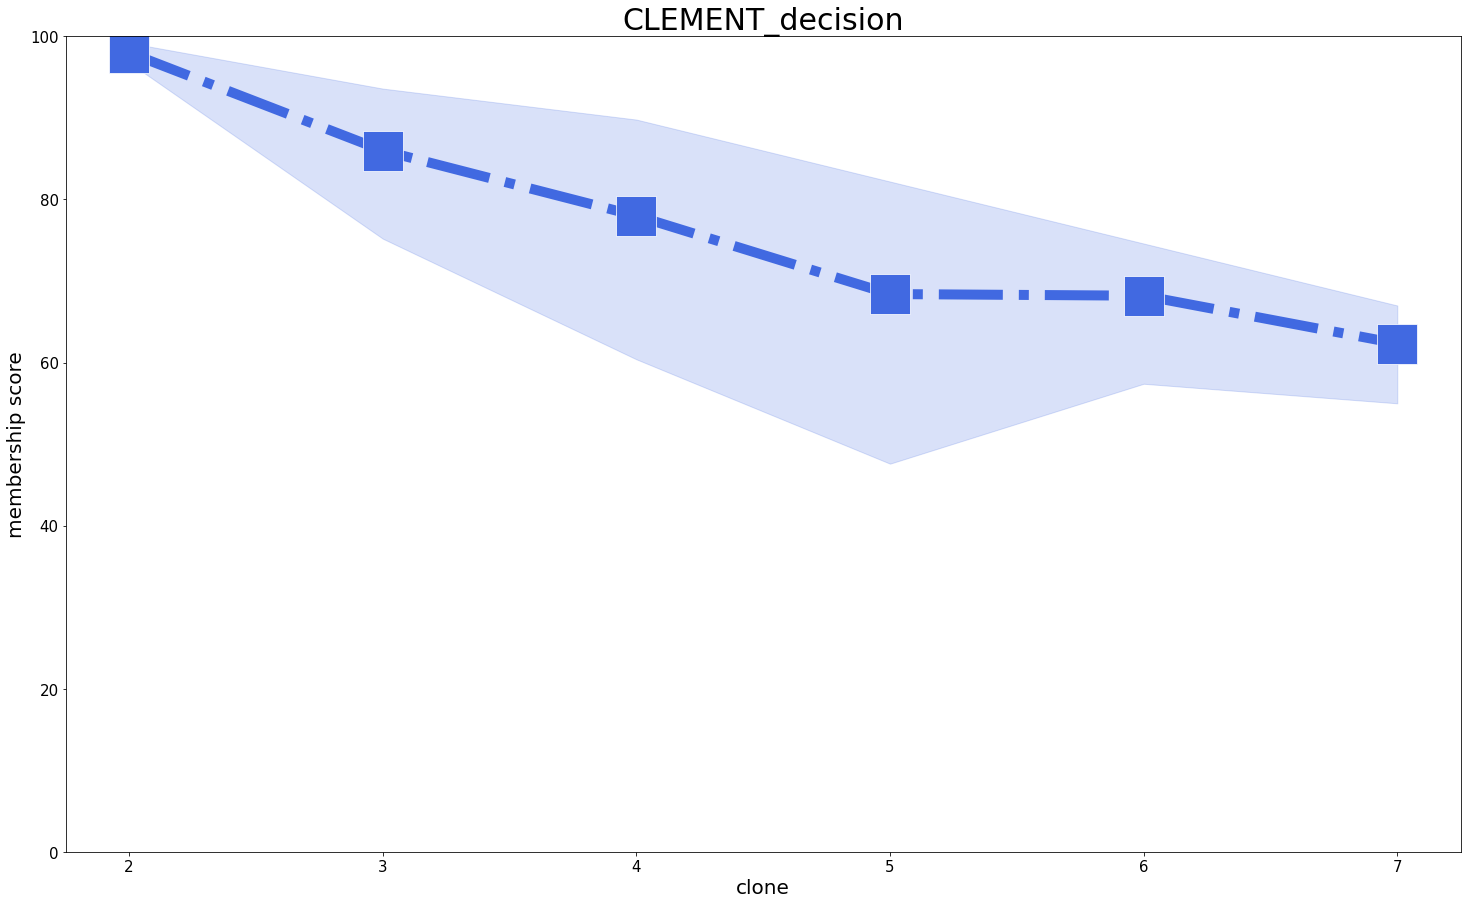

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function flush_figures at 0x2b0b626f3d30> (for post_execute):
Traceback (most recent call last):
  File "/opt/Yonsei/python/3.8.1/lib/python3.8/site-packages/PIL/ImageFile.py", line 515, in _save
    fh = fp.fileno()
AttributeError: '_idat' object has no attribute 'fileno'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/Yonsei/python/3.8.1/lib/python3.8/site-packages/IPython/core/events.py", line 88, in trigger
    func(*args, **kwargs)
  File "/opt/Yonsei/python/3.8.1/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py", line 121, in flush_figures
    return show(True)
  File "/opt/Yonsei/python/3.8.1/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py", line 41, in show
    display(
  File "/opt/Yonsei/python/3.8.1/lib/python3.8/site-packages/IPython/core/display.py", line 313, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/opt/Yon

In [ ]:
clones = [2,3,4,5,6,7]

for simulation in simulations:
    for number in variant_numbers:
        for depth in depth_of_coverages:
            for FP_type in FP_types:
                output_dir = '/data/project/Alzheimer/CLEMENT/04.RESULT/'+day+'/00.simData/'+'n'+number+'_'+depth+'x/'+sim_type+'/'+FP_type

                os.makedirs(output_dir, exist_ok= True)
                os.makedirs(output_dir + '/pdf' , exist_ok= True)
                fo = open(output_dir + '/MS.' + simulation + '.' + sim_type + '.txt','w')

                MS_benchmarking(input_dir, 'CLEMENT_decision', clones, 'royalblue', sim_type, simulation, FP_type, iteration_num, number, depth)
                MS_benchmarking(input_dir, 'pyclonevi', clones, 'firebrick', sim_type, simulation, FP_type, iteration_num , number, depth)
                MS_benchmarking(input_dir, 'sciclone', clones, 'forestgreen', sim_type, simulation, FP_type, iteration_num , number, depth)
                MS_benchmarking(input_dir, 'quantumclone', clones, 'darkorange', sim_type, simulation, FP_type, iteration_num , number, depth)
                
                MS_benchmarking(input_dir, 'SIMPLE_KMEANS_elbow', clones, 'black', sim_type, simulation, FP_type, iteration_num , number, depth)
                MS_benchmarking(input_dir, 'SIMPLE_KMEANS_gap*', clones, 'black', sim_type, simulation, FP_type, iteration_num , number, depth)
                MS_benchmarking(input_dir, 'SIMPLE_KMEANS_silhouette', clones, 'black', sim_type, simulation, FP_type, iteration_num , number, depth)
                

                fo.close()

### EC

In [ ]:
clones = [2,3,4,5,6,7]

for simulation in simulations:
    for number in variant_numbers:
        for depth in depth_of_coverages:
            for FP_type in FP_types:
                output_dir = '/data/project/Alzheimer/CLEMENT/04.RESULT/'+day+'/00.simData/'+'n'+number+'_'+depth+'x/'+sim_type+'/'+FP_type

                os.makedirs(output_dir, exist_ok= True)
                os.makedirs(output_dir + '/pdf' , exist_ok= True)
                fo = open(output_dir + '/EC.' + simulation + '.' + sim_type + '.txt','w')
                EC_benchmarking(input_dir, 'CLEMENT_decision', clones, 'royalblue', sim_type, simulation, FP_type, iteration_num, number, depth)
                EC_benchmarking(input_dir, 'pyclonevi', clones, 'firebrick', sim_type, simulation, FP_type, iteration_num , number, depth)
                EC_benchmarking(input_dir, 'sciclone', clones, 'forestgreen', sim_type, simulation, FP_type, iteration_num , number, depth)
                EC_benchmarking(input_dir, 'quantumclone', clones, 'darkorange', sim_type, simulation, FP_type, iteration_num , number, depth)
                
                EC_benchmarking(input_dir, 'SIMPLE_KMEANS_elbow', clones, 'black', sim_type, simulation, FP_type, iteration_num , number, depth)
                EC_benchmarking(input_dir, 'SIMPLE_KMEANS_gap*', clones, 'black', sim_type, simulation, FP_type, iteration_num , number, depth)
                EC_benchmarking(input_dir, 'SIMPLE_KMEANS_silhouette', clones, 'black', sim_type, simulation, FP_type, iteration_num , number, depth)
                
                fo.close()

### ARI

In [ ]:
def ARI_benchmarking(input_dir, tool, clones, _color, sim_type, simulation, FP_type, iteration_num, variant_number, depth_of_coverage):
    x_axis = []
    y_axis = []
    mean_dic = {}
    error = 0  
    
    for clone in clones:
        mean_dic[str(clone)] = []
        for iteration in range(0,iteration_num):
            if os.path.isfile(input_dir + '/SimData_'+simulation+'/n' + variant_number + '_' + depth_of_coverage + 'x/' + sim_type+ '/' + FP_type +'/clone_'+str(clone)+'/'+str(iteration)+'/'+tool+'.results.txt'):
                f = open(input_dir + '/SimData_'+simulation+'/n' + variant_number + '_' + depth_of_coverage + 'x/' + sim_type+ '/' + FP_type +'/clone_'+str(clone)+'/'+str(iteration)+'/'+tool+'.results.txt','r')
                for fline in f:
                    if fline.startswith('ARI'):
                        score = float(fline.rstrip().split('\t')[1])
                        x_axis.append(str(clone))
                        y_axis.append(score)
                        mean_dic[str(clone)].append(score) #########
                f.close()
            else:
                error += 1
                print('ERROR ==>','\t',input_dir + '/SimData_'+simulation+'/n' + variant_number + '_' + depth_of_coverage + 'x/' + sim_type+ '/' + FP_type +'/clone_'+str(clone)+'/'+str(iteration)+'/'+tool+'.results.txt')
#     print(error)

    fig = plt.figure(figsize = (25,15))
    if simulation == '3D':
        ax = sns.lineplot(data = mean_dic, x = x_axis, y = y_axis, marker = 'o', markersize = 40, color = _color, linewidth = 10, linestyle = 'solid') # 3D
    elif simulation == '2D':
        ax = sns.lineplot(data = mean_dic, x = x_axis, y = y_axis, marker = 's', markersize = 40, color = _color, linewidth = 10 , linestyle ='dashdot') # 2D
    elif simulation == '1D':
        ax = sns.lineplot(data = mean_dic, x = x_axis, y = y_axis, marker = '^', markersize = 40, color = _color, linewidth = 10 , linestyle ='dotted') # 1D

    plt.tick_params(axis = 'x', labelsize = 15)
    plt.tick_params(axis = 'y', labelsize = 15)
    ax.set_xlabel('clone', fontsize = 20)
    ax.set_ylabel('ARI score', fontsize = 20)
    ax.set_title(tool, fontsize=30)
    sc = ax.set_ylim(0, 1)
    ax.figure.savefig(output_dir +'/pdf/ARI.'+ simulation+'.'+tool+'.pdf')   
    
    fo.write(tool + ' ARI score mean value' + '\n')
    for key in mean_dic:
        if len(mean_dic[key]) == 0:
            fo.write('clone ' + str(key) + '\t' + 'mean ' + 'ERROR' + '\n')
        else:     
            fo.write('clone ' + str(key) + '\t' + 'mean ' + str(sum(mean_dic[key])/len(mean_dic[key])) + '\n')
    print('total error', error)
    print('====================')

In [ ]:
clones = [2,3,4,5,6,7]
input_dir = '/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData'

for simulation in simulations:
    for number in variant_numbers:
        for depth in depth_of_coverages:
            for FP_type in FP_types:
                output_dir = '/data/project/Alzheimer/CLEMENT/04.RESULT/'+day+'/00.simData/'+'n'+number+'_'+depth+'x/'+sim_type+'/'+FP_type

                os.makedirs(output_dir, exist_ok= True)
                os.makedirs(output_dir + '/pdf', exist_ok= True)
                fo = open(output_dir + '/ARI.' + simulation + '.' + sim_type + '.txt','w')

                ARI_benchmarking(input_dir, 'CLEMENT_decision', clones, 'royalblue', sim_type, simulation, FP_type, iteration_num, number, depth)
                ARI_benchmarking(input_dir, 'pyclonevi', clones, 'firebrick', sim_type, simulation, FP_type, iteration_num , number, depth)
                ARI_benchmarking(input_dir, 'sciclone', clones, 'forestgreen', sim_type, simulation, FP_type, iteration_num , number, depth)
                ARI_benchmarking(input_dir, 'quantumclone', clones, 'darkorange', sim_type, simulation, FP_type, iteration_num , number, depth)
                
                
                ARI_benchmarking(input_dir, 'SIMPLE_KMEANS_elbow', clones, 'black', sim_type, simulation, FP_type, iteration_num , number, depth)
                ARI_benchmarking(input_dir, 'SIMPLE_KMEANS_gap*', clones, 'black', sim_type, simulation, FP_type, iteration_num , number, depth)
                ARI_benchmarking(input_dir, 'SIMPLE_KMEANS_silhouette', clones, 'black', sim_type, simulation, FP_type, iteration_num , number, depth)
                
                fo.close()

### RMSE

In [ ]:
for number in variant_numbers:
    for depth in depth_of_coverages:
        for FP_type in FP_types:

            input_dir = '/data/project/Alzheimer/CLEMENT/04.RESULT/'+day+'/00.simData/'+'n'+number+'_'+depth+'x/'+sim_type+'/'+FP_type

            input_file = [i for i in os.listdir(input_dir) if "EC" in i and sim_type in i ]
            input_file.sort()

            x_axis = []
            CLEMENT_y = []
            pyclone_y = []
            sciclone_y = []
            quantum_y = []
            
            clement_dic = {}
            pyclone_dic = {}
            sciclone_dic = {}
            quantum_dic = {}
            
            for i in input_file:
                simulation = i.rstrip().split('.')[1]
                x_axis.append(simulation)
                clement_dic[simulation] = []
                pyclone_dic[simulation] = []
                sciclone_dic[simulation] = []
                quantum_dic[simulation] = []
            
                idx = 0
                f = open(input_dir + '/' + i ,'r')
                for fline in f:
                    if fline.startswith('RMSE'):
                        RMSE = float(fline.rstrip().split('\t')[1])
                        if idx == 0:
                            CLEMENT_y.append(RMSE)
                            clement_dic[simulation].append(RMSE)
                            idx += 1
                        elif idx == 1:
                            pyclone_y.append(RMSE)
                            pyclone_dic[simulation].append(RMSE)
                            idx += 1
                        elif idx == 2:
                            sciclone_y.append(RMSE)
                            sciclone_dic[simulation].append(RMSE)
                            idx += 1
                        elif idx == 3:
                            quantum_y.append(RMSE)
                            quantum_dic[simulation].append(RMSE)
                f.close()
            ###################################################################################################
            fig = plt.figure(figsize = (15,15))
#             ax = sns.lineplot(x_axis, CLEMENT_y, marker = 's', markersize = 40, color = 'royalblue', linewidth = 10, linestyle = 'solid')
            ax = sns.lineplot(data = clement_dic, x = x_axis, y = CLEMENT_y, marker = 's', markersize = 40, color = 'royalblue', linewidth = 10, linestyle = 'solid')

            plt.tick_params(axis = 'x', labelsize = 15)
            plt.tick_params(axis = 'y', labelsize = 15)
            ax.set_xlabel('number of sample', fontsize = 20)
            ax.set_ylabel('RMSE', fontsize = 20)
            ax.set_title('CLEMENT_y', fontsize=30)

            sc = ax.set_ylim(0,4)
            ax.figure.savefig(input_dir +'/pdf/RMSE.CLEMENT.pdf')
            ###################################################################################################
            fig = plt.figure(figsize = (15,15))
#             ax = sns.lineplot(x_axis, pyclone_y, marker = 's', markersize = 40, color = 'firebrick', linewidth = 10, linestyle = 'solid')
            ax = sns.lineplot(data = pyclone_dic, x = x_axis, y = pyclone_y, marker = 's', markersize = 40, color = 'royalblue', linewidth = 10, linestyle = 'solid')

            plt.tick_params(axis = 'x', labelsize = 15)
            plt.tick_params(axis = 'y', labelsize = 15)
            ax.set_xlabel('number of sample', fontsize = 20)
            ax.set_ylabel('RMSE', fontsize = 20)
            ax.set_title('pyclone_y', fontsize=30)

            sc = ax.set_ylim(0,4)
            ax.figure.savefig(input_dir +'/pdf/RMSE.pyclone.pdf')
            ###################################################################################################
            fig = plt.figure(figsize = (15,15))
#             ax = sns.lineplot(x_axis, sciclone_y, marker = 's', markersize = 40, color = 'forestgreen', linewidth = 10, linestyle = 'solid')
            ax = sns.lineplot(data = sciclone_dic, x = x_axis, y = sciclone_y, marker = 's', markersize = 40, color = 'royalblue', linewidth = 10, linestyle = 'solid')
            plt.tick_params(axis = 'x', labelsize = 15)
            plt.tick_params(axis = 'y', labelsize = 15)
            ax.set_xlabel('number of sample', fontsize = 20)
            ax.set_ylabel('RMSE', fontsize = 20)
            ax.set_title('sciclone_y', fontsize=30)

            sc = ax.set_ylim(0,4)
            ax.figure.savefig(input_dir +'/pdf/RMSE.sciclone.pdf')
            ###################################################################################################
            fig = plt.figure(figsize = (15,15))
#             ax = sns.lineplot(x_axis, quantum_y, marker = 's', markersize = 40, color = 'darkorange', linewidth = 10, linestyle = 'solid')
            ax = sns.lineplot(data = quantum_dic, x = x_axis, y = quantum_y, marker = 's', markersize = 40, color = 'royalblue', linewidth = 10, linestyle = 'solid')
            plt.tick_params(axis = 'x', labelsize = 15)
            plt.tick_params(axis = 'y', labelsize = 15)
            ax.set_xlabel('number of sample', fontsize = 20)
            ax.set_ylabel('RMSE', fontsize = 20)
            ax.set_title('quantum_y', fontsize=30)

            sc = ax.set_ylim(0,4)
            ax.figure.savefig(input_dir +'/pdf/RMSE.quantumclone.pdf')
            ###################################################################################################
